**ÍNDICES AGROCLIMÁTICOS Interactivos**

In [3]:
import datetime as dt
import pandas as pd
import string as str
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



In [4]:
dia_seco = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/dia_seco_25jun2024_v3.csv', header = 0,delimiter=';', encoding='latin-1')

In [5]:
dia_seco.info()
dia_seco.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           900 non-null    int64  
 1   Dia          900 non-null    object 
 2   Lluvia - mm  900 non-null    float64
 3   Date & Time  900 non-null    object 
 4   dia_seco     900 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ KB


,ID,Dia,Lluvia - mm,Date & Time,dia_seco
0,169484,2023-11-14,2.6,2023-11-14,0
1,169484,2023-11-15,0.0,2023-11-15,1
2,169484,2023-11-16,0.8,2023-11-16,1
3,169484,2023-11-17,0.0,2023-11-17,1
4,169484,2023-11-18,0.0,2023-11-18,1
5,169484,2023-11-19,0.0,2023-11-19,1
6,169484,2023-11-20,0.0,2023-11-20,1
7,169484,2023-11-21,0.0,2023-11-21,1
8,169484,2023-11-22,0.0,2023-11-22,1
9,169484,2023-11-23,0.0,2023-11-23,1


In [5]:
from datetime import datetime, timedelta

def main():
    dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Pedir al usuario que ingrese una fecha
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Filtrar el DataFrame a partir de la fecha ingresada y el número de días seleccionados
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)
    dia_seco_periodo = dia_seco[(dia_seco['Date & Time'] >= fecha_inicio) &
                                (dia_seco['Date & Time'] <= fecha_fin)]

    # Crear una columna de año
    dia_seco_periodo['Year'] = dia_seco_periodo['Date & Time'].dt.year

    # Agrupar por año e ID y contar los días secos
    conteo_dias_secos = dia_seco_periodo[dia_seco_periodo['dia_seco'] == 1].groupby(['ID']).size().reset_index(name='Count_dias_secos')

    # Mostrar el resultado
    print(conteo_dias_secos)

if __name__ == "__main__":
    main()


Seleccione el número de días:
1. 150 días
2. 120 días
Opción no válida.


In [6]:

from datetime import datetime, timedelta

def dias_secos():
    dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Pedir al usuario que ingrese una fecha
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Filtrar el DataFrame a partir de la fecha ingresada y el número de días seleccionados
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)
    dia_seco_periodo = dia_seco[(dia_seco['Date & Time'] >= fecha_inicio) &
                                (dia_seco['Date & Time'] <= fecha_fin)]

    # Verificar y mostrar la fecha de inicio y fin para cada ID (estación meteorológica)
    ids_todos = dia_seco['ID'].unique()
    tiene_datos = False  # Variable para verificar si hay datos para algún ID

    for id in ids_todos:
        datos_id = dia_seco_periodo[dia_seco_periodo['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            tiene_datos = True
            fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    if not tiene_datos:
        return

    # Crear una columna de año
    dia_seco_periodo['Year'] = dia_seco_periodo['Date & Time'].dt.year

    # Agrupar por año e ID y contar los días secos
    conteo_dias_secos = dia_seco_periodo[dia_seco_periodo['dia_seco'] == 1].groupby(['Year', 'ID']).size().reset_index(name='Count_dias_secos')

    # Mostrar el resultado
    print(conteo_dias_secos)

if __name__ == "__main__":
    dias_secos()


Seleccione el número de días:
1. 150 días
2. 120 días
Opción no válida.


**Script En uso Días Secos**

In [31]:
from datetime import datetime, timedelta

# Declarar el DataFrame global
conteo_dias_secos = pd.DataFrame()

def dias_secos():
    global conteo_dias_secos
    
    dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Pedir al usuario que ingrese una fecha
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Filtrar el DataFrame a partir de la fecha ingresada y el número de días seleccionados
    #tomar en cuenta el caso de Granados por las fechas y cantidad de días
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)
    dia_seco_periodo = dia_seco[(dia_seco['Date & Time'] >= fecha_inicio) &
                                (dia_seco['Date & Time'] <= fecha_fin)]

    # Verificar y mostrar la fecha de inicio y fin para cada ID (estación meteorológica)
    ids_todos = dia_seco['ID'].unique()
    tiene_datos = False  # Variable para verificar si hay datos para algún ID

    for id in ids_todos:
        datos_id = dia_seco_periodo[dia_seco_periodo['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            tiene_datos = True
            fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    if not tiene_datos:
        return

    # Crear una columna de año
    dia_seco_periodo['Year'] = dia_seco_periodo['Date & Time'].dt.year

    # Agrupar por año e ID y contar los días secos
    conteo_dias_secos = dia_seco_periodo[dia_seco_periodo['dia_seco'] == 1].groupby(['ID']).size().reset_index(name='Count_dias_secos')

    # Mostrar el resultado
    print(conteo_dias_secos)

if __name__ == "__main__":
    dias_secos()


Seleccione el número de días:
1. 150 días
2. 120 días
Para el ID 169484: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 169523: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 169524: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 169529: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 178223: Fecha de inicio: 2024-01-26, Fecha de fin: 2024-03-31, Total registros encontrados: 66
       ID  Count_dias_secos
0  169484               116
1  169523               119
2  169524               116
3  169529               115
4  178223                66


C:\Users\stzor\AppData\Local\Temp\ipykernel_1868\1397304121.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia_seco_periodo['Year'] = dia_seco_periodo['Date & Time'].dt.year


In [8]:
conteo_dias_secos.head()

""


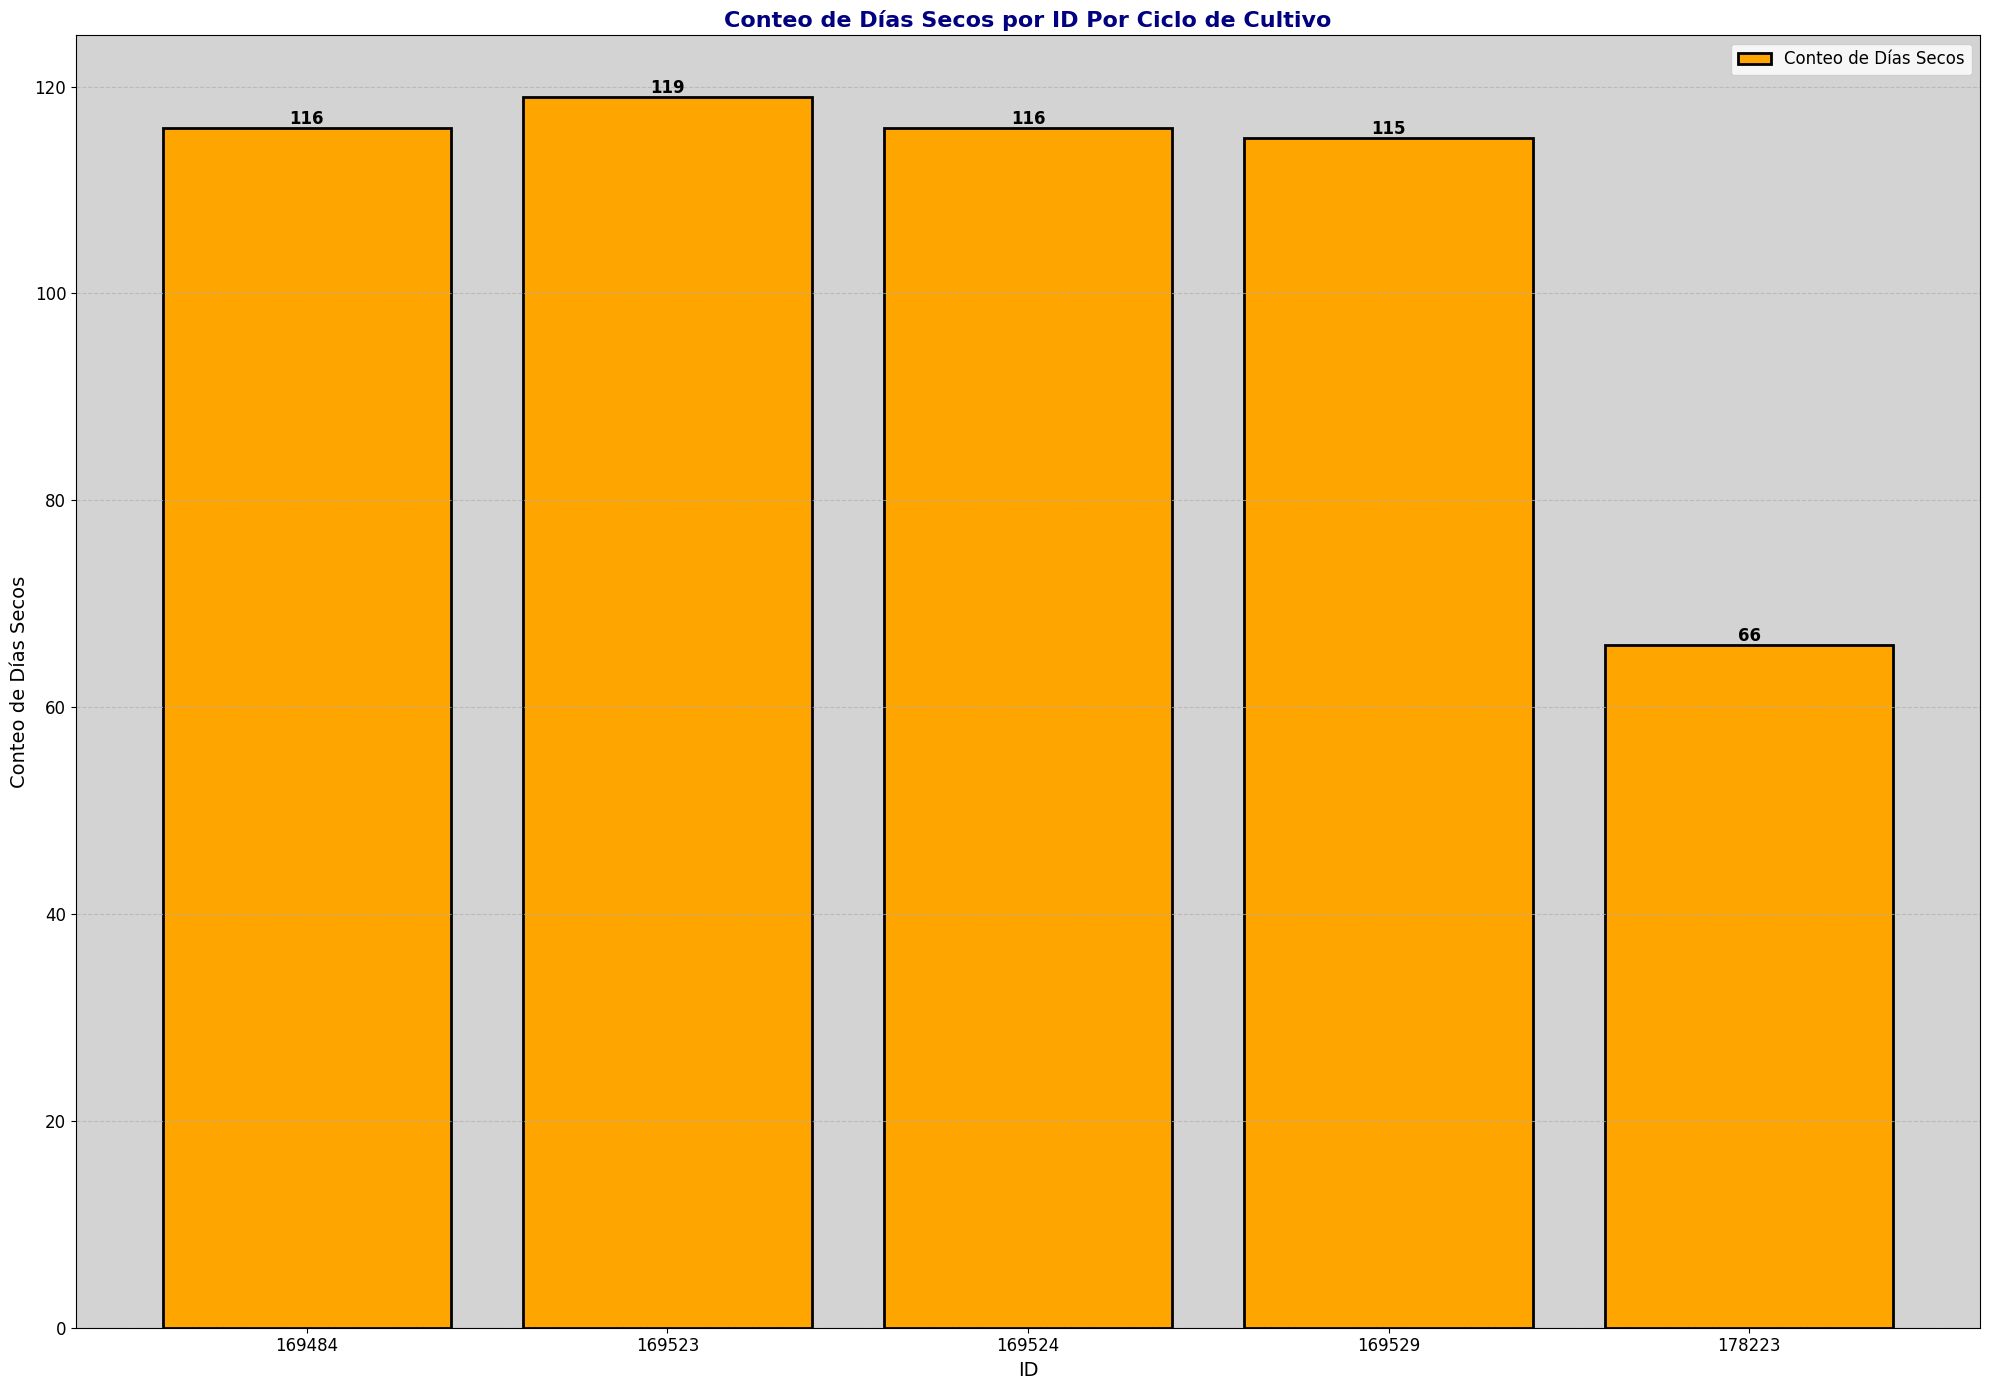

In [33]:
# Ordenar el DataFrame por la columna Count_dias_secos de mayor a menor
conteo_dias_secos = conteo_dias_secos.sort_values(by='Count_dias_secos', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(conteo_dias_secos.index, conteo_dias_secos['Count_dias_secos'], color='orange', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Conteo de Días Secos por ID Por Ciclo de Cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Conteo de Días Secos', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(conteo_dias_secos.index, conteo_dias_secos['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Conteo de Días Secos'], loc='upper right', fontsize=12)

# Mostrar gráfica
plt.show()

**No. de días secos Por mes Por Estación**
Total number of dry days 
A dry day occurs when the amount of daily precipitation drops below 1 mm.

Seleccione el año:
1. 2023
2. 2024
Seleccione el mes:
1. Enero
2. Febrero
3. Marzo
4. Abril
5. Mayo
6. Junio
7. Julio
8. Agosto
9. Septiembre
10. Octubre
11. Noviembre
12. Diciembre
   Year  Mes      ID  Count_dias_secos_por_mes
0  2024    2  169484                        29
1  2024    2  169523                        29
2  2024    2  169524                        29
3  2024    2  169529                        28
4  2024    2  178223                        29


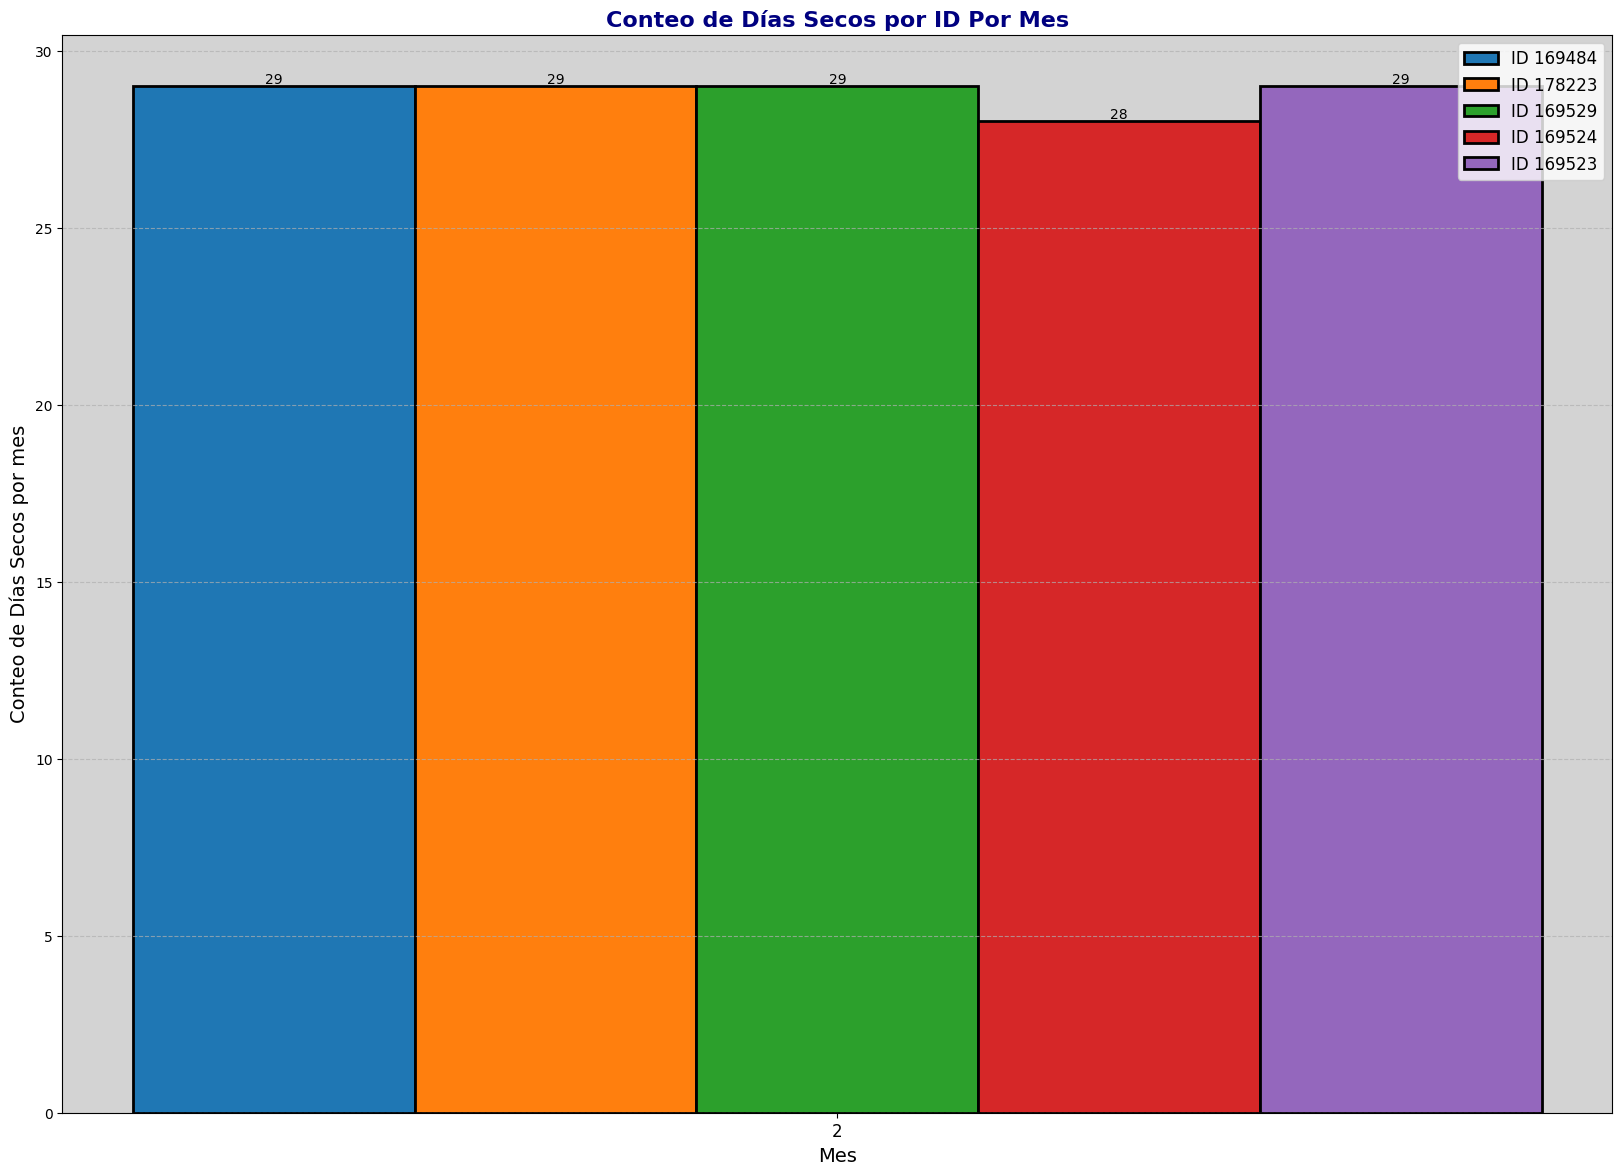

In [11]:
# Asegurarse de que 'Date & Time' es de tipo datetime
dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

# Crear columnas de año y mes
dia_seco['Year'] = dia_seco['Date & Time'].dt.year
dia_seco['Mes'] = dia_seco['Date & Time'].dt.month

def filtrar_por_mes():
    global conteo_dias_secos_por_mes_filtrado

    # Mostrar opciones al usuario para seleccionar el año
    years = dia_seco['Year'].unique()
    print("Seleccione el año:")
    for i, year in enumerate(years):
        print(f"{i + 1}. {year}")
    opcion_year = input("Ingrese el número del año: ")

    try:
        year = years[int(opcion_year) - 1]
    except (IndexError, ValueError):
        print("Año no válido.")
        return

    # Mostrar opciones al usuario para seleccionar el mes
    print("Seleccione el mes:")
    print("1. Enero")
    print("2. Febrero")
    print("3. Marzo")
    print("4. Abril")
    print("5. Mayo")
    print("6. Junio")
    print("7. Julio")
    print("8. Agosto")
    print("9. Septiembre")
    print("10. Octubre")
    print("11. Noviembre")
    print("12. Diciembre")
    opcion_mes = input("Ingrese el número del mes (1-12): ")

    try:
        mes = int(opcion_mes)
        if mes < 1 or mes > 12:
            raise ValueError
    except ValueError:
        print("Mes no válido. Por favor, ingrese un número entre 1 y 12.")
        return

    # Filtrar el DataFrame para el año y mes seleccionados
    dia_seco_filtrado = dia_seco[(dia_seco['Year'] == year) & (dia_seco['Mes'] == mes)]

    # Verificar si hay datos para el mes seleccionado
    if dia_seco_filtrado.empty:
        print("No hay datos disponibles para el mes seleccionado.")
        return

    # Agrupar por año, mes e ID y contar los días secos
    conteo_dias_secos_por_mes_filtrado = dia_seco_filtrado[dia_seco_filtrado['dia_seco'] == 1].groupby(['Year', 'Mes', 'ID']).size().reset_index(name='Count_dias_secos_por_mes')

    # Mostrar el resultado
    print(conteo_dias_secos_por_mes_filtrado)

    # Generar la gráfica
    generar_grafica()

def generar_grafica():
    # Obtener una lista única de meses e IDs
    meses = conteo_dias_secos_por_mes_filtrado['Mes'].unique()
    IDs = conteo_dias_secos_por_mes_filtrado['ID'].unique()
    num_meses = len(meses)
    num_IDs = len(IDs)

    # Ancho de las barras
    bar_width = 0.8 / num_IDs

    # Crear gráfica de barras con un estilo más atractivo
    plt.figure(figsize=(20, 14))

    for i, mes in enumerate(meses):
        # Obtener los datos para el mes actual
        data_mes = conteo_dias_secos_por_mes_filtrado[conteo_dias_secos_por_mes_filtrado['Mes'] == mes]
        
        for j, ID in enumerate(IDs):
            # Obtener los datos para el ID actual
            data_ID = data_mes[data_mes['ID'] == ID]
            
            # Calcular la posición de la barra en el eje x
            x_position = i + j * bar_width
            
            # Crear la barra para el ID actual
            plt.bar(x_position, data_ID['Count_dias_secos_por_mes'], 
                    width=bar_width, color=plt.cm.tab10(j), edgecolor='black', linewidth=2,
                    label=f'ID {ID}' if i == 0 else "")
            
            # Añadir etiquetas de valor en cada barra
            for val in data_ID['Count_dias_secos_por_mes']:
                plt.text(x_position, val, f'{val}',
                         ha='center', va='bottom', fontsize=10, color='black')

    # Añadir título y etiquetas a los ejes
    plt.title('Conteo de Días Secos por ID Por Mes', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Mes', fontsize=14)
    plt.ylabel('Conteo de Días Secos por mes', fontsize=14)

    # Ajustar las etiquetas del eje x
    plt.xticks(np.arange(num_meses) + (0.8 / num_IDs) * (num_IDs - 1) / 2, meses, fontsize=12)

    # Personalizar el fondo y la cuadrícula de la gráfica
    plt.gca().set_facecolor('lightgrey')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir una leyenda y personalizarla
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = list(set(labels))
    plt.legend(handles[:num_IDs], unique_labels[:num_IDs], loc='upper right', fontsize=12)

    # Guardar la gráfica como PNG
    #plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Conteo_de_Días_Secos_por_ID_mes_11jun2024.png', format='png', dpi=300)
    # Mostrar gráfica
    plt.show()

# Ejecutar la función para filtrar por mes
filtrar_por_mes()


**No. de periodos secos Por Ciclo de Cultivo Por Estación**
Total number of dry spells during the maize production season (September to April). 
A dry spell is defined as a period of five or more consecutive dry days immediately followed by a rainy day.

Con año seleccionado

In [5]:
# Asegurar que 'Date & Time' es de tipo datetime
dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

# Crear columnas de año y mes
dia_seco['Year'] = dia_seco['Date & Time'].dt.year
dia_seco['Mes'] = dia_seco['Date & Time'].dt.month

# Crear el DataFrame periodo_seco
periodo_seco = dia_seco.copy()

def filtrar_por_fecha():
    global periodo_seco

    # Mostrar opciones al usuario para seleccionar el año
    years = periodo_seco['Year'].unique()
    print("Seleccione el año:")
    for i, year in enumerate(years):
        print(f"{i + 1}. {year}")
    opcion_year = input("Ingrese el número del año: ")

    try:
        year = years[int(opcion_year) - 1]
    except (IndexError, ValueError):
        print("Año no válido.")
        return

    # Pedir al usuario que ingrese una fecha de inicio
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Calcular la fecha de fin
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)

    # Filtrar el DataFrame según el año y las fechas seleccionadas
    df_filtrado_mes = periodo_seco[(periodo_seco['Year'] == year) & 
                                   (periodo_seco['Date & Time'] >= fecha_inicio) &
                                   (periodo_seco['Date & Time'] <= fecha_fin)]

    if df_filtrado_mes.empty:
        print("No hay datos disponibles para la fecha seleccionada.")
        return

    # Ordenar el DataFrame por 'ID' y 'Date & Time'
    df_filtrado_mes = df_filtrado_mes.sort_values(by=['ID', 'Date & Time'])

    # Inicializar un DataFrame para guardar los resultados
    resultado_periodo_seco = pd.DataFrame(columns=['ID', 'No. de periodos secos'])

    # Inicializar variables
    prev_id = None
    dias_sin_lluvia = 0
    num_periodos_secos = 0

    # Lista temporal para almacenar resultados
    resultados_temp = []

    # Iterar sobre las filas del DataFrame
    for index, row in df_filtrado_mes.iterrows():
        current_id = row['ID']
        
        if current_id != prev_id and prev_id is not None:
            # Guardar el conteo de periodos secos para el ID anterior
            resultados_temp.append({'ID': prev_id, 'No. de periodos secos': num_periodos_secos})
            # Reiniciar el contador de periodos secos
            num_periodos_secos = 0
            dias_sin_lluvia = 0
        
        if row['dia_seco'] == 1:
            dias_sin_lluvia += 1
        else:
            if dias_sin_lluvia >= 5:
                num_periodos_secos += 1
            dias_sin_lluvia = 0
        
        prev_id = current_id

    # Agregar el conteo para el último ID
    if prev_id is not None:
        resultados_temp.append({'ID': prev_id, 'No. de periodos secos': num_periodos_secos})

    # Crear el DataFrame final con los resultados
    resultado_periodo_seco = pd.DataFrame(resultados_temp)

    # Convertir el ID a int64
    resultado_periodo_seco['ID'] = resultado_periodo_seco['ID'].astype('int64')

    # Mostrar el DataFrame resultado
    print(resultado_periodo_seco)

    # Mostrar información adicional de cada ID
    ids_todos = df_filtrado_mes['ID'].unique()

    for id in ids_todos:
        datos_id = df_filtrado_mes[df_filtrado_mes['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    return resultado_periodo_seco

# Ejecutar la función para filtrar por fecha y obtener el DataFrame resultado
resultado_periodo_seco = filtrar_por_fecha()



Seleccione el año:
1. 2023
2. 2024
Seleccione el número de días:
1. 150 días
2. 120 días
       ID  No. de periodos secos
0  169484                      3
1  169523                      0
2  169524                      1
3  169529                      3
4  178223                      0
Para el ID 169484: Fecha de inicio: 2024-01-01, Fecha de fin: 2024-04-03, Total registros encontrados: 94
Para el ID 169523: Fecha de inicio: 2024-01-01, Fecha de fin: 2024-04-03, Total registros encontrados: 94
Para el ID 169524: Fecha de inicio: 2024-01-01, Fecha de fin: 2024-04-03, Total registros encontrados: 94
Para el ID 169529: Fecha de inicio: 2024-01-01, Fecha de fin: 2024-04-03, Total registros encontrados: 94
Para el ID 178223: Fecha de inicio: 2024-01-26, Fecha de fin: 2024-04-03, Total registros encontrados: 69


Sin año seleccionado

Seleccione el número de días:
1. 150 días
2. 120 días
        ID Inicio del rango Fin del rango  Duración  Periodo
0   169484       2024-01-01    2024-01-17        17        1
1   169484       2024-01-19    2024-01-28        10        1
2   169484       2024-01-30    2024-03-17        48        1
3   169484       2024-03-19    2024-04-07        20        1
4   169484       2024-04-10    2024-04-28        19        1
5   169484       2024-05-01    2024-05-15        15        1
6   169484       2024-05-17    2024-05-25         9        1
7   169523       2024-01-01    2024-04-28       119        1
8   169523       2024-05-01    2024-05-10        10        1
9   169523       2024-05-12    2024-05-14         3        0
10  169523       2024-05-19    2024-05-25         7        1
11  169524       2024-01-01    2024-01-27        27        1
12  169524       2024-01-29    2024-04-29        92        1
13  169524       2024-05-01    2024-05-15        15        1
14  169524       2024-05-18    

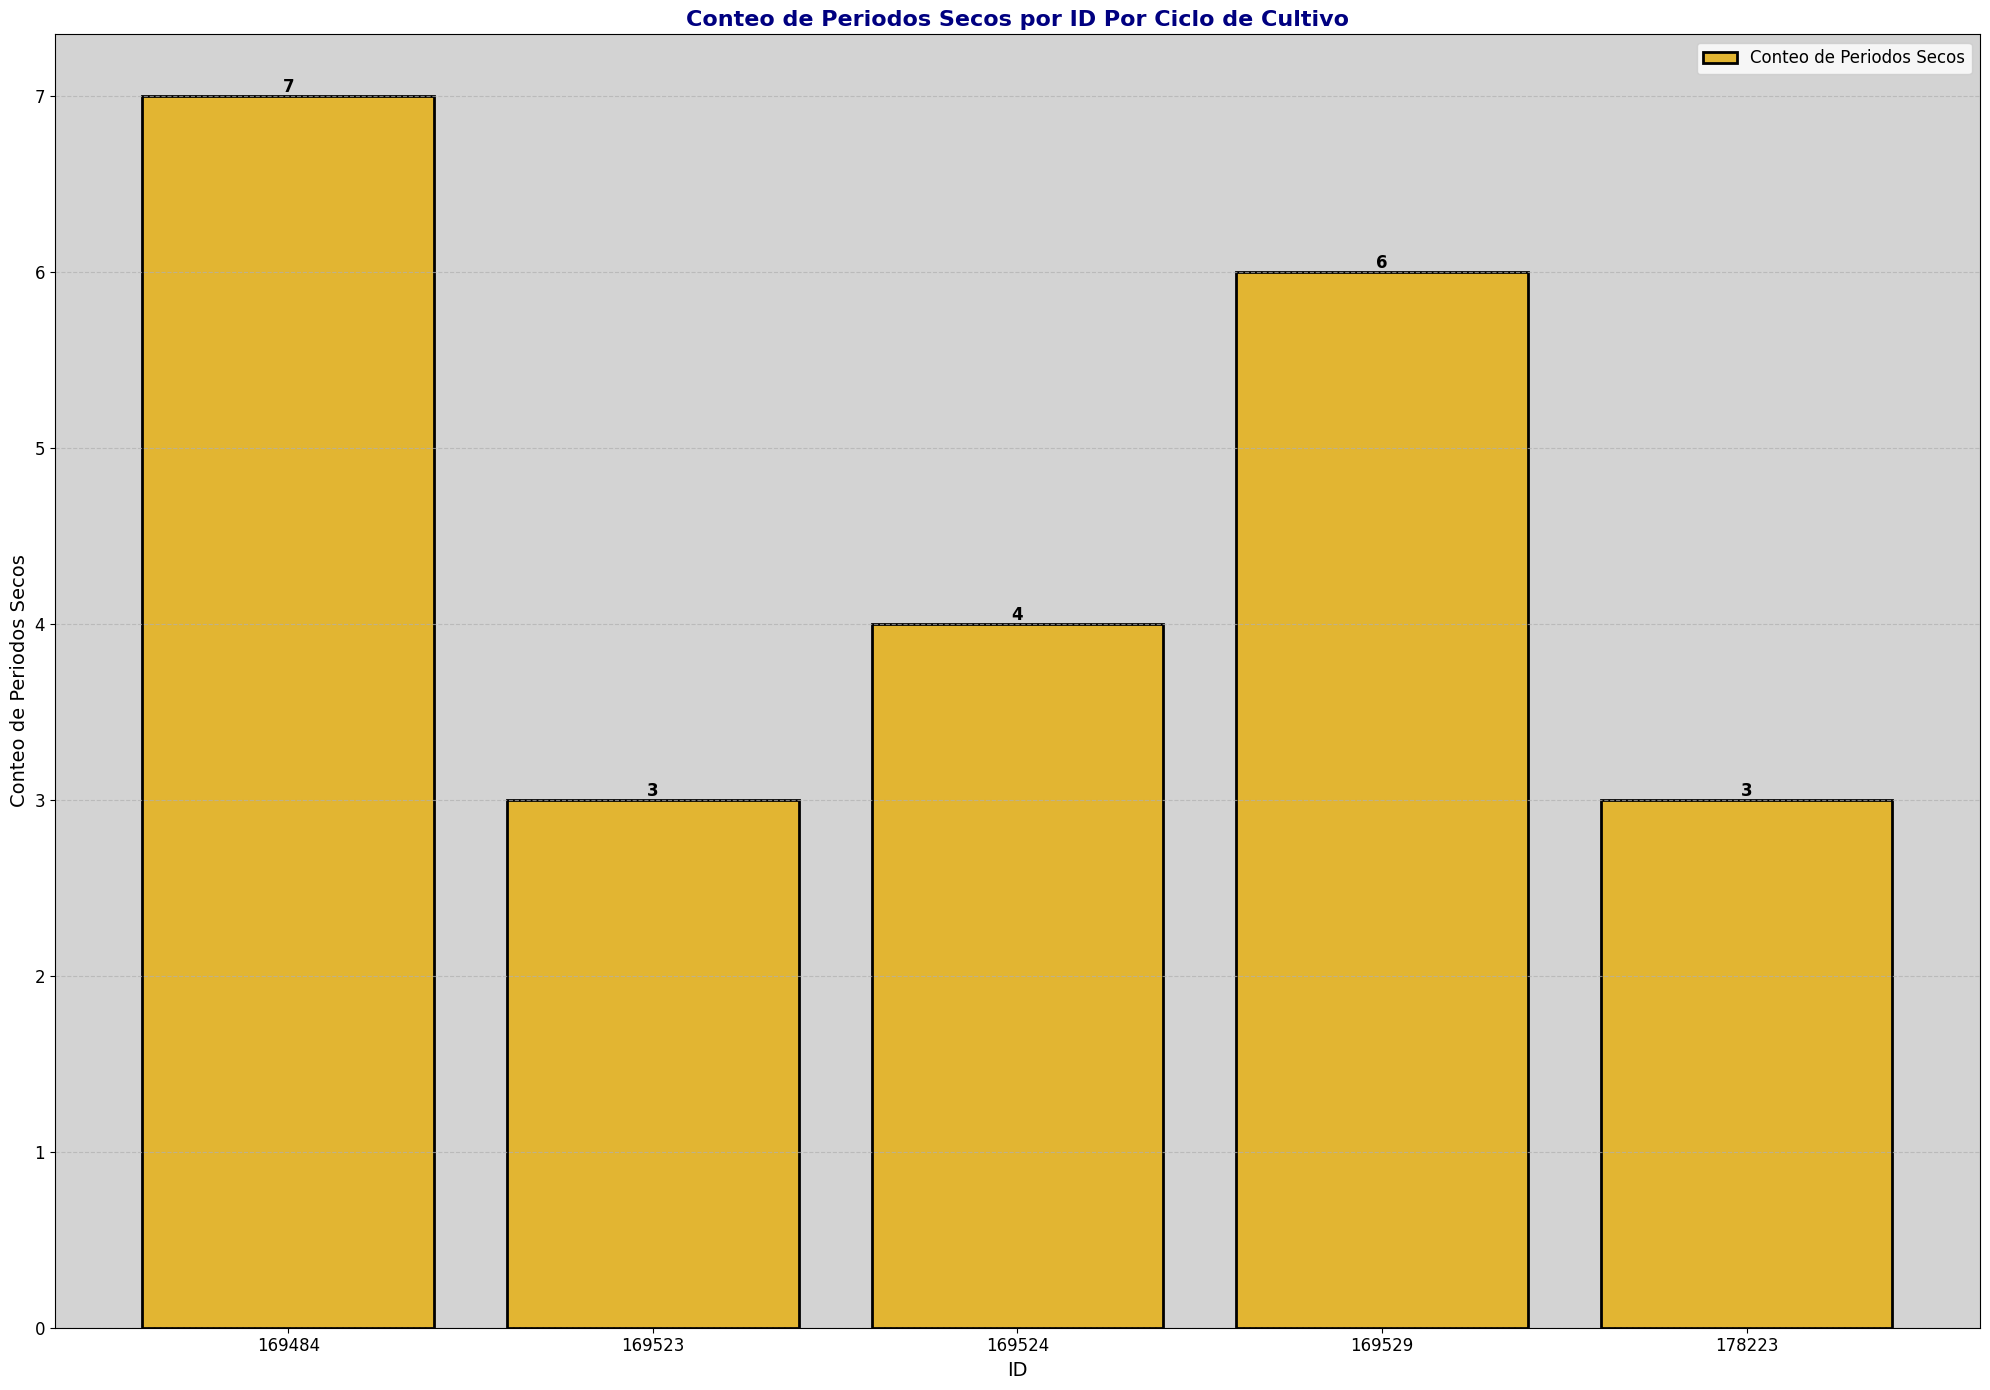

In [8]:
# Asegurar que 'Date & Time' es de tipo datetime
dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

# Crear el DataFrame periodo_seco
periodo_seco = dia_seco.copy()

def filtrar_por_fecha():
    global periodo_seco

    # Pedir al usuario que ingrese una fecha de inicio
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Calcular la fecha de fin
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)

    # Filtrar el DataFrame según las fechas seleccionadas
    df_filtrado_mes = periodo_seco[(periodo_seco['Date & Time'] >= fecha_inicio) &
                                   (periodo_seco['Date & Time'] <= fecha_fin)]

    if df_filtrado_mes.empty:
        print("No hay datos disponibles para la fecha seleccionada.")
        return

    # Ordenar el DataFrame por 'ID' y 'Date & Time'
    df_filtrado_mes = df_filtrado_mes.sort_values(by=['ID', 'Date & Time'])

    # Inicializar listas para guardar los resultados
    ids = []
    inicio_rango = []
    fin_rango = []
    duracion = []
    periodos = []

    # Inicializar variables
    dias_sin_lluvia = 0
    inicio_sin_lluvia = None
    prev_id = None

    # Iterar sobre las filas del DataFrame
    for index, row in df_filtrado_mes.iterrows():
        current_id = row['ID']
        dia_seco = row['dia_seco']
        
        if current_id != prev_id:
            # Guardar el rango de días sin lluvia para el ID anterior
            if prev_id is not None:
                ids.append(prev_id)
                inicio_rango.append(inicio_sin_lluvia)
                fin_rango.append(prev_fecha)
                duracion.append(dias_sin_lluvia)
                periodos.append(1 if dias_sin_lluvia >= 5 else 0)
            
            # Reiniciar variables al cambiar de ID
            dias_sin_lluvia = 0
            inicio_sin_lluvia = None
        
        if dia_seco == 1:
            if inicio_sin_lluvia is None:
                inicio_sin_lluvia = row['Date & Time']
            dias_sin_lluvia += 1
            prev_fecha = row['Date & Time']
        else:
            if inicio_sin_lluvia is not None:
                # Guardar el rango de días sin lluvia cuando se encuentra un día con lluvia
                ids.append(prev_id)
                inicio_rango.append(inicio_sin_lluvia)
                fin_rango.append(prev_fecha)
                duracion.append(dias_sin_lluvia)
                periodos.append(1 if dias_sin_lluvia >= 5 else 0)
                # Reiniciar variables para el nuevo período de días sin lluvia
                dias_sin_lluvia = 0
                inicio_sin_lluvia = None
        
        prev_id = current_id

    # Agregar el rango de días sin lluvia para el último ID
    if prev_id is not None and inicio_sin_lluvia is not None:
        ids.append(prev_id)
        inicio_rango.append(inicio_sin_lluvia)
        fin_rango.append(prev_fecha)
        duracion.append(dias_sin_lluvia)
        periodos.append(1 if dias_sin_lluvia >= 5 else 0)

    # Convertir las listas a un DataFrame
    resultado_dias_sin_lluvia = pd.DataFrame({
        'ID': ids,
        'Inicio del rango': inicio_rango,
        'Fin del rango': fin_rango,
        'Duración': duracion,
        'Periodo': periodos
    })

    # Convertir el ID a int64
    resultado_dias_sin_lluvia['ID'] = resultado_dias_sin_lluvia['ID'].astype('int64')

    # Mostrar el DataFrame resultado
    print(resultado_dias_sin_lluvia)
    resultado_dias_sin_lluvia.to_csv('C:/Users/stzor/Desktop/Junio/ICDF/para_graficaduracionpromedioresultado_dias_sin_lluvia.csv', index=False, sep=';')
    # Crear el DataFrame Cantidad_periodos_secos
    cantidad_periodos_secos = resultado_dias_sin_lluvia.groupby('ID')['Periodo'].sum().reset_index()
    cantidad_periodos_secos.rename(columns={'Periodo': 'No. de periodos secos'}, inplace=True)

    # Mostrar el DataFrame Cantidad_periodos_secos
    print(cantidad_periodos_secos)

    # Mostrar información adicional de cada ID
    ids_todos = df_filtrado_mes['ID'].unique()

    for id in ids_todos:
        datos_id = df_filtrado_mes[df_filtrado_mes['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    return resultado_dias_sin_lluvia, cantidad_periodos_secos

# Ejecutar la función para filtrar por fecha y obtener los DataFrames resultado
resultado_dias_sin_lluvia, cantidad_periodos_secos = filtrar_por_fecha()

# Ordenar el DataFrame por la columna 'No. de periodos secos' de mayor a menor
cantidad_periodos_secos = cantidad_periodos_secos.sort_values(by='No. de periodos secos', ascending=False)

# Crear gráfica de barras con el color E2B532 y bordes negros
plt.figure(figsize=(20, 14))
bars = plt.bar(cantidad_periodos_secos.index, cantidad_periodos_secos['No. de periodos secos'], 
               color='#E2B532', edgecolor='black', linewidth=2)

# Añadir título y etiquetas a los ejes
plt.title('Conteo de Periodos Secos por ID Por Ciclo de Cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Conteo de Periodos Secos', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(cantidad_periodos_secos.index, cantidad_periodos_secos['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Conteo de Periodos Secos'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/resultado_periodo_seco_27jun2024.png', format='png', dpi=300)

# Mostrar gráfica
plt.show()



**No de períodos secos Por Mes por Estación**

In [6]:
periodo_seco_mes = dia_seco[['ID', 'Date & Time', 'Year', 'Mes', 'dia_seco']]

In [7]:
periodo_seco_mes.head()

,ID,Date & Time,Year,Mes,dia_seco
0,169484,2023-11-14,2023,11,0
1,169484,2023-11-15,2023,11,1
2,169484,2023-11-16,2023,11,1
3,169484,2023-11-17,2023,11,1
4,169484,2023-11-18,2023,11,1


In [28]:
# Consultar al usuario el año y el mes
año = int(input("Ingrese el año: "))

# Mostrar lista de meses disponibles
meses_disponibles = periodo_seco_mes['Mes'].unique()
print("Meses disponibles:")
for mes in meses_disponibles:
    print(mes)

mes = int(input("Ingrese el mes (1-12): "))

# Filtrar el DataFrame periodo_seco_mes según el año y el mes seleccionados
df_orden_mes = periodo_seco_mes[(periodo_seco_mes['Year'] == año) & (periodo_seco_mes['Mes'] == mes)]
df_orden_mes = df_orden_mes.sort_values(by=['ID', 'Year', 'Mes', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_seco_mes = pd.DataFrame(columns=['ID', 'Year', 'Mes', 'No. de periodos secos'])

# Inicializar variables
prev_id = None
prev_year = None
prev_mes = None
dias_sin_lluvia = 0
num_periodos_secos = 0

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in df_orden_mes.iterrows():
    current_id = row['ID']
    current_year = row['Year']
    current_mes = row['Mes']
    
    if (current_id != prev_id or current_year != prev_year or current_mes != prev_mes) and prev_id is not None:
        # Guardar el conteo de periodos secos para el ID, año y mes anterior
        resultados_temp.append({
            'ID': prev_id, 
            'Year': prev_year, 
            'Mes': prev_mes, 
            'No. de periodos secos': num_periodos_secos
        })
        # Reiniciar el contador de periodos secos
        num_periodos_secos = 0
        dias_sin_lluvia = 0
    
    if row['dia_seco'] == 1:
        dias_sin_lluvia += 1
    else:
        if dias_sin_lluvia >= 5:
            num_periodos_secos += 1
        dias_sin_lluvia = 0
    
    prev_id = current_id
    prev_year = current_year
    prev_mes = current_mes

# Agregar el conteo para el último ID, año y mes
if prev_id is not None:
    resultados_temp.append({
        'ID': prev_id, 
        'Year': prev_year, 
        'Mes': prev_mes, 
        'No. de periodos secos': num_periodos_secos
    })

# Crear el DataFrame final con los resultados
resultado_periodo_seco_mes = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_periodo_seco_mes['ID'] = resultado_periodo_seco_mes


Meses disponibles:
11
12
1
2
3
4
5


ValueError: Columns must be same length as key

In [10]:
'''revisar que no esta generando bien el calculo'''
periodo_seco_mes = dia_seco[['ID', 'Date & Time', 'Year', 'Mes', 'dia_seco']]

# Consultar al usuario el año y el mes
año = int(input("Ingrese el año: "))

# Mostrar lista de meses disponibles
meses_disponibles = periodo_seco_mes['Mes'].unique()
print("Meses disponibles:")
for mes in meses_disponibles:
    print(mes)

mes = int(input("Ingrese el mes (1-12): "))

# Filtrar el DataFrame periodo_seco_mes según el año y el mes seleccionados
df_orden_mes = periodo_seco_mes[(periodo_seco_mes['Year'] == año) & (periodo_seco_mes['Mes'] == mes)]
df_orden_mes = df_orden_mes.sort_values(by=['ID', 'Year', 'Mes', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_seco_mes = pd.DataFrame(columns=['ID', 'Year', 'Mes', 'No. de periodos secos'])

# Inicializar variables
prev_id = None
prev_year = None
prev_mes = None
dias_sin_lluvia = 0
num_periodos_secos = 0

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in df_orden_mes.iterrows():
    current_id = row['ID']
    current_year = row['Year']
    current_mes = row['Mes']
    
    if (current_id != prev_id or current_year != prev_year or current_mes != prev_mes) and prev_id is not None:
        # Guardar el conteo de periodos secos para el ID, año y mes anterior
        resultados_temp.append({
            'ID': prev_id, 
            'Year': prev_year, 
            'Mes': prev_mes, 
            'No. de periodos secos': num_periodos_secos
        })
        # Reiniciar el contador de periodos secos
        num_periodos_secos = 0
        dias_sin_lluvia = 0
    
    if row['dia_seco'] == 1:
        dias_sin_lluvia += 1
    else:
        if dias_sin_lluvia >= 5:
            num_periodos_secos += 1
        dias_sin_lluvia = 0
    
    prev_id = current_id
    prev_year = current_year
    prev_mes = current_mes

# Agregar el conteo para el último ID, año y mes
if prev_id is not None:
    resultados_temp.append({
        'ID': prev_id, 
        'Year': prev_year, 
        'Mes': prev_mes, 
        'No. de periodos secos': num_periodos_secos
    })

# Crear el DataFrame final con los resultados
resultado_periodo_seco_mes = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_periodo_seco_mes['ID'] = resultado_periodo_seco_mes['ID'].astype('int64')

# Mostrar el DataFrame resultado
print(resultado_periodo_seco_mes)




Meses disponibles:
11
12
1
2
3
4
5
       ID  Year  Mes  No. de periodos secos
0  169484  2024    2                      0
1  169523  2024    2                      0
2  169524  2024    2                      0
3  169529  2024    2                      1
4  178223  2024    2                      0


revisar este de mes porque agrege un to_csv 

Meses disponibles:
11
12
1
2
3
4
5
       ID  Year  Mes  Cantidad de periodos secos
0  169484  2024    2                           1
1  169523  2024    2                           1
2  169524  2024    2                           1
3  169529  2024    2                           2
4  178223  2024    2                           1


C:\Users\stzor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\stzor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


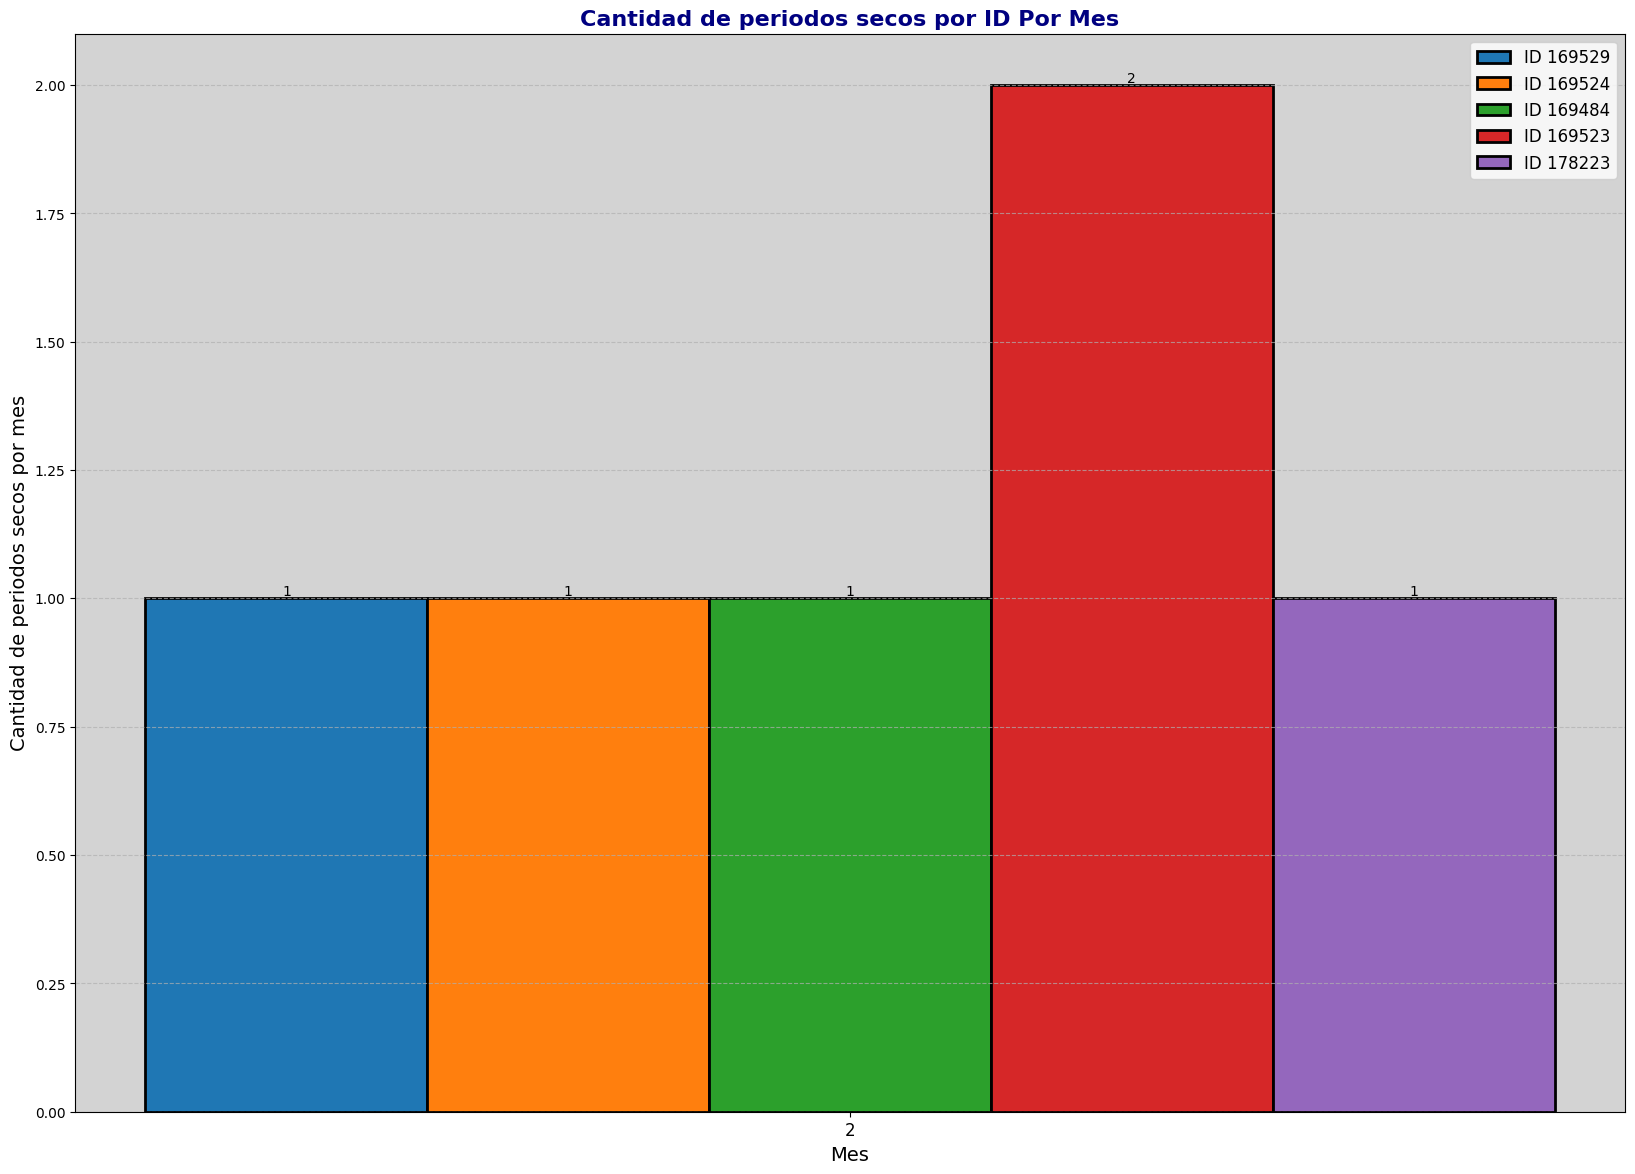

In [11]:
'''esta versión del script ya funciona bien'''
# Crear el DataFrame 'periodo_seco_mes' con las columnas necesarias
periodo_seco_mes = dia_seco[['ID', 'Date & Time', 'Year', 'Mes', 'dia_seco']]

# Verificar que el DataFrame contiene las columnas necesarias
required_columns = ['ID', 'Year', 'Mes', 'Date & Time', 'dia_seco']
for col in required_columns:
    if col not in periodo_seco_mes.columns:
        raise ValueError(f"Falta la columna necesaria: {col}")

'''ver si es necesario que pida el año'''
# Consultar al usuario el año y el mes
año = int(input("Ingrese el año: "))

# Mostrar lista de meses disponibles
meses_disponibles = periodo_seco_mes['Mes'].unique()
print("Meses disponibles:")
for mes in meses_disponibles:
    print(mes)

mes = int(input("Ingrese el mes (1-12): "))

# Filtrar el DataFrame periodo_seco_mes según el año y el mes seleccionados
df_orden_mes = periodo_seco_mes[(periodo_seco_mes['Year'] == año) & (periodo_seco_mes['Mes'] == mes)]
df_orden_mes = df_orden_mes.sort_values(by=['ID', 'Year', 'Mes', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_seco_mes = pd.DataFrame(columns=['ID', 'Year', 'Mes', 'Inicio periodo seco', 'Fin periodo seco', 'Duración periodo seco', 'Dias sin lluvia', 'periodo_seco_mes'])

# Inicializar variables
prev_id = None
prev_year = None
prev_mes = None
dias_sin_lluvia = 0
inicio_periodo = None

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in df_orden_mes.iterrows():
    current_id = row['ID']
    current_year = row['Year']
    current_mes = row['Mes']
    current_date = row['Date & Time']
    
    if (current_id != prev_id or current_year != prev_year or current_mes != prev_mes) and prev_id is not None:
        # Guardar el conteo de periodos secos para el ID, año y mes anterior
        if dias_sin_lluvia >= 5:
            resultados_temp.append({
                'ID': prev_id, 
                'Year': prev_year, 
                'Mes': prev_mes, 
                'Inicio periodo seco': inicio_periodo,
                'Fin periodo seco': prev_date,
                'Duración periodo seco': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'periodo_seco_mes': 1
            })
        # Reiniciar el contador de periodos secos y días sin lluvia
        dias_sin_lluvia = 0
        inicio_periodo = None
    
    if row['dia_seco'] == 1:
        if dias_sin_lluvia == 0:
            inicio_periodo = current_date
        dias_sin_lluvia += 1
    else:
        if dias_sin_lluvia >= 5:
            resultados_temp.append({
                'ID': current_id, 
                'Year': current_year, 
                'Mes': current_mes, 
                'Inicio periodo seco': inicio_periodo,
                'Fin periodo seco': current_date - pd.Timedelta(days=1),
                'Duración periodo seco': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'periodo_seco_mes': 1
            })
        dias_sin_lluvia = 0
        inicio_periodo = None
    
    prev_id = current_id
    prev_year = current_year
    prev_mes = current_mes
    prev_date = current_date

# Agregar el conteo para el último ID, año y mes
if prev_id is not None and dias_sin_lluvia >= 5:
    resultados_temp.append({
        'ID': prev_id, 
        'Year': prev_year, 
        'Mes': prev_mes, 
        'Inicio periodo seco': inicio_periodo,
        'Fin periodo seco': prev_date,
        'Duración periodo seco': dias_sin_lluvia,
        'Dias sin lluvia': dias_sin_lluvia,
        'periodo_seco_mes': 1
    })

# Crear el DataFrame final con los resultados
resultado_periodo_seco_mes = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_periodo_seco_mes['ID'] = resultado_periodo_seco_mes['ID'].astype('int64')

# Añadir la columna 'periodo_seco_mes' para todos los registros donde 'Dias sin lluvia' es menor a 5
for index, row in df_orden_mes.iterrows():
    if row['dia_seco'] == 1:
        dias_sin_lluvia += 1
    else:
        if dias_sin_lluvia < 5:
            resultados_temp.append({
                'ID': row['ID'], 
                'Year': row['Year'], 
                'Mes': row['Mes'], 
                'Inicio periodo seco': inicio_periodo,
                'Fin periodo seco': row['Date & Time'] - pd.Timedelta(days=1),
                'Duración periodo seco': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'periodo_seco_mes': 0
            })

# Agrupar por ID, Year y Mes y sumar la columna periodo_seco_mes
cantidad_periodo_seco_mes = resultado_periodo_seco_mes.groupby(['ID', 'Year', 'Mes']).agg({'periodo_seco_mes': 'sum'}).reset_index()

resultado_periodo_seco_mes.to_csv('C:/Users/stzor/Desktop/Junio/ICDF/resultado_periodo_seco_mes_7jul2024.csv', index=False, sep=';')
# Renombrar la columna periodo_seco_mes a Cantidad de periodos secos
cantidad_periodo_seco_mes = cantidad_periodo_seco_mes.rename(columns={'periodo_seco_mes': 'Cantidad de periodos secos'})

# Convertir el ID a int64
cantidad_periodo_seco_mes['ID'] = cantidad_periodo_seco_mes['ID'].astype('int64')

# Mostrar el DataFrame resultado
print(cantidad_periodo_seco_mes)

# Crear gráfica de barras con cantidad de periodos secos por ID y mes
# Obtener una lista única de meses y IDs
meses = cantidad_periodo_seco_mes['Mes'].unique()
IDs = cantidad_periodo_seco_mes['ID'].unique()
num_meses = len(meses)
num_IDs = len(IDs)

# Ancho de las barras
bar_width = 0.8 / num_IDs

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))

for i, mes in enumerate(meses):
    # Obtener los datos para el mes actual
    data_mes = cantidad_periodo_seco_mes[cantidad_periodo_seco_mes['Mes'] == mes]
    
    for j, ID in enumerate(IDs):
        # Obtener los datos para el ID actual
        data_ID = data_mes[data_mes['ID'] == ID]
        
        # Calcular la posición de la barra en el eje x
        x_position = i + j * bar_width
        
        # Crear la barra para el ID actual
        plt.bar(x_position, data_ID['Cantidad de periodos secos'], 
                width=bar_width, color=plt.cm.tab10(j), edgecolor='black', linewidth=2,
                label=f'ID {ID}')
        
        # Añadir etiquetas de valor en cada barra
        plt.text(x_position, data_ID['Cantidad de periodos secos'], f'{data_ID["Cantidad de periodos secos"].values[0]}',
                 ha='center', va='bottom', fontsize=10, color='black')

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de periodos secos por ID Por Mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de periodos secos por mes', fontsize=14)

# Ajustar las etiquetas del eje x
plt.xticks(np.arange(num_meses) + (0.8 / num_IDs) * (num_IDs - 1) / 2, meses, fontsize=12)

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
plt.legend(handles[:num_IDs], unique_labels[:num_IDs], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Conteo_de_periodos_Secos_por_ID_mes_11jun2024_v4.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()


**Duración promedio de los períodos secos**
Average duration of dry periods during the maize production campaign (September to April). 
This index describes the duration in days of dry spells.

Este índice proporciona una perspectiva cuantitativa sobre la cantidad de días en los que no hay precipitaciones. Un valor alto indica que hay períodos prolongados sin lluvia, lo que puede ser problemático para el crecimiento de los cultivos y requerir medidas de riego adicionales.

Promedio de duración por estación:
ID
169484    19.714286
169523    34.750000
169524    28.200000
169529    15.333333
178223    30.000000
Name: Duración, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5 non-null      int64  
 1   Promedio  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes
None


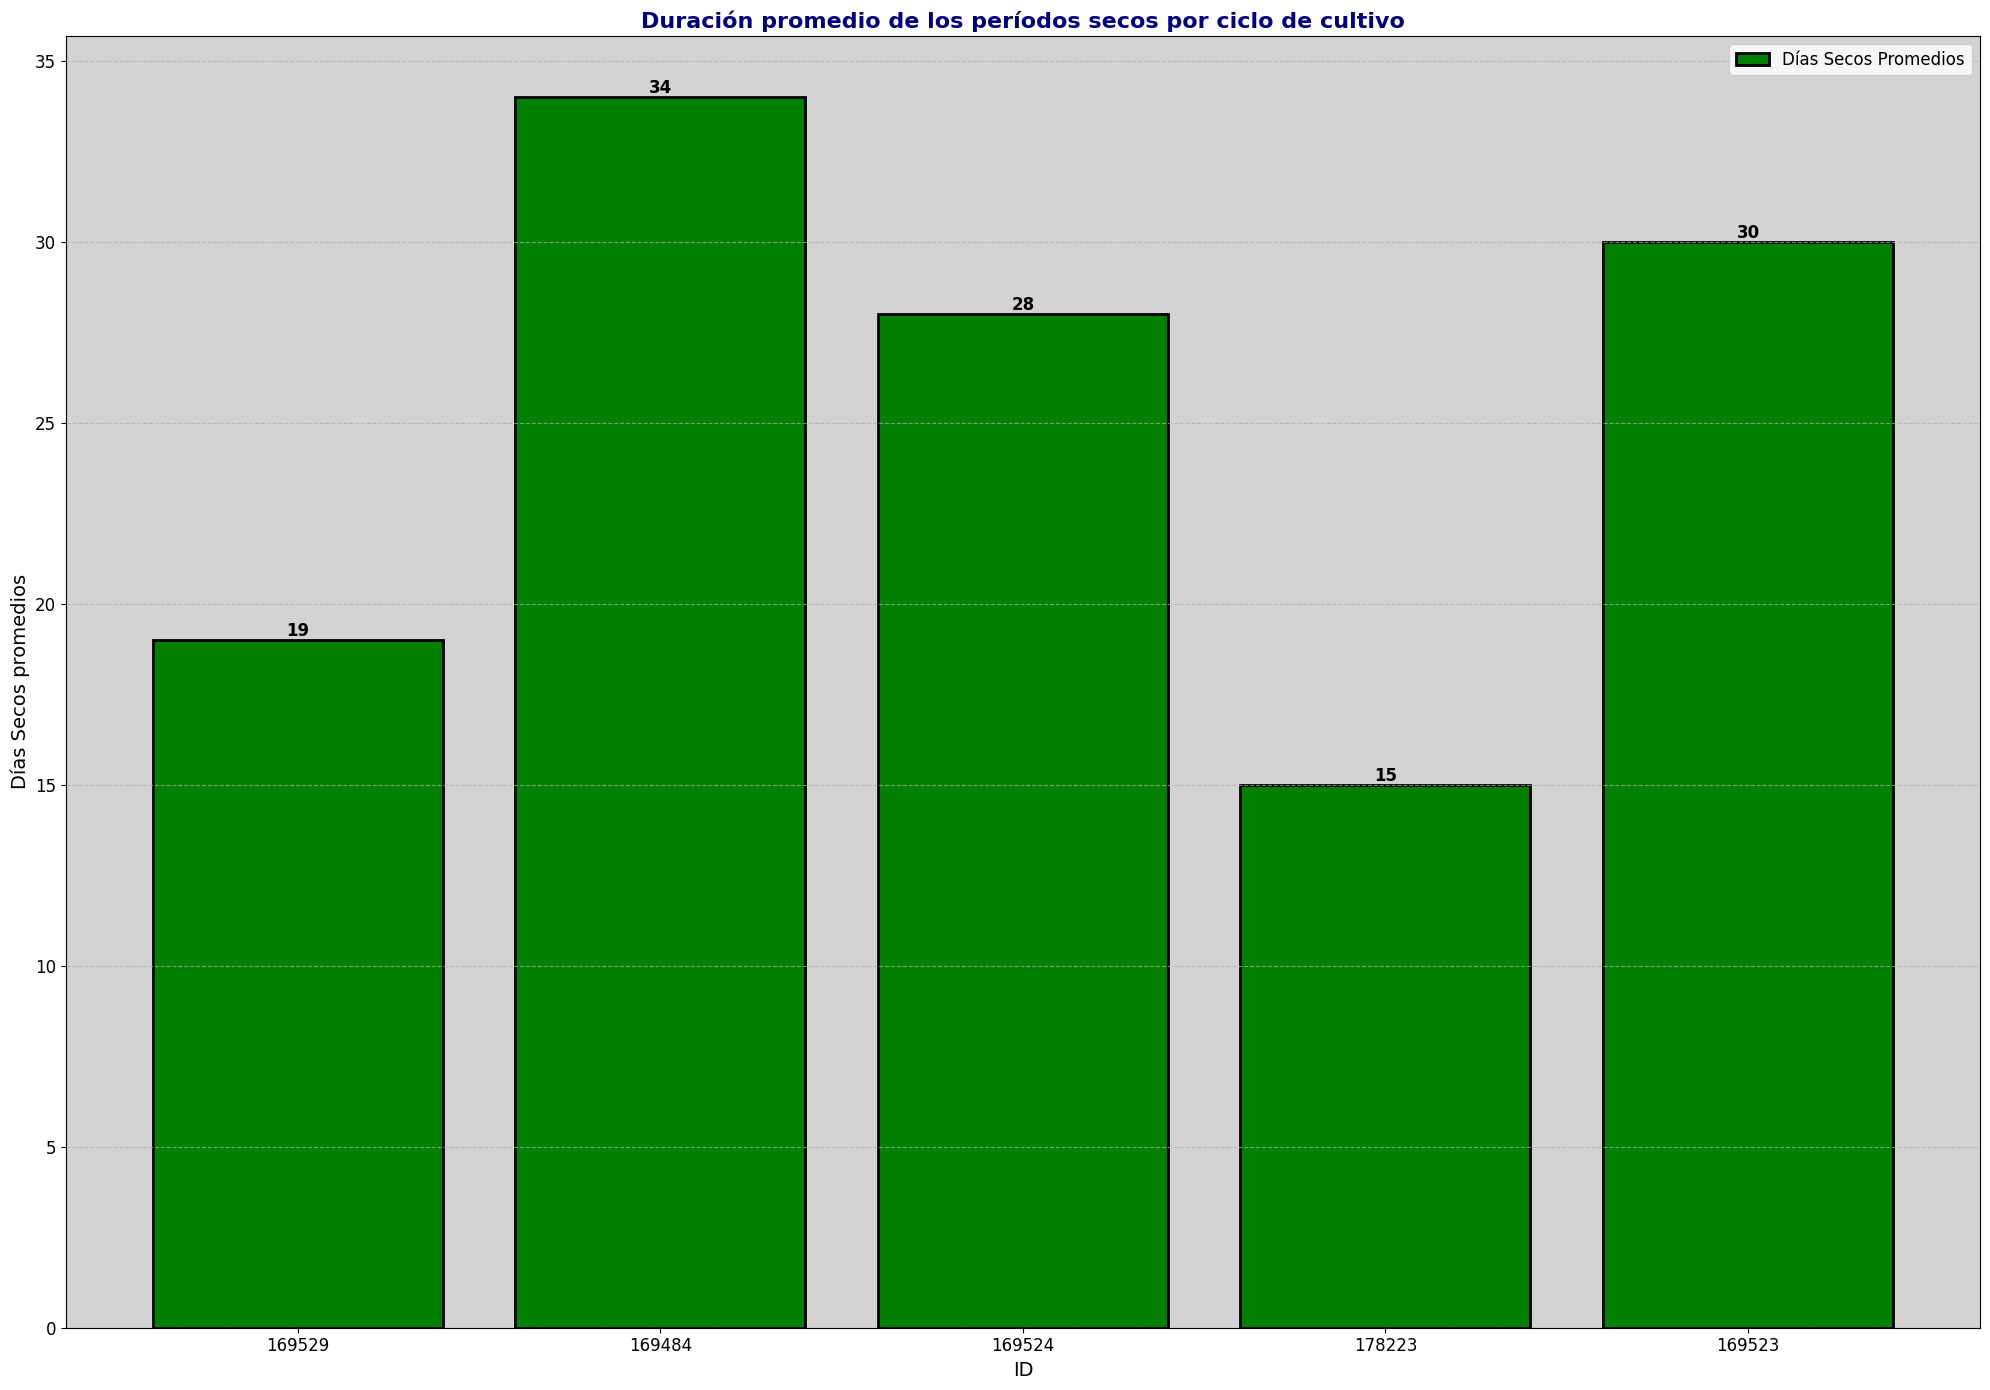

In [29]:
'''esta atado al resultado Sin año seleccionado
ESTE SCRIPT ES POR CICLO DE CULTIVO'''
'''la idea de mejora es llamar a traer el csv o la tabla de la DB'''
# Calcular el promedio de duración por estación
promedio_por_estacion = resultado_dias_sin_lluvia.groupby('ID')['Duración'].mean()

# Mostrar el resultado
print("Promedio de duración por estación:")
print(promedio_por_estacion)

# Convertir el Series en DataFrame
df_promedio = promedio_por_estacion.reset_index()
df_promedio.columns = ['ID', 'Promedio']

# Mostrar el DataFrame resultante
print(df_promedio.info())

# Convertir la columna 'Promedio' a números enteros
df_promedio['Promedio'] = df_promedio['Promedio'].astype(int)

# Ordenar el DataFrame por la columna Count_dias_secos de mayor a menor
promedio_por_estacion = df_promedio.sort_values(by='Promedio', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_promedio.index, df_promedio['Promedio'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración promedio de los períodos secos por ciclo de cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días Secos promedios', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(promedio_por_estacion.index, df_promedio['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días Secos Promedios'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_promedio_períodos_secos_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()

**Duración promedio de los períodos secos POR MES **
revisar el script

In [ ]:
resultado_periodo_seco_mes = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/datos_crudos_all_station_6jun2024.csv', header = 0,delimiter=';')

In [ ]:
'''esta atado al resultado Sin año seleccionado
ESTE SCRIPT ES POR mes'''
'''la idea de mejora es llamar a traer el csv o la tabla de la DB'''
# Calcular el promedio de duración por estación
promedio_por_estacion = resultado_periodo_seco_mes.groupby('ID')['Duración'].mean()

# Mostrar el resultado
print("Promedio de duración por estación:")
print(promedio_por_estacion)

# Convertir el Series en DataFrame
df_promedio = promedio_por_estacion.reset_index()
df_promedio.columns = ['ID', 'Promedio']

# Mostrar el DataFrame resultante
print(df_promedio.info())

# Convertir la columna 'Promedio' a números enteros
df_promedio['Promedio'] = df_promedio['Promedio'].astype(int)

# Ordenar el DataFrame por la columna Count_dias_secos de mayor a menor
promedio_por_estacion = df_promedio.sort_values(by='Promedio', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_promedio.index, df_promedio['Promedio'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración promedio de los períodos secos por mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días Secos promedios', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(promedio_por_estacion.index, df_promedio['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días Secos Promedios'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_promedio_períodos_secos_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()

**Número de días húmedos Por Ciclo de Cultivo Por Estación**
Total number of rainy days during the maize production campaign (September to April). 
A rainy day occurs when the amount of daily precipitation falls above 1 mm.

In [30]:
dia_seco.head()

,ID,Dia,Lluvia - mm,Date & Time,dia_seco
0,169484,2023-11-14,2.6,2023-11-14,0
1,169484,2023-11-15,0.0,2023-11-15,1
2,169484,2023-11-16,0.8,2023-11-16,1
3,169484,2023-11-17,0.0,2023-11-17,1
4,169484,2023-11-18,0.0,2023-11-18,1


Seleccione el número de días:
1. 150 días
2. 120 días
Para el ID 169484: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 169523: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 169524: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 169529: Fecha de inicio: 2023-12-03, Fecha de fin: 2024-03-31, Total registros encontrados: 120
Para el ID 178223: Fecha de inicio: 2024-01-26, Fecha de fin: 2024-03-31, Total registros encontrados: 66
       ID  Count_dias_humedos
0  169484                   4
1  169523                   1
2  169524                   4
3  169529                   5


C:\Users\stzor\AppData\Local\Temp\ipykernel_1868\1440568069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia_humedo_periodo['Year'] = dia_humedo_periodo['Date & Time'].dt.year


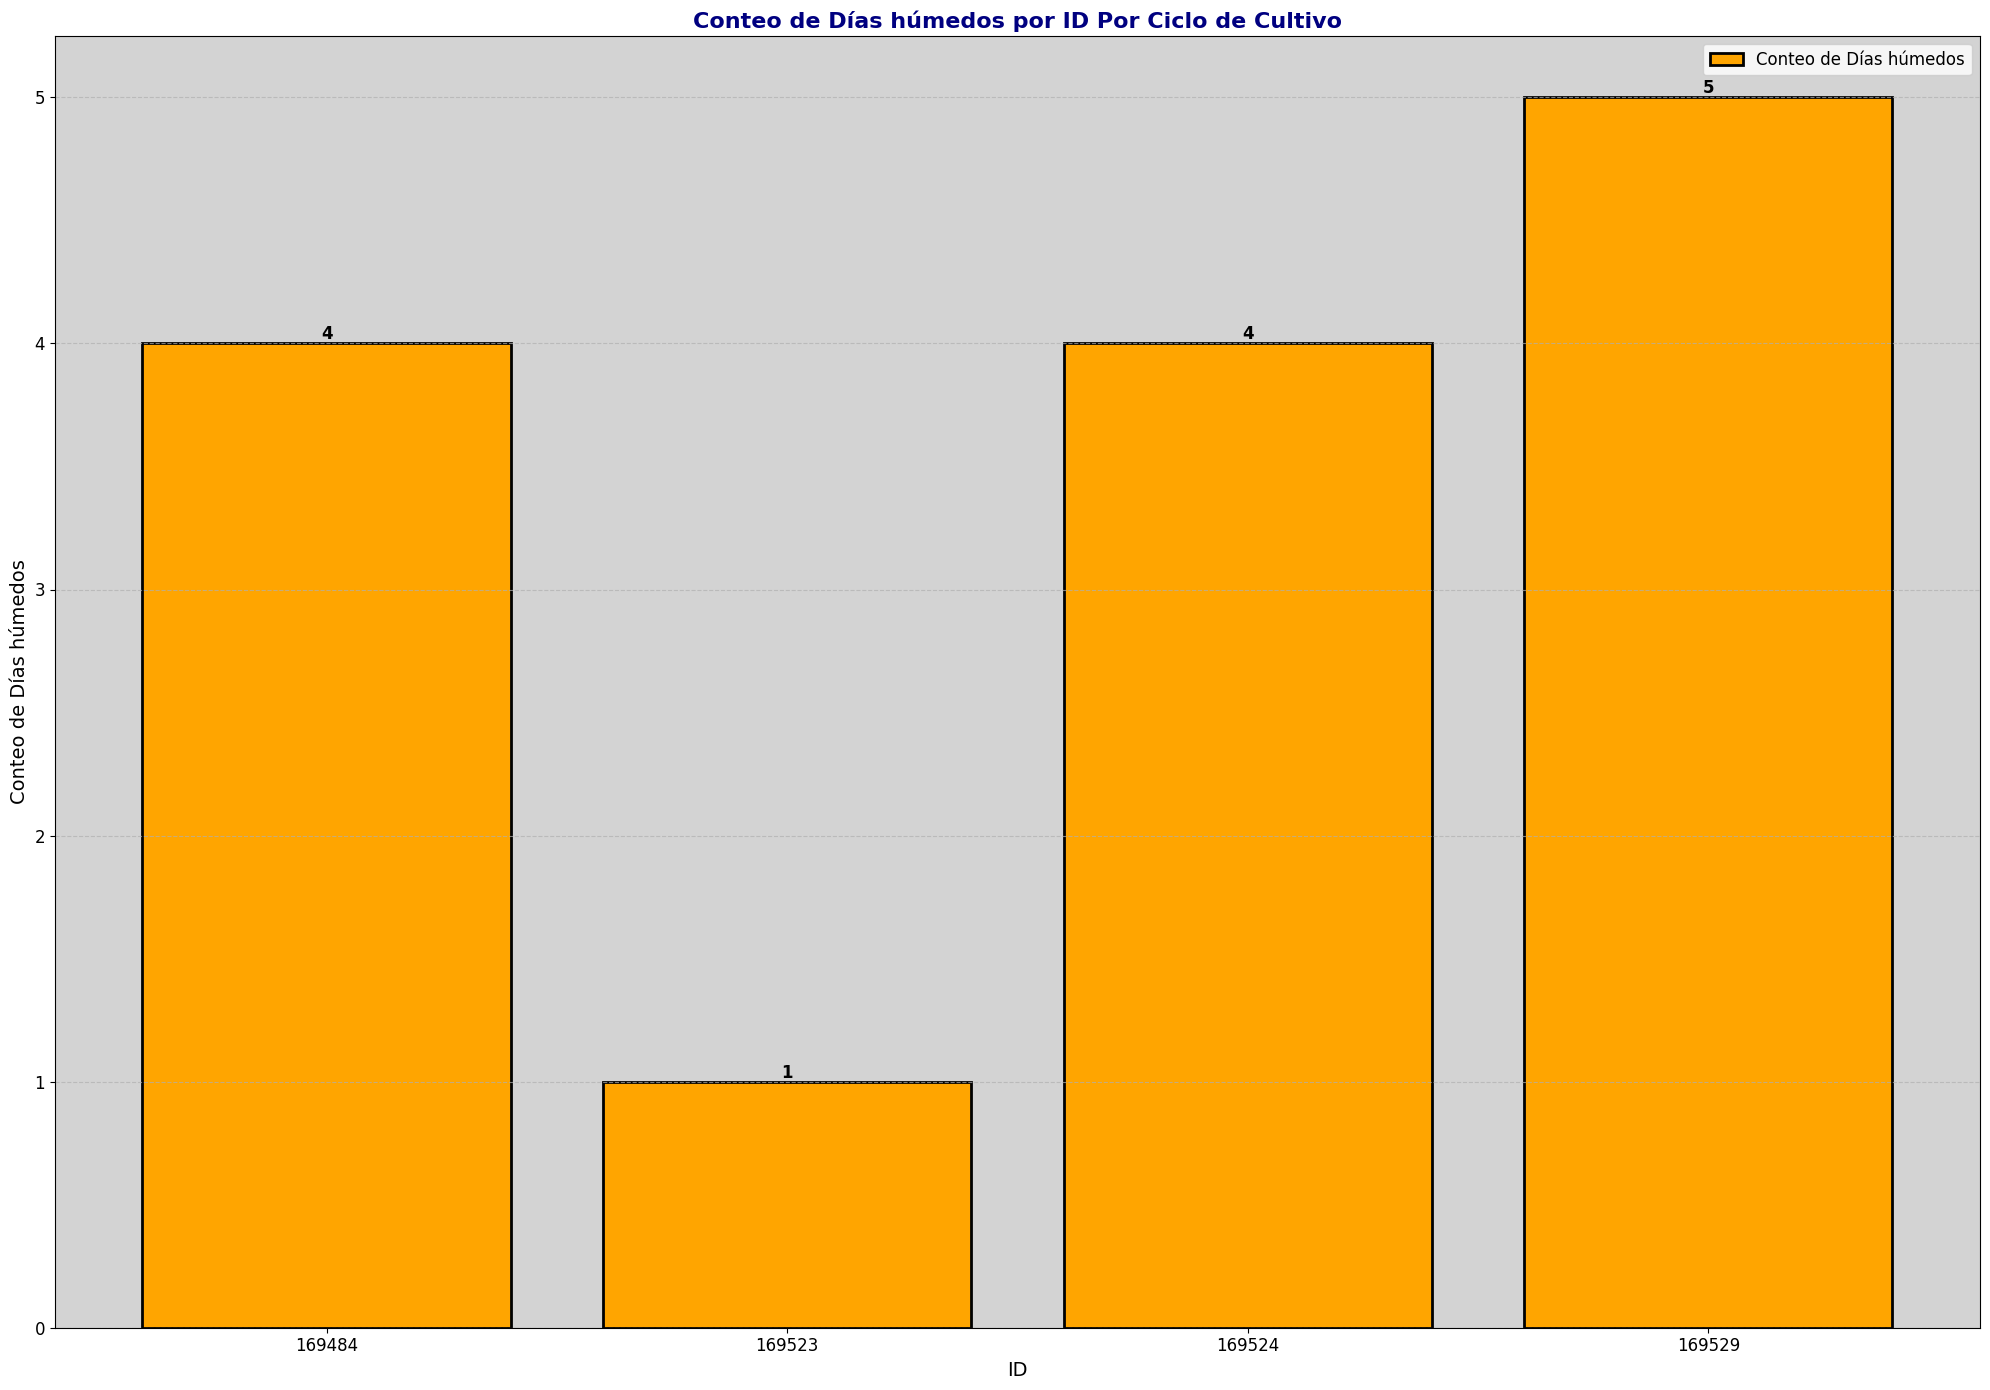

In [34]:
# Declarar el DataFrame global
conteo_dias_humedos = pd.DataFrame()

def dias_humedos():
    global conteo_dias_humedos
    
    dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Pedir al usuario que ingrese una fecha
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Filtrar el DataFrame a partir de la fecha ingresada y el número de días seleccionados
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)
    dia_humedo_periodo = dia_seco[(dia_seco['Date & Time'] >= fecha_inicio) &
                                    (dia_seco['Date & Time'] <= fecha_fin)]

    # Verificar y mostrar la fecha de inicio y fin para cada ID (estación meteorológica)
    ids_todos = dia_seco['ID'].unique()
    tiene_datos = False  # Variable para verificar si hay datos para algún ID

    for id in ids_todos:
        datos_id = dia_humedo_periodo[dia_humedo_periodo['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            tiene_datos = True
            fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    if not tiene_datos:
        return

    # Crear una columna de año
    dia_humedo_periodo['Year'] = dia_humedo_periodo['Date & Time'].dt.year

    # Agrupar por año e ID y contar los días húmedos
    conteo_dias_humedos = dia_humedo_periodo[dia_humedo_periodo['dia_seco'] == 0].groupby(['ID']).size().reset_index(name='Count_dias_humedos')

    # Mostrar el resultado
    print(conteo_dias_humedos)

if __name__ == "__main__":
    # Supongo que 'dia_humedo' ya está definido en el entorno del script
    # Aquí se llama la función para contar los días húmedos
    dias_humedos()

# Ordenar el DataFrame por la columna Count_dias_secos de mayor a menor
conteo_dias_humedos = conteo_dias_humedos.sort_values(by='Count_dias_humedos', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(conteo_dias_humedos.index, conteo_dias_humedos['Count_dias_humedos'], color='orange', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Conteo de Días húmedos por ID Por Ciclo de Cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Conteo de Días húmedos', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(conteo_dias_humedos.index, conteo_dias_humedos['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Conteo de Días húmedos'], loc='upper right', fontsize=12)

# Mostrar gráfica
plt.show()

**No. de días húmedos Por Mes Por Estación**
A rainy day occurs when the amount of daily precipitation falls above 1 mm.

Años disponibles: [2023 2024]
Meses disponibles: [1 2 3 4 5]
   Year  Mes      ID  Count_dias_humedos
0  2024    4  169484                   4
1  2024    4  169523                   2
2  2024    4  169524                   1
3  2024    4  169529                   3
4  2024    4  178223                   2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                5 non-null      int32
 1   Mes                 5 non-null      int32
 2   ID                  5 non-null      int64
 3   Count_dias_humedos  5 non-null      int64
dtypes: int32(2), int64(2)
memory usage: 252.0 bytes
None


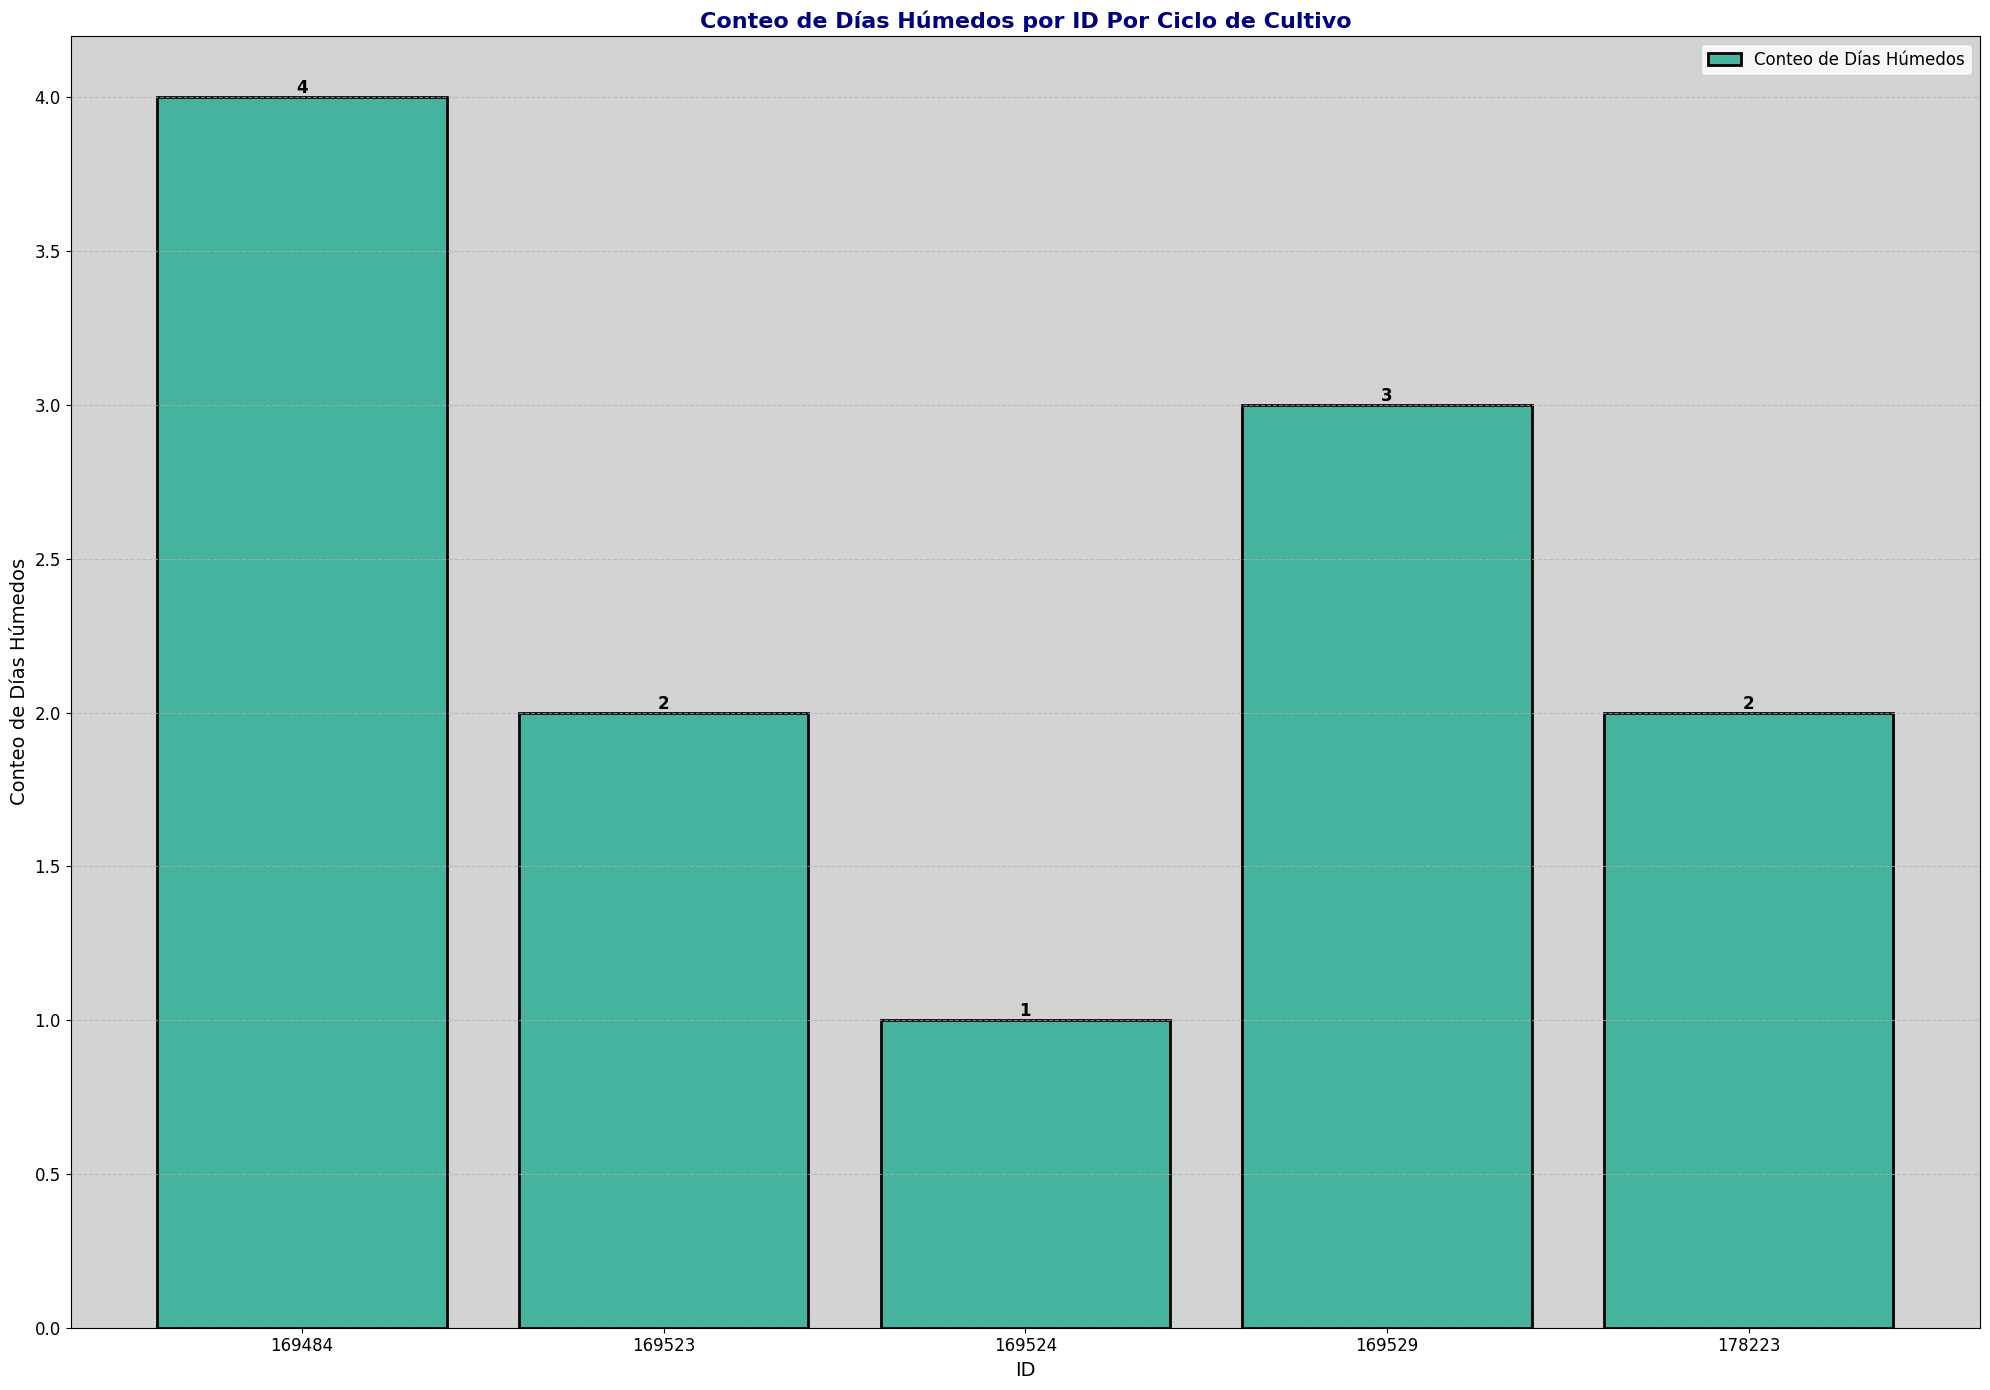

In [19]:
def seleccionar_anio_mes(df):
    # Mostrar los años disponibles
    anios_disponibles = df['Year'].unique()
    print("Años disponibles:", anios_disponibles)
    anio = int(input("Seleccione el año: "))

    # Filtrar el DataFrame por el año seleccionado
    df_anio = df[df['Year'] == anio]

    # Mostrar los meses disponibles para el año seleccionado
    meses_disponibles = df_anio['Mes'].unique()
    print("Meses disponibles:", meses_disponibles)
    mes = int(input("Seleccione el mes (1-12): "))

    return anio, mes, df_anio[df_anio['Mes'] == mes]

def contar_dias_humedos(df, anio, mes):
    # Agrupar por año, mes e ID y contar los días húmedos
    conteo_dias_humedos = df[df['dia_seco'] == 0].groupby(['Year', 'Mes', 'ID']).size().reset_index(name='Count_dias_humedos')

    # Filtrar por el año y mes seleccionados
    conteo_dias_humedos_filtrado = conteo_dias_humedos[(conteo_dias_humedos['Year'] == anio) & (conteo_dias_humedos['Mes'] == mes)]

    return conteo_dias_humedos_filtrado

def graficar_dias_humedos(conteo_dias_humedos):
    # Ordenar el DataFrame por la columna Count_dias_humedos de mayor a menor
    conteo_dias_humedos = conteo_dias_humedos.sort_values(by='Count_dias_humedos', ascending=False)

    # Crear gráfica de barras con un estilo más atractivo
    plt.figure(figsize=(20, 14))
    bars = plt.bar(conteo_dias_humedos.index, conteo_dias_humedos['Count_dias_humedos'], color='#45B39D', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

    # Añadir título y etiquetas a los ejes
    plt.title('Conteo de Días Húmedos por ID Por Ciclo de Cultivo', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('ID', fontsize=14)
    plt.ylabel('Conteo de Días Húmedos', fontsize=14)

    # Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
                 ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

    # Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
    plt.xticks(conteo_dias_humedos.index, conteo_dias_humedos['ID'], fontsize=12)  # Rotar etiquetas si son muchas y se solapan
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

    # Personalizar el fondo y la cuadrícula de la gráfica
    plt.gca().set_facecolor('lightgrey')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir una leyenda y personalizarla
    plt.legend(['Conteo de Días Húmedos'], loc='upper right', fontsize=12)

    # Mostrar gráfica
    plt.show()


if __name__ == "__main__":
    # Supongamos que dia_seco es tu DataFrame original
    dia_seco = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/dia_seco_25jun2024_v3.csv', header = 0,delimiter=';', encoding='latin-1') 

    # Crear una copia del DataFrame original
    df_dia_humedo = dia_seco.copy()

    # Asegurarse de que la columna de fecha esté en formato datetime
    df_dia_humedo['Date & Time'] = pd.to_datetime(df_dia_humedo['Date & Time'])

    # Crear columnas Year y Mes
    df_dia_humedo['Year'] = df_dia_humedo['Date & Time'].dt.year
    df_dia_humedo['Mes'] = df_dia_humedo['Date & Time'].dt.month

    # Seleccionar el año y mes
    anio, mes, df_filtrado = seleccionar_anio_mes(df_dia_humedo)

    # Contar los días húmedos
    conteo_dias_humedos = contar_dias_humedos(df_filtrado, anio, mes)

    # Mostrar el resultado
    print(conteo_dias_humedos)
    print(conteo_dias_humedos.info())

    # Graficar los días húmedos
    graficar_dias_humedos(conteo_dias_humedos)


**Número de períodos húmedos Por Ciclo de Cultivo Por Estación**
Total number of rainy periods during the maize production campaign (September to April). 
A wet period is defined as a period of five or more consecutive days of rain followed immediately by a dry day.

In [17]:
import pandas as pd
from datetime import datetime

# Supongo que df_dia_humedo ya está definido y contiene los datos necesarios
# Crear una copia de df_dia_humedo para periodo_humedo
periodo_humedo = df_dia_humedo.copy()

def seleccionar_fecha():
    fecha_inicio = input("Ingrese la fecha de inicio en formato YYYY-MM-DD: ")
    try:
        fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha no válido. Por favor, use el formato YYYY-MM-DD.")
    return fecha_inicio

def seleccionar_dias():
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")
    if opcion == '1':
        return 150
    elif opcion == '2':
        return 120
    else:
        print("Opción no válida.")
        return seleccionar_dias()

# Solicitar la fecha de inicio y el número de días al usuario
fecha_inicio = seleccionar_fecha()
num_dias = seleccionar_dias()

# Filtrar los datos en base a la fecha de inicio y el número de días seleccionados
periodo_humedo['Date & Time'] = pd.to_datetime(periodo_humedo['Date & Time'])
fecha_fin = fecha_inicio + pd.DateOffset(days=num_dias)
periodo_humedo = periodo_humedo[(periodo_humedo['Date & Time'] >= fecha_inicio) & (periodo_humedo['Date & Time'] < fecha_fin)]

# Ordenar el DataFrame por 'ID' y 'Date & Time'
periodo_humedo = periodo_humedo.sort_values(by=['ID', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_humedo = pd.DataFrame(columns=['ID', 'No. de periodos húmedos'])

# Inicializar variables
prev_id = None
dias_con_lluvia = 0
num_periodos_humedos = 0

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in periodo_humedo.iterrows():
    current_id = row['ID']
    
    if current_id != prev_id and prev_id is not None:
        # Guardar el conteo de periodos húmedos para el ID anterior
        resultados_temp.append({'ID': prev_id, 'No. de periodos húmedos': num_periodos_humedos})
        # Reiniciar el contador de periodos húmedos
        num_periodos_humedos = 0
        dias_con_lluvia = 0
    
    if row['dia_seco'] == 0:
        dias_con_lluvia += 1
    else:
        if dias_con_lluvia >= 5:
            num_periodos_humedos += 1
        dias_con_lluvia = 0
    
    prev_id = current_id

# Agregar el conteo para el último ID
if prev_id is not None:
    resultados_temp.append({'ID': prev_id, 'No. de periodos húmedos': num_periodos_humedos})

# Crear el DataFrame final con los resultados
resultado_periodo_humedo = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_periodo_humedo['ID'] = resultado_periodo_humedo['ID'].astype('int64')

# Mostrar el DataFrame resultado
print(resultado_periodo_humedo)


Seleccione el número de días:
1. 150 días
2. 120 días
       ID  No. de periodos húmedos
0  169484                        0
1  169523                        0
2  169524                        0
3  169529                        0
4  178223                        0


script con la gráfica agregada

Seleccione el número de días:
1. 150 días
2. 120 días
       ID  No. de periodos húmedos
0  169484                        0
1  169523                        0
2  169524                        0
3  169529                        0
4  178223                        0


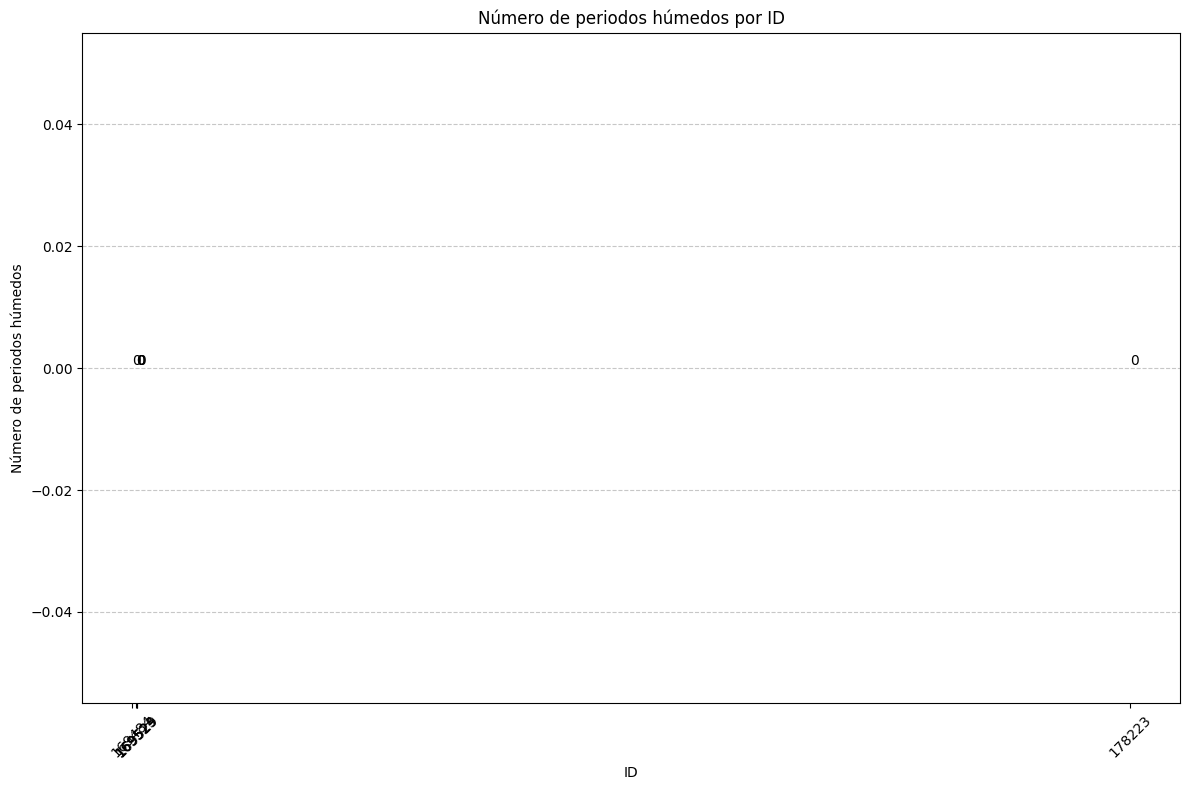

In [25]:
# Crear una copia de df_dia_humedo para periodo_humedo
periodo_humedo = df_dia_humedo.copy()

def seleccionar_fecha():
    fecha_inicio = input("Ingrese la fecha de inicio en formato YYYY-MM-DD: ")
    try:
        fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha no válido. Por favor, use el formato YYYY-MM-DD.")
    return fecha_inicio

def seleccionar_dias():
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")
    if opcion == '1':
        return 150
    elif opcion == '2':
        return 120
    else:
        print("Opción no válida.")
        return seleccionar_dias()

# Solicitar la fecha de inicio y el número de días al usuario
fecha_inicio = seleccionar_fecha()
num_dias = seleccionar_dias()

# Filtrar los datos en base a la fecha de inicio y el número de días seleccionados
periodo_humedo['Date & Time'] = pd.to_datetime(periodo_humedo['Date & Time'])
fecha_fin = fecha_inicio + pd.DateOffset(days=num_dias)
periodo_humedo = periodo_humedo[(periodo_humedo['Date & Time'] >= fecha_inicio) & (periodo_humedo['Date & Time'] < fecha_fin)]

# Ordenar el DataFrame por 'ID' y 'Date & Time'
periodo_humedo = periodo_humedo.sort_values(by=['ID', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_humedo = pd.DataFrame(columns=['ID', 'No. de periodos húmedos'])

# Inicializar variables
prev_id = None
dias_con_lluvia = 0
num_periodos_humedos = 0

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in periodo_humedo.iterrows():
    current_id = row['ID']
    
    if current_id != prev_id and prev_id is not None:
        # Guardar el conteo de periodos húmedos para el ID anterior
        resultados_temp.append({'ID': prev_id, 'No. de periodos húmedos': num_periodos_humedos})
        # Reiniciar el contador de periodos húmedos
        num_periodos_humedos = 0
        dias_con_lluvia = 0
    
    if row['dia_seco'] == 0:
        dias_con_lluvia += 1
    else:
        if dias_con_lluvia >= 5:
            num_periodos_humedos += 1
        dias_con_lluvia = 0
    
    prev_id = current_id

# Agregar el conteo para el último ID
if prev_id is not None:
    resultados_temp.append({'ID': prev_id, 'No. de periodos húmedos': num_periodos_humedos})

# Crear el DataFrame final con los resultados
resultado_periodo_humedo = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_periodo_humedo['ID'] = resultado_periodo_humedo['ID'].astype('int64')

# Mostrar el DataFrame resultado
print(resultado_periodo_humedo)

# Generar gráfico de barras mejorado
plt.figure(figsize=(12, 8))
bars = plt.bar(resultado_periodo_humedo['ID'], resultado_periodo_humedo['No. de periodos húmedos'], color='skyblue')

# Etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', fontsize=10)

plt.xlabel('ID')
plt.ylabel('Número de periodos húmedos')
plt.title('Número de periodos húmedos por ID')
plt.xticks(resultado_periodo_humedo['ID'], fontsize=10, rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Seleccione el número de días:
1. 150 días
2. 120 días
       ID  No. de periodos húmedos
0  169484                        0
1  169523                        0
2  169524                        0
3  169529                        0
4  178223                        0
Para el ID 169484: Fecha de inicio: 2023-11-14, Fecha de fin: 2024-03-29, Total registros encontrados: 137
Para el ID 169523: Fecha de inicio: 2023-11-14, Fecha de fin: 2024-03-29, Total registros encontrados: 137
Para el ID 169524: Fecha de inicio: 2023-11-14, Fecha de fin: 2024-03-29, Total registros encontrados: 137
Para el ID 169529: Fecha de inicio: 2023-11-14, Fecha de fin: 2024-03-29, Total registros encontrados: 137
Para el ID 178223: Fecha de inicio: 2024-01-26, Fecha de fin: 2024-03-29, Total registros encontrados: 64


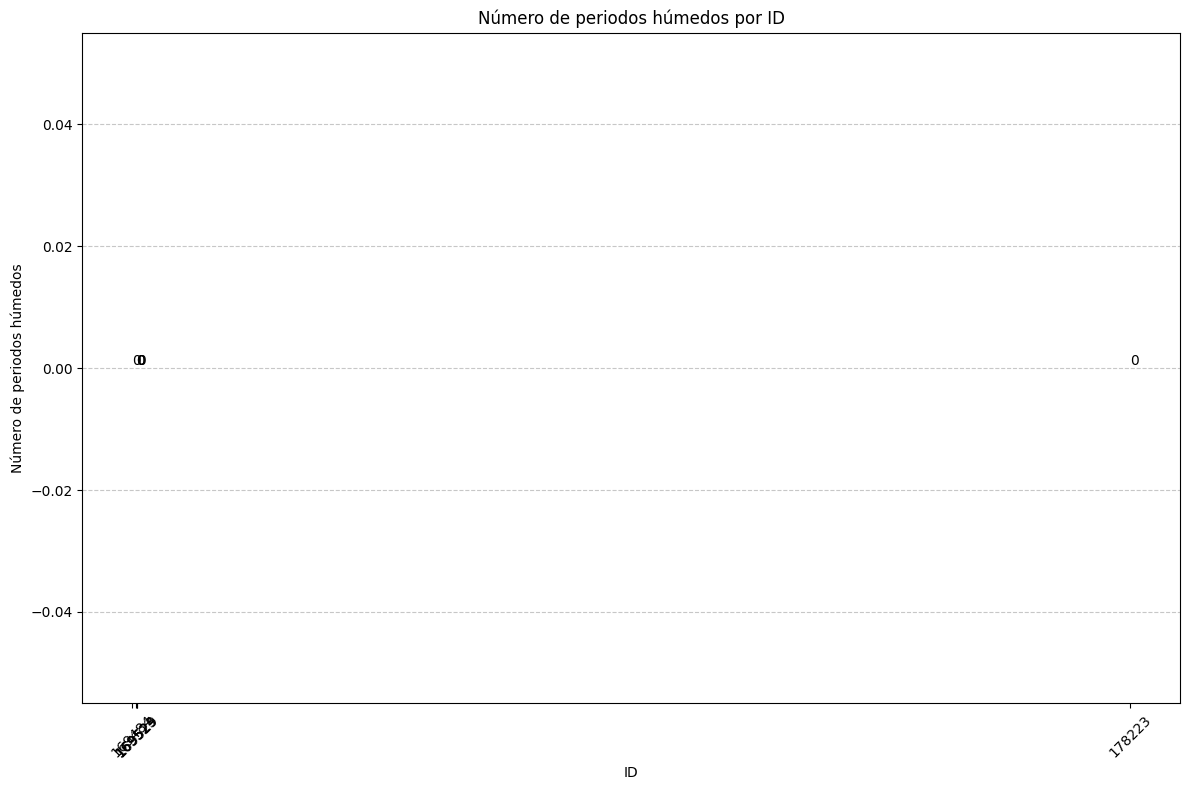

In [31]:
# Crear una copia de df_dia_humedo para periodo_humedo
periodo_humedo = df_dia_humedo.copy()

def seleccionar_fecha():
    fecha_inicio = input("Ingrese la fecha de inicio en formato YYYY-MM-DD: ")
    try:
        fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha no válido. Por favor, use el formato YYYY-MM-DD.")
    return fecha_inicio

def seleccionar_dias():
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")
    if opcion == '1':
        return 150
    elif opcion == '2':
        return 120
    else:
        print("Opción no válida.")
        return seleccionar_dias()

# Solicitar la fecha de inicio y el número de días al usuario
fecha_inicio = seleccionar_fecha()
num_dias = seleccionar_dias()

# Filtrar los datos en base a la fecha de inicio y el número de días seleccionados
periodo_humedo['Date & Time'] = pd.to_datetime(periodo_humedo['Date & Time'])
fecha_fin = fecha_inicio + pd.DateOffset(days=num_dias)
periodo_humedo = periodo_humedo[(periodo_humedo['Date & Time'] >= fecha_inicio) & (periodo_humedo['Date & Time'] < fecha_fin)]

# Ordenar el DataFrame por 'ID' y 'Date & Time'
periodo_humedo = periodo_humedo.sort_values(by=['ID', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_humedo = pd.DataFrame(columns=['ID', 'No. de periodos húmedos'])

# Inicializar variables
prev_id = None
dias_con_lluvia = 0
num_periodos_humedos = 0

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in periodo_humedo.iterrows():
    current_id = row['ID']
    
    if current_id != prev_id and prev_id is not None:
        # Guardar el conteo de periodos húmedos para el ID anterior
        resultados_temp.append({'ID': prev_id, 'No. de periodos húmedos': num_periodos_humedos})
        # Reiniciar el contador de periodos húmedos
        num_periodos_humedos = 0
        dias_con_lluvia = 0
    
    if row['dia_seco'] == 0:
        dias_con_lluvia += 1
    else:
        if dias_con_lluvia >= 5:
            num_periodos_humedos += 1
        dias_con_lluvia = 0
    
    prev_id = current_id

# Agregar el conteo para el último ID
if prev_id is not None:
    resultados_temp.append({'ID': prev_id, 'No. de periodos húmedos': num_periodos_humedos})

# Crear el DataFrame final con los resultados
resultado_periodo_humedo = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_periodo_humedo['ID'] = resultado_periodo_humedo['ID'].astype('int64')

# Crear el DataFrame final con los resultados
resultado_periodo_humedo = pd.DataFrame(resultados_temp)

# Mostrar el DataFrame resultado
print(resultado_periodo_humedo)



# Obtener las fechas de inicio y fin para el mensaje
fecha_inicio_str = fecha_inicio.strftime("%Y-%m-%d")
fecha_fin_str = fecha_fin.strftime("%Y-%m-%d")



# Mostrar información adicional para cada ID en el período húmedo seleccionado
ids_todos = periodo_humedo['ID'].unique()

for id in ids_todos:
    datos_id = periodo_humedo[periodo_humedo['ID'] == id]
    if datos_id.empty:
        print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
    else:
        fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
        fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
        total_registros = datos_id.shape[0]
        print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

import matplotlib.pyplot as plt

# Generar gráfico de barras mejorado
plt.figure(figsize=(12, 8))
bars = plt.bar(resultado_periodo_humedo['ID'], resultado_periodo_humedo['No. de periodos húmedos'], color='#3498DB')  # Cambio de color a #3498DB

# Etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', fontsize=10, color='black')  # Asegurar que el texto sea visible

plt.xlabel('ID')
plt.ylabel('Número de periodos húmedos')
plt.title('Número de periodos húmedos por ID')
plt.xticks(resultado_periodo_humedo['ID'], fontsize=10, rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**No de períodos húmedos Por Mes por Estación**

In [4]:
# Supongamos que dia_seco es tu DataFrame original
dia_seco = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/dia_seco_25jun2024_v3.csv', header = 0,delimiter=';', encoding='latin-1') 

# Crear una copia del DataFrame original
df_dia_humedo = dia_seco.copy()

# Asegurarse de que la columna de fecha esté en formato datetime
df_dia_humedo['Date & Time'] = pd.to_datetime(df_dia_humedo['Date & Time'])

# Crear columnas Year y Mes
df_dia_humedo['Year'] = df_dia_humedo['Date & Time'].dt.year
df_dia_humedo['Mes'] = df_dia_humedo['Date & Time'].dt.month



# Crear el DataFrame 'periodo_seco_mes' con las columnas necesarias
periodo_humedo_mes = df_dia_humedo[['ID', 'Date & Time', 'Year', 'Mes', 'dia_seco']]

# Verificar que el DataFrame contiene las columnas necesarias
required_columns = ['ID', 'Year', 'Mes', 'Date & Time', 'dia_seco']
for col in required_columns:
    if col not in periodo_seco_mes.columns:
        raise ValueError(f"Falta la columna necesaria: {col}")

# Consultar al usuario el año y el mes
while True:
    try:
        año = int(input("Ingrese el año (ej. 2024): "))
        break
    except ValueError:
        print("Error: Ingrese un año válido.")

# Mostrar lista de meses disponibles
meses_disponibles = periodo_humedo_mes['Mes'].unique()
print("Meses disponibles:")
for mes in meses_disponibles:
    print(mes)

while True:
    try:
        mes = int(input("Ingrese el mes (1-12): "))
        if mes < 1 or mes > 12:
            raise ValueError("El mes debe estar entre 1 y 12.")
        break
    except ValueError as ve:
        print(f"Error: {ve}")

# Filtrar el DataFrame periodo_seco_mes según el año y el mes seleccionados
df_orden_mes = periodo_humedo_mes[(periodo_humedo_mes['Year'] == año) & (periodo_humedo_mes['Mes'] == mes)]
df_orden_mes = df_orden_mes.sort_values(by=['ID', 'Year', 'Mes', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_seco_mes = pd.DataFrame(columns=['ID', 'Year', 'Mes', 'Inicio periodo seco', 'Fin periodo seco', 'Duración periodo seco', 'Dias sin lluvia', 'periodo_seco_mes'])

# Inicializar variables
prev_id = None
prev_year = None
prev_mes = None
dias_sin_lluvia = 0
inicio_periodo = None

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in df_orden_mes.iterrows():
    current_id = row['ID']
    current_year = row['Year']
    current_mes = row['Mes']
    current_date = row['Date & Time']
    
    if (current_id != prev_id or current_year != prev_year or current_mes != prev_mes) and prev_id is not None:
        # Guardar el conteo de periodos secos para el ID, año y mes anterior
        if dias_sin_lluvia >= 5:
            resultados_temp.append({
                'ID': prev_id, 
                'Year': prev_year, 
                'Mes': prev_mes, 
                'Inicio periodo seco': inicio_periodo,
                'Fin periodo seco': prev_date,
                'Duración periodo seco': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'periodo_seco_mes': 1
            })
        # Reiniciar el contador de periodos secos y días sin lluvia
        dias_sin_lluvia = 0
        inicio_periodo = None
    
    if row['dia_seco'] == 0:
        if dias_sin_lluvia == 1:
            inicio_periodo = current_date
        dias_sin_lluvia += 1
    else:
        if dias_sin_lluvia >= 5:
            resultados_temp.append({
                'ID': current_id, 
                'Year': current_year, 
                'Mes': current_mes, 
                'Inicio periodo seco': inicio_periodo,
                'Fin periodo seco': current_date - pd.Timedelta(days=1),
                'Duración periodo seco': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'periodo_seco_mes': 1
            })
        dias_sin_lluvia = 0
        inicio_periodo = None
    
    prev_id = current_id
    prev_year = current_year
    prev_mes = current_mes
    prev_date = current_date

# Agregar el conteo para el último ID, año y mes
if prev_id is not None and dias_sin_lluvia >= 5:
    resultados_temp.append({
        'ID': prev_id, 
        'Year': prev_year, 
        'Mes': prev_mes, 
        'Inicio periodo seco': inicio_periodo,
        'Fin periodo seco': prev_date,
        'Duración periodo seco': dias_sin_lluvia,
        'Dias sin lluvia': dias_sin_lluvia,
        'periodo_seco_mes': 1
    })

# Crear el DataFrame final con los resultados
resultado_periodo_humedo_mes = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_periodo_humedo_mes['ID'] = resultado_periodo_humedo_mes['ID'].astype('int64')

# Agrupar por ID, Year y Mes y sumar la columna periodo_seco_mes
cantidad_periodo_humedo_mes = resultado_periodo_humedo_mes.groupby(['ID', 'Year', 'Mes']).agg({'periodo_humedo_mes': 'sum'}).reset_index()

# Renombrar la columna periodo_seco_mes a Cantidad de periodos secos
cantidad_periodo_humedo_mes = cantidad_periodo_humedo_mes.rename(columns={'periodo_humedo_mes': 'Cantidad de periodos humedos'})

# Convertir el ID a int64
cantidad_periodo_humedo_mes['ID'] = cantidad_periodo_humedo_mes['ID'].astype('int64')

# Mostrar el DataFrame resultado
print(cantidad_periodo_humedo_mes)

# Crear gráfica de barras con cantidad de periodos secos por ID y mes
# Obtener una lista única de meses y IDs
meses = cantidad_periodo_humedo_mes['Mes'].unique()
IDs = cantidad_periodo_humedo_mes['ID'].unique()
num_meses = len(meses)
num_IDs = len(IDs)

# Ancho de las barras
bar_width = 0.8 / num_IDs

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))

for i, mes in enumerate(meses):
    # Obtener los datos para el mes actual
    data_mes = cantidad_periodo_humedo_mes[cantidad_periodo_humedo_mes['Mes'] == mes]
    
    for j, ID in enumerate(IDs):
        # Obtener los datos para el ID actual
        data_ID = data_mes[data_mes['ID'] == ID]
        
        # Calcular la posición de la barra en el eje x
        x_position = i + j * bar_width
        
        # Crear la barra para el ID actual
        plt.bar(x_position, data_ID['Cantidad de periodos secos'], 
                width=bar_width, color=plt.cm.tab10(j), edgecolor='black', linewidth=2,
                label=f'ID {ID}')
        
        # Añadir etiquetas de valor en cada barra
        plt.text(x_position, data_ID['Cantidad de periodos humedos'], f'{data_ID["Cantidad de periodos humedos"].values[0]}',
                 ha='center', va='bottom', fontsize=10, color='black')

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de periodos humedos por ID Por Mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de periodos humedos por mes', fontsize=14)

# Ajustar las etiquetas del eje x
plt.xticks(np.arange(num_meses) + (0.8 / num_IDs) * (num_IDs - 1) / 2, meses, fontsize=12)

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
plt.legend(handles[:num_IDs], unique_labels[:num_IDs], loc='upper right', fontsize=12)

# Mostrar gráfica
plt.show()

Meses disponibles:
11
12
1
2
3
4
5


KeyError: 'ID'

In [12]:
dia_seco.head()

,ID,Dia,Lluvia - mm,Date & Time,dia_seco
0,169484,2023-11-14,2.6,2023-11-14,0
1,169484,2023-11-15,0.0,2023-11-15,1
2,169484,2023-11-16,0.8,2023-11-16,1
3,169484,2023-11-17,0.0,2023-11-17,1
4,169484,2023-11-18,0.0,2023-11-18,1


In [14]:
periodo_humedo_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           900 non-null    int64         
 1   Dia          900 non-null    object        
 2   Lluvia - mm  900 non-null    float64       
 3   Date & Time  900 non-null    datetime64[ns]
 4   dia_seco     900 non-null    int64         
 5   Year         900 non-null    int32         
 6   Mes          900 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(1)
memory usage: 42.3+ KB


In [15]:
# Crear el DataFrame periodo_seco
periodo_humedo_mes = dia_seco.copy()

# Asegurar que 'Date & Time' es de tipo datetime
periodo_humedo_mes['Date & Time'] = pd.to_datetime(periodo_humedo_mes['Date & Time'])

# Crear columnas de año y mes
periodo_humedo_mes['Year'] = periodo_humedo_mes['Date & Time'].dt.year
periodo_humedo_mes['Mes'] = periodo_humedo_mes['Date & Time'].dt.month




# Verificar que el DataFrame contiene las columnas necesarias
required_columns = ['ID', 'Year', 'Mes', 'Date & Time', 'dia_seco']
for col in required_columns:
    if col not in periodo_seco_mes.columns:
        raise ValueError(f"Falta la columna necesaria: {col}")

'''ver si es necesario que pida el año'''
# Consultar al usuario el año y el mes
año = int(input("Ingrese el año: "))

# Mostrar lista de meses disponibles
meses_disponibles = periodo_seco_mes['Mes'].unique()
print("Meses disponibles:")
for mes in meses_disponibles:
    print(mes)

mes = int(input("Ingrese el mes (1-12): "))

# Filtrar el DataFrame periodo_seco_mes según el año y el mes seleccionados
df_orden_mes = periodo_humedo_mes[(periodo_humedo_mes['Year'] == año) & (periodo_humedo_mes['Mes'] == mes)]
df_orden_mes = df_orden_mes.sort_values(by=['ID', 'Year', 'Mes', 'Date & Time'])

# Inicializar un DataFrame para guardar los resultados
resultado_periodo_humedo_mes = pd.DataFrame(columns=['ID', 'Year', 'Mes', 'Inicio periodo humedo', 'Fin periodo humedo', 'Duración periodo humedo', 'Dias con lluvia', 'periodo_humedo_mes'])
print(resultado_periodo_humedo_mes.info())






# Inicializar variables
prev_id = None
prev_year = None
prev_mes = None
dias_con_lluvia = 0
inicio_periodo = None

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in df_orden_mes.iterrows():
    current_id = row['ID']
    current_year = row['Year']
    current_mes = row['Mes']
    current_date = row['Date & Time']
    
    if (current_id != prev_id or current_year != prev_year or current_mes != prev_mes) and prev_id is not None:
        # Guardar el conteo de periodos secos para el ID, año y mes anterior
        if dias_sin_lluvia >= 5:
            resultados_temp.append({
                'ID': prev_id, 
                'Year': prev_year, 
                'Mes': prev_mes, 
                'Inicio periodo humedo': inicio_periodo,
                'Fin periodo humedo': prev_date,
                'Duración periodo humedo': dias_sin_lluvia,
                'Dias con lluvia': dias_sin_lluvia,
                'periodo_humedo_mes': 1
            })
        # Reiniciar el contador de periodos secos y días sin lluvia
        dias_con_lluvia = 0
        inicio_periodo = None
    
    if row['dia_seco'] == 0:
        if dias_con_lluvia == 0:
            inicio_periodo = current_date
        dias_con_lluvia += 1
    else:
        if dias_con_lluvia > 5:
            resultados_temp.append({
                'ID': current_id, 
                'Year': current_year, 
                'Mes': current_mes, 
                'Inicio periodo humedo': inicio_periodo,
                'Fin periodo humedo': current_date - pd.Timedelta(days=1),
                'Duración periodo humedo': dias_con_lluvia,
                'Dias con lluvia': dias_con_lluvia,
                'periodo_humedo_mes': 1
            })
        dias_con_lluvia = 0
        inicio_periodo = None
    
    prev_id = current_id
    prev_year = current_year
    prev_mes = current_mes
    prev_date = current_date

# Agregar el conteo para el último ID, año y mes
if prev_id is not None and dias_con_lluvia > 5:
    resultados_temp.append({
        'ID': prev_id, 
        'Year': prev_year, 
        'Mes': prev_mes, 
        'Inicio periodo humedo': inicio_periodo,
        'Fin periodo humedo': prev_date,
        'Duración periodo humedo': dias_con_lluvia,
        'Dias con lluvia': dias_con_lluvia,
        'periodo_humedo_mes': 1
    })

# Crear el DataFrame final con los resultados
resultado_periodo_humedo_mes = pd.DataFrame(resultados_temp)
print(resultado_periodo_humedo_mes.info())
# Convertir el ID a int64
#resultado_periodo_humedo_mes['ID'] = resultado_periodo_humedo_mes['ID'].astype('int64')

# Añadir la columna 'periodo_seco_mes' para todos los registros donde 'Dias con lluvia' es menor a 5
for index, row in df_orden_mes.iterrows():
    if row['dia_seco'] == 1:
        dias_con_lluvia += 1
    else:
        if dias_con_lluvia < 5:
            resultados_temp.append({
                'ID': row['ID'], 
                'Year': row['Year'], 
                'Mes': row['Mes'], 
                'Inicio periodo humedo': inicio_periodo,
                'Fin periodo humedo': row['Date & Time'] - pd.Timedelta(days=1),
                'Duración periodo humedo': dias_con_lluvia,
                'Dias con lluvia': dias_con_lluvia,
                'periodo_humedo_mes': 0
            })

# Agrupar por ID, Year y Mes y sumar la columna periodo_seco_mes
cantidad_periodo_humedo_mes = resultado_periodo_humedo_mes.groupby(['ID', 'Year', 'Mes']).agg({'periodo_humedo_mes': 'sum'}).reset_index()

# Renombrar la columna periodo_seco_mes a Cantidad de periodos secos
cantidad_periodo_humedo_mes = cantidad_periodo_humedo_mes.rename(columns={'periodo_humedo_mes': 'Cantidad de periodos humedo'})
print('cantidad_periodo_humedo_mes')
print(cantidad_periodo_humedo_mes.info())
# Convertir el ID a int64
c#antidad_periodo_humedo_mes['ID'] = cantidad_periodo_humedo_mes['ID'].astype('int64')

# Mostrar el DataFrame resultado
print(cantidad_periodo_humedo_mes)

# Crear gráfica de barras con cantidad de periodos secos por ID y mes
# Obtener una lista única de meses y IDs
meses = cantidad_periodo_humedo_mes['Mes'].unique()
IDs = cantidad_periodo_humedo_mes['ID'].unique()
num_meses = len(meses)
num_IDs = len(IDs)

# Ancho de las barras
bar_width = 0.8 / num_IDs

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))

for i, mes in enumerate(meses):
    # Obtener los datos para el mes actual
    data_mes = cantidad_periodo_humedo_mes[cantidad_periodo_humedo_mes['Mes'] == mes]
    
    for j, ID in enumerate(IDs):
        # Obtener los datos para el ID actual
        data_ID = data_mes[data_mes['ID'] == ID]
        
        # Calcular la posición de la barra en el eje x
        x_position = i + j * bar_width
        
        # Crear la barra para el ID actual
        plt.bar(x_position, data_ID['Cantidad de periodos humedo'], 
                width=bar_width, color=plt.cm.tab10(j), edgecolor='black', linewidth=2,
                label=f'ID {ID}')
        
        # Añadir etiquetas de valor en cada barra
        plt.text(x_position, data_ID['Cantidad de periodos humedo'], f'{data_ID["Cantidad de periodos humedo"].values[0]}',
                 ha='center', va='bottom', fontsize=10, color='black')

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de periodos humedo por ID Por Mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de periodos humedo por mes', fontsize=14)

# Ajustar las etiquetas del eje x
plt.xticks(np.arange(num_meses) + (0.8 / num_IDs) * (num_IDs - 1) / 2, meses, fontsize=12)

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
plt.legend(handles[:num_IDs], unique_labels[:num_IDs], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Conteo_de_periodos_Secos_por_ID_mes_11jun2024_v4.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()


Meses disponibles:
11
12
1
2
3
4
5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       0 non-null      object
 1   Year                     0 non-null      object
 2   Mes                      0 non-null      object
 3   Inicio periodo humedo    0 non-null      object
 4   Fin periodo humedo       0 non-null      object
 5   Duración periodo humedo  0 non-null      object
 6   Dias con lluvia          0 non-null      object
 7   periodo_humedo_mes       0 non-null      object
dtypes: object(8)
memory usage: 132.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
None


KeyError: 'ID'

**Duración promedio de los períodos húmedos**
Average duration of rainy periods during the maize production campaign (September to April). This index describes the duration in days of the rainy periods.

In [18]:
resultado_periodo_humedo.head()

,ID,No. de periodos húmedos
0,169484,0
1,169523,0
2,169524,0
3,169529,0
4,178223,0


**Este es el script mejorado para periodo humedo en ciclo de cultivo**

Seleccione el número de días:
1. 150 días
2. 120 días
        ID Inicio del rango Fin del rango  Duración  Periodo
0   169484       2023-11-14    2023-11-14         1        0
1   169484       2023-12-05    2023-12-05         1        0
2   169484       2024-01-18    2024-01-18         1        0
3   169484       2024-01-29    2024-01-29         1        0
4   169484       2024-03-18    2024-03-18         1        0
5   169484              NaT    2024-03-18         0        0
6   169523       2023-11-14    2023-11-14         1        0
7   169523       2023-12-30    2023-12-30         1        0
8   169523              NaT    2023-12-30         0        0
9   169524       2023-12-04    2023-12-05         2        0
10  169524       2023-12-11    2023-12-11         1        0
11  169524       2024-01-28    2024-01-28         1        0
12  169524              NaT    2024-01-28         0        0
13  169529       2023-11-15    2023-11-15         1        0
14  169529       2023-12-04    

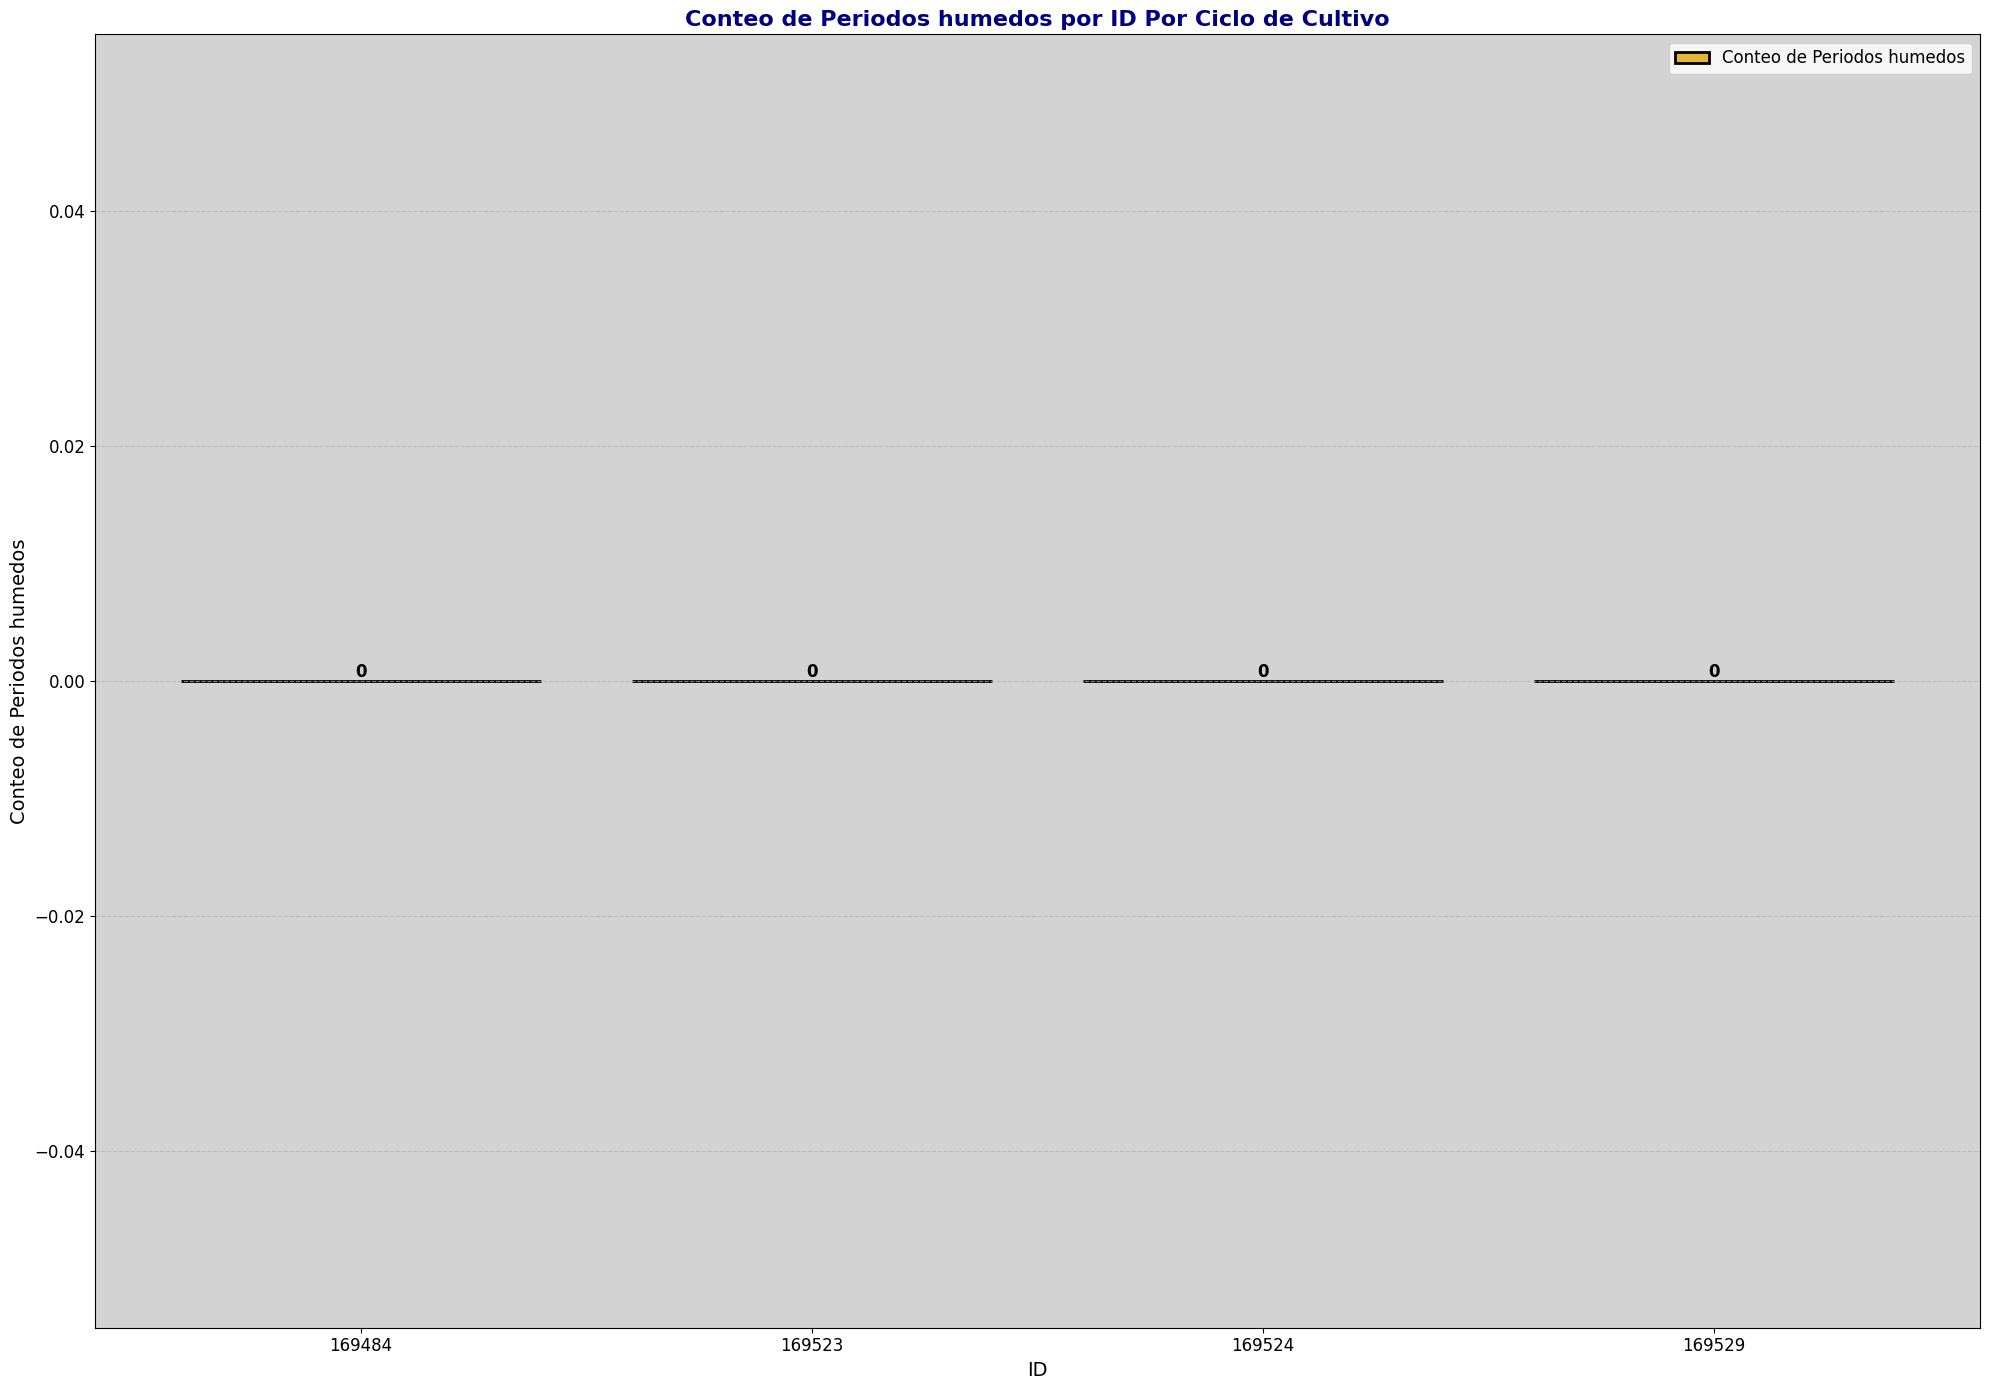

In [22]:
from datetime import timedelta
# Asegurar que 'Date & Time' es de tipo datetime
dia_seco['Date & Time'] = pd.to_datetime(dia_seco['Date & Time'])

# Crear el DataFrame periodo_humedo
periodo_humedo = dia_seco.copy()

def filtrar_por_fecha():
    global periodo_humedo

    # Pedir al usuario que ingrese una fecha de inicio
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Calcular la fecha de fin
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)

    # Filtrar el DataFrame según las fechas seleccionadas
    df_filtrado_mes = periodo_humedo[(periodo_humedo['Date & Time'] >= fecha_inicio) &
                                   (periodo_humedo['Date & Time'] <= fecha_fin)]

    if df_filtrado_mes.empty:
        print("No hay datos disponibles para la fecha seleccionada.")
        return

    # Ordenar el DataFrame por 'ID' y 'Date & Time'
    df_filtrado_mes = df_filtrado_mes.sort_values(by=['ID', 'Date & Time'])

    # Inicializar listas para guardar los resultados
    ids = []
    inicio_rango = []
    fin_rango = []
    duracion = []
    periodos = []

    # Inicializar variables
    dias_con_lluvia = 0
    inicio_con_lluvia = None
    prev_id = None

    # Iterar sobre las filas del DataFrame
    for index, row in df_filtrado_mes.iterrows():
        current_id = row['ID']
        dia_seco = row['dia_seco']
        
        if current_id != prev_id:
            # Guardar el rango de días con lluvia para el ID anterior
            if prev_id is not None:
                ids.append(prev_id)
                inicio_rango.append(inicio_con_lluvia)
                fin_rango.append(prev_fecha)
                duracion.append(dias_con_lluvia)
                periodos.append(1 if dias_con_lluvia > 5 else 0)
            
            # Reiniciar variables al cambiar de ID
            dias_con_lluvia = 0
            inicio_con_lluvia = None
        
        if dia_seco == 0:
            if inicio_con_lluvia is None:
                inicio_con_lluvia = row['Date & Time']
            dias_con_lluvia += 1
            prev_fecha = row['Date & Time']
        else:
            if inicio_con_lluvia is not None:
                # Guardar el rango de días sin lluvia cuando se encuentra un día con lluvia
                ids.append(prev_id)
                inicio_rango.append(inicio_con_lluvia)
                fin_rango.append(prev_fecha)
                duracion.append(dias_con_lluvia)
                periodos.append(1 if dias_con_lluvia > 5 else 0)
                # Reiniciar variables para el nuevo período de días sin lluvia
                dias_con_lluvia = 0
                inicio_con_lluvia = None
        
        prev_id = current_id

    # Agregar el rango de días sin lluvia para el último ID
    if prev_id is not None and inicio_con_lluvia is not None:
        ids.append(prev_id)
        inicio_rango.append(inicio_con_lluvia)
        fin_rango.append(prev_fecha)
        duracion.append(dias_con_lluvia)
        periodos.append(1 if dias_con_lluvia > 5 else 0)

    # Convertir las listas a un DataFrame
    resultado_dias_con_lluvia = pd.DataFrame({
        'ID': ids,
        'Inicio del rango': inicio_rango,
        'Fin del rango': fin_rango,
        'Duración': duracion,
        'Periodo': periodos
    })

    # Convertir el ID a int64
    resultado_dias_con_lluvia['ID'] = resultado_dias_con_lluvia['ID'].astype('int64')

    # Mostrar el DataFrame resultado
    print(resultado_dias_con_lluvia)
    resultado_dias_con_lluvia.to_csv('C:/Users/stzor/Desktop/Junio/ICDF/para_graficaduracionpromedioresultado_dias_con_lluvia_4jul2024.csv', index=False, sep=';')
    # Crear el DataFrame Cantidad_periodos_humedos
    cantidad_periodos_humedos = resultado_dias_con_lluvia.groupby('ID')['Periodo'].sum().reset_index()
    cantidad_periodos_humedos.rename(columns={'Periodo': 'No. de periodos humedos'}, inplace=True)

    # Mostrar el DataFrame Cantidad_periodos_humedos
    print(cantidad_periodos_humedos)

    # Mostrar información adicional de cada ID
    ids_todos = df_filtrado_mes['ID'].unique()

    for id in ids_todos:
        datos_id = df_filtrado_mes[df_filtrado_mes['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    return resultado_dias_con_lluvia, cantidad_periodos_humedos

# Ejecutar la función para filtrar por fecha y obtener los DataFrames resultado
resultado_dias_con_lluvia, cantidad_periodos_humedos = filtrar_por_fecha()

# Ordenar el DataFrame por la columna 'No. de periodos humedos' de mayor a menor
cantidad_periodos_humedos = cantidad_periodos_humedos.sort_values(by='No. de periodos humedos', ascending=False)

# Crear gráfica de barras con el color E2B532 y bordes negros
plt.figure(figsize=(20, 14))
bars = plt.bar(cantidad_periodos_humedos.index, cantidad_periodos_humedos['No. de periodos humedos'], 
               color='#E2B532', edgecolor='black', linewidth=2)

# Añadir título y etiquetas a los ejes
plt.title('Conteo de Periodos humedos por ID Por Ciclo de Cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Conteo de Periodos humedos', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(cantidad_periodos_humedos.index, cantidad_periodos_humedos['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Conteo de Periodos humedos'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/resultado_periodo_humedo_27jun2024.png', format='png', dpi=300)

# Mostrar gráfica
plt.show()


Promedio de duración por estación:
ID
169484    0.833333
169523    0.666667
169524    1.000000
169529    1.000000
Name: Duración, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        4 non-null      int64  
 1   Promedio  4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 196.0 bytes
None


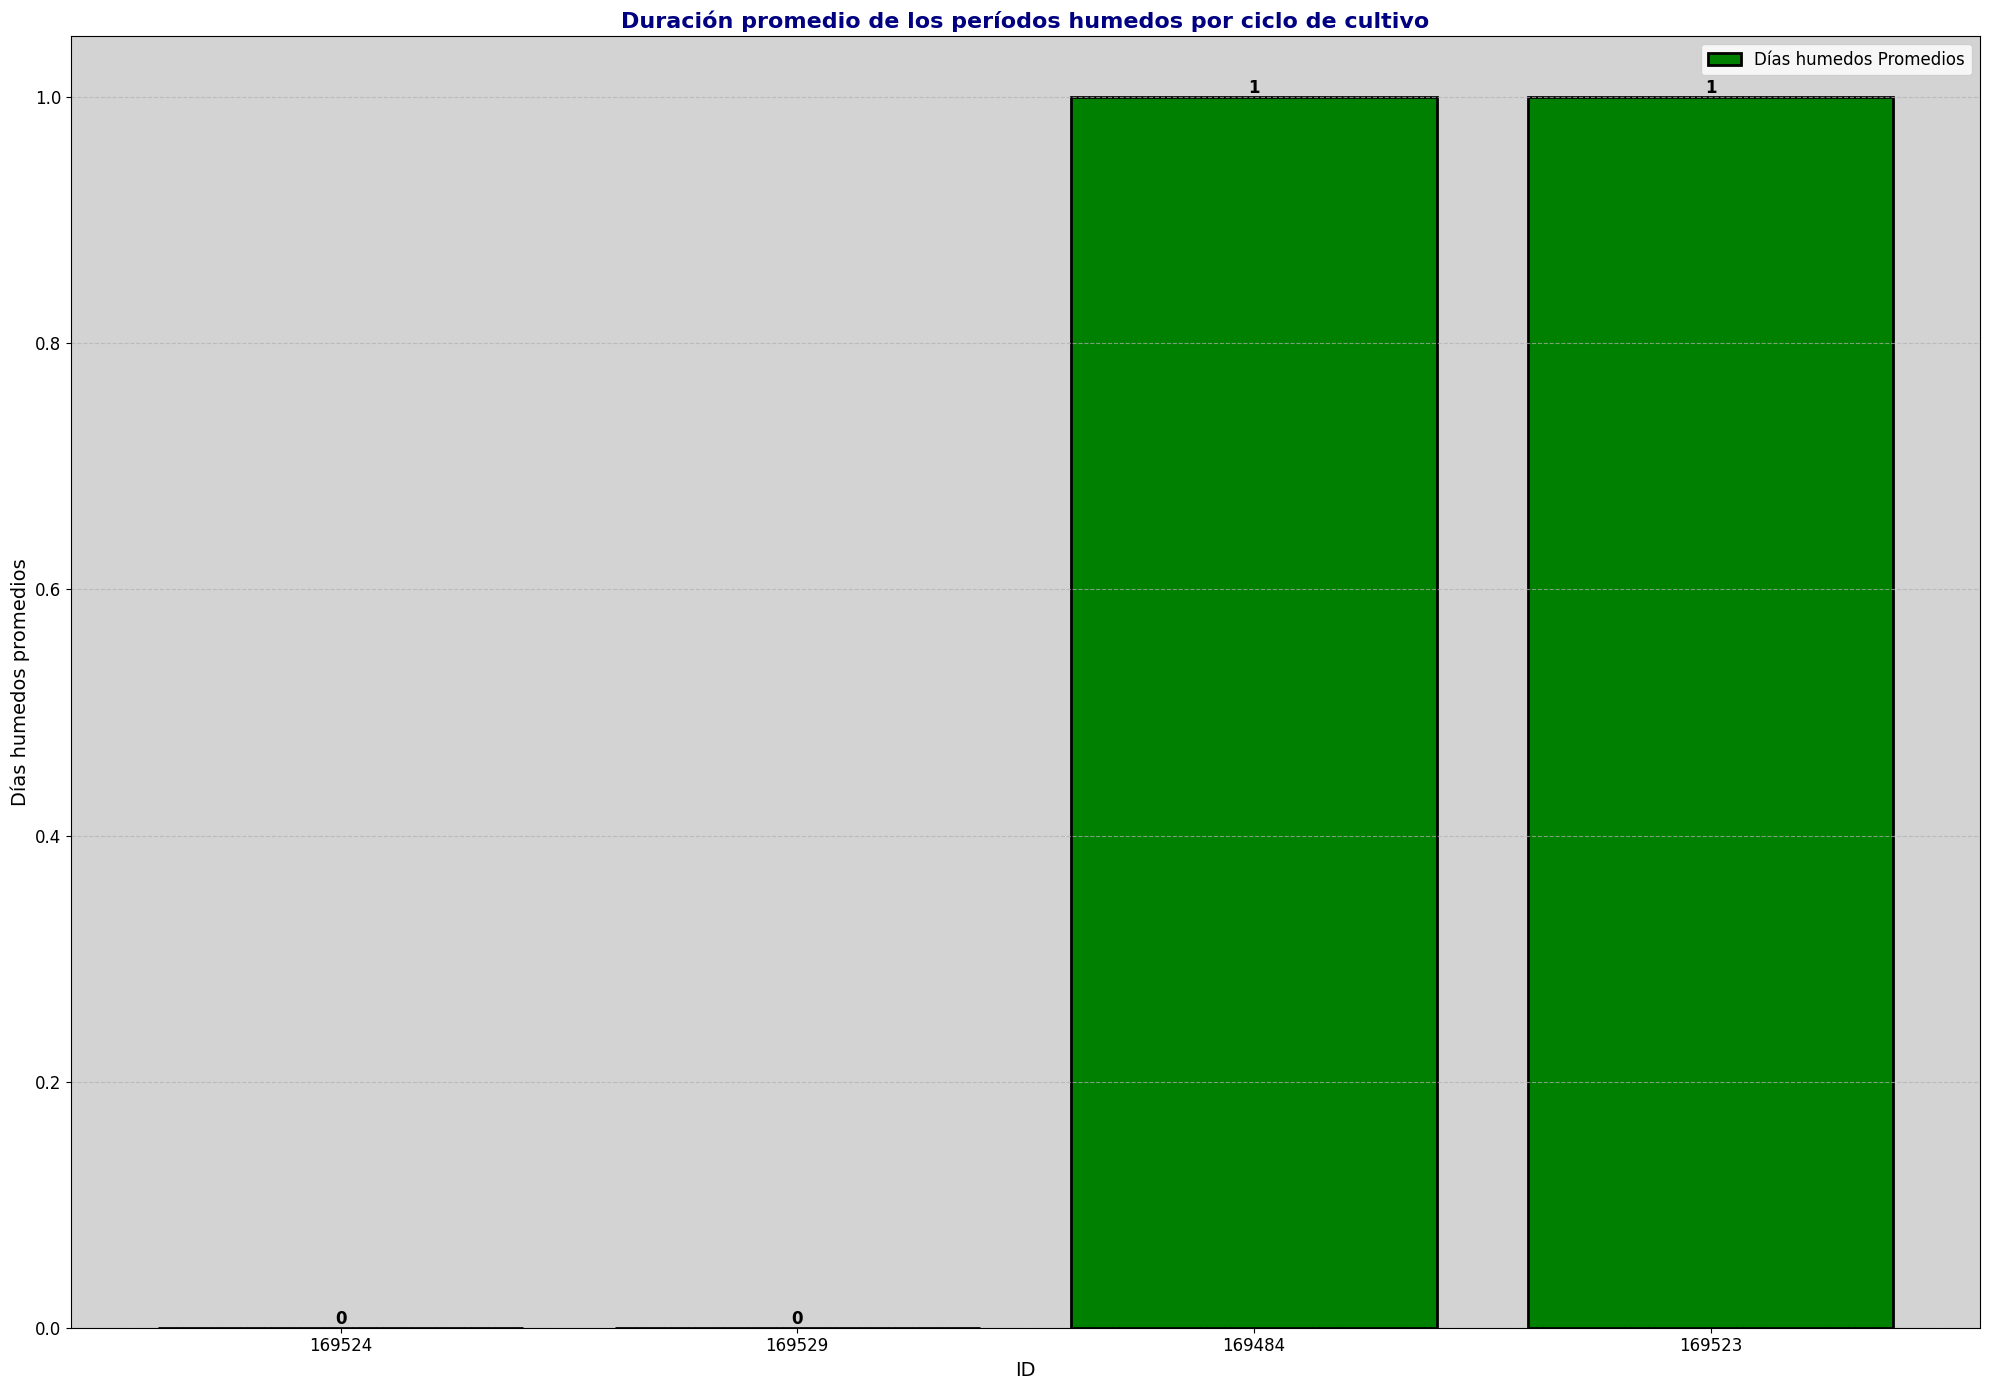

In [24]:
'''corregir si es menor a 5 poner 0'''

'''esta atado al resultado Sin año seleccionado
ESTE SCRIPT ES POR CICLO DE CULTIVO'''
'''la idea de mejora es llamar a traer el csv o la tabla de la DB'''
# Calcular el promedio de duración por estación
promedio_por_estacion = resultado_dias_con_lluvia.groupby('ID')['Duración'].mean()

# Mostrar el resultado
print("Promedio de duración por estación:")
print(promedio_por_estacion)

# Convertir el Series en DataFrame
df_promedio = promedio_por_estacion.reset_index()
df_promedio.columns = ['ID', 'Promedio']

# Mostrar el DataFrame resultante
print(df_promedio.info())

# Convertir la columna 'Promedio' a números enteros
df_promedio['Promedio'] = df_promedio['Promedio'].astype(int)

# Ordenar el DataFrame por la columna Count_dias_secos de mayor a menor
promedio_por_estacion = df_promedio.sort_values(by='Promedio', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_promedio.index, df_promedio['Promedio'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración promedio de los períodos humedos por ciclo de cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días humedos promedios', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(promedio_por_estacion.index, df_promedio['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días humedos Promedios'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_promedio_períodos_secos_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()

script con corrección si Periodo = 0 lo elimnina para hacer el calculo de duración promedio

Promedio de duración por estación:
Series([], Name: Duración, dtype: float64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        0 non-null      int64  
 1   Promedio  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 132.0 bytes
None


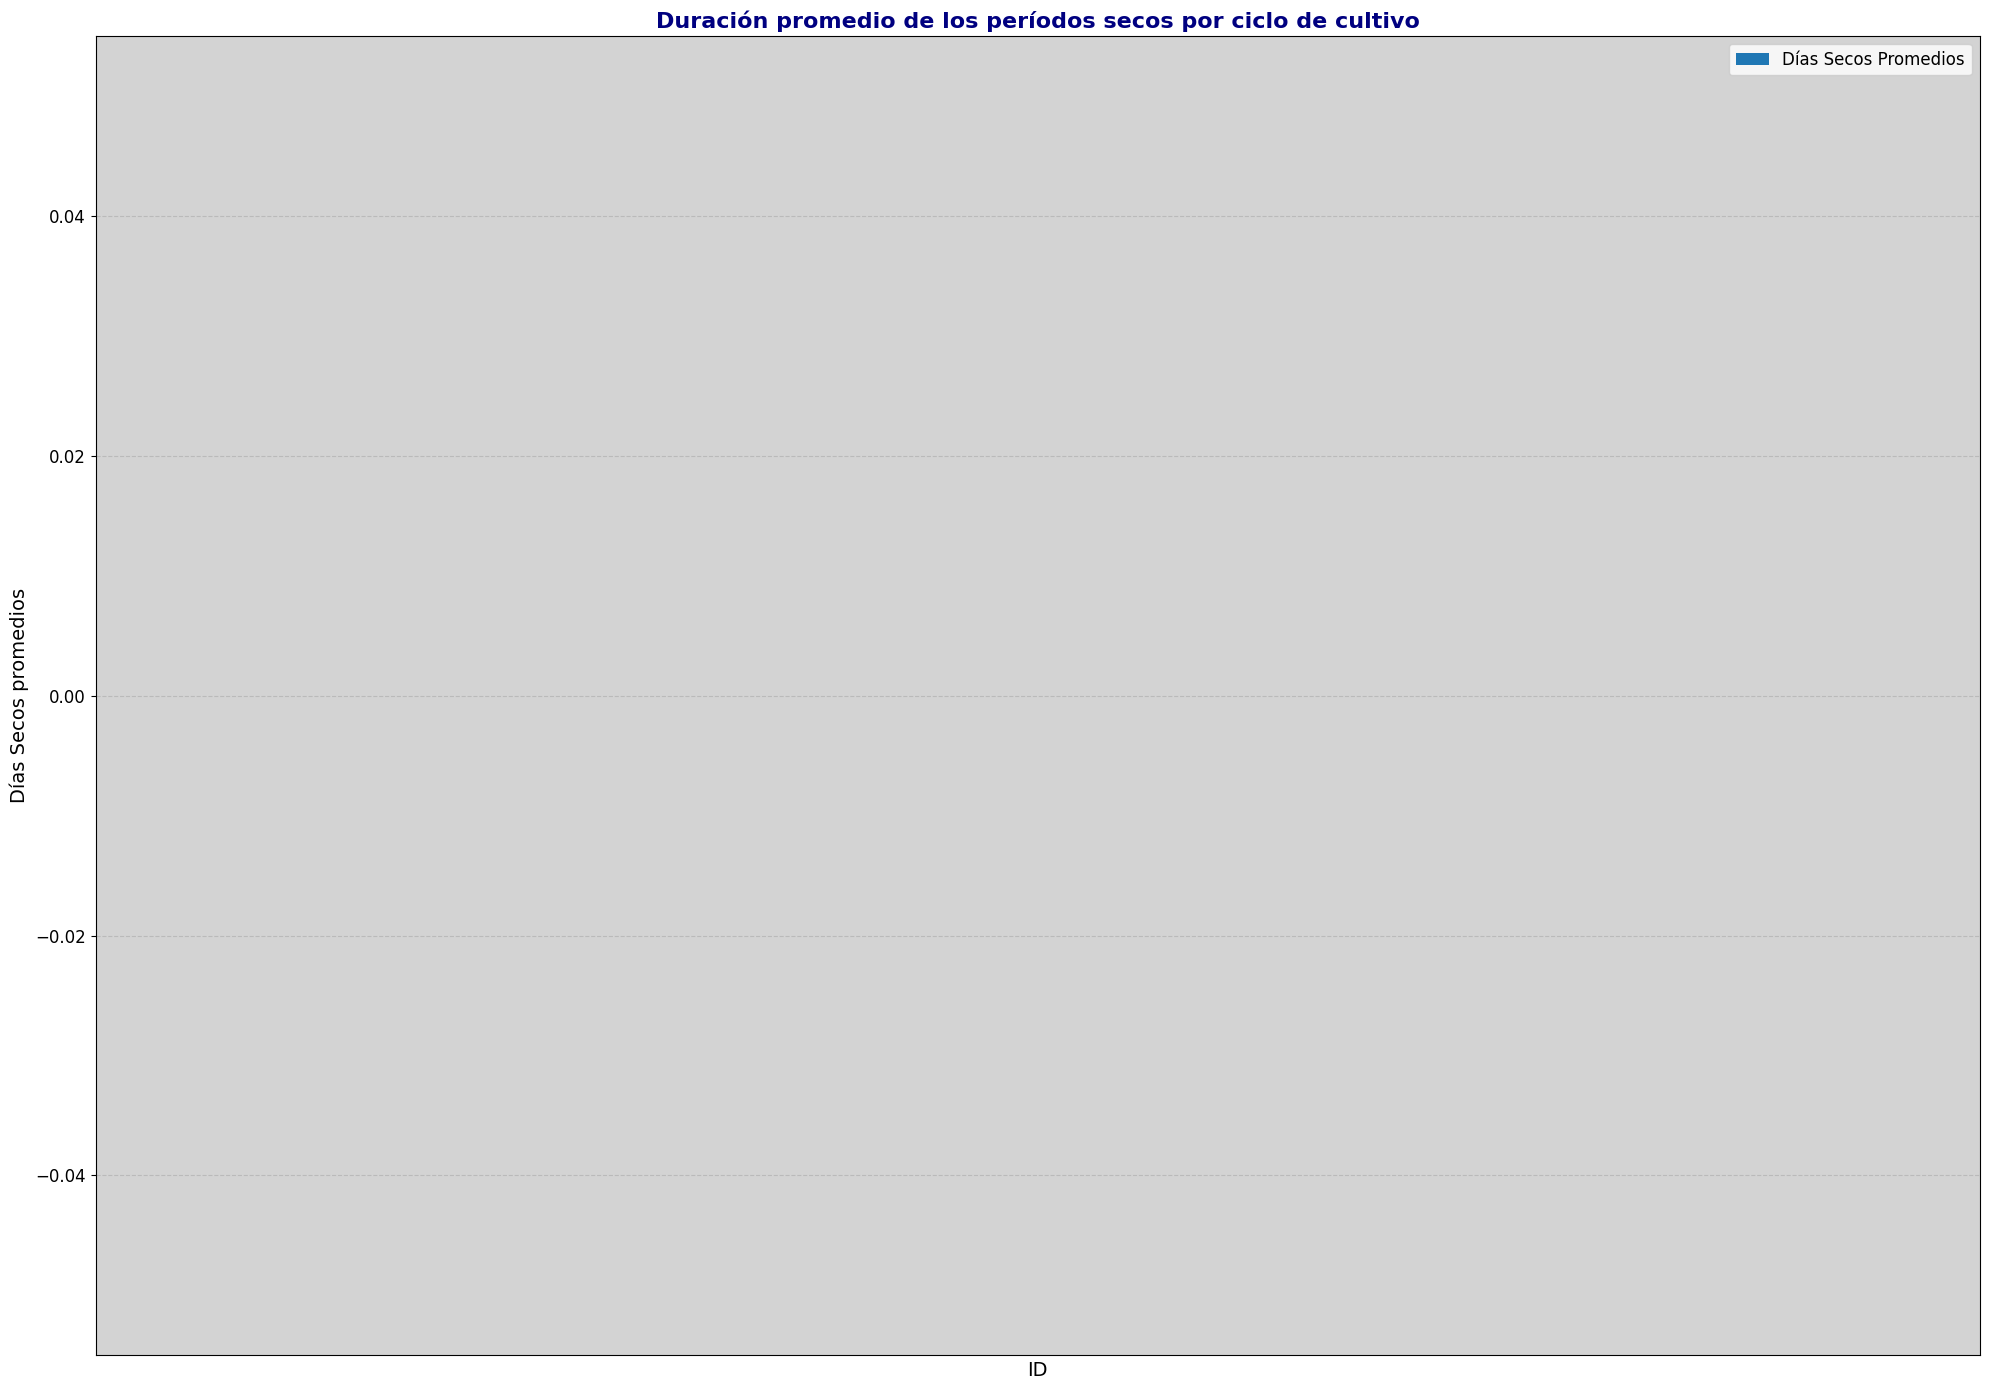

In [26]:
# Filtrar registros con 'Periodo' igual a 0
resultado_dias_con_lluvia = resultado_dias_con_lluvia[resultado_dias_con_lluvia['Periodo'] != 0]

# Calcular el promedio de duración por estación
promedio_por_estacion = resultado_dias_con_lluvia.groupby('ID')['Duración'].mean()

# Mostrar el resultado
print("Promedio de duración por estación:")
print(promedio_por_estacion)

# Convertir el Series en DataFrame
df_promedio = promedio_por_estacion.reset_index()
df_promedio.columns = ['ID', 'Promedio']

# Mostrar el DataFrame resultante
print(df_promedio.info())

# Convertir la columna 'Promedio' a números enteros
df_promedio['Promedio'] = df_promedio['Promedio'].astype(int)

# Ordenar el DataFrame por la columna 'Promedio' de mayor a menor
df_promedio = df_promedio.sort_values(by='Promedio', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_promedio['ID'], df_promedio['Promedio'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración promedio de los períodos humedos por ciclo de cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días humedos promedios', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(df_promedio['ID'], df_promedio['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días humedos Promedios'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG (descomentado si necesario)
# plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_promedio_períodos_secos_2jul2024.png', format='png', dpi=300)

# Mostrar gráfica
plt.show()


**Número de días calurosos**
Total number of hot days during the maize production campaign (Mayo - Septiembrel). This index is described as days with maximum temperatures above 33°C (critical temperatures that affect the growth and development of corn).

Importancia:

Impacto en el Crecimiento del Maíz:

Las temperaturas superiores a 33°C pueden provocar estrés térmico en las plantas de maíz.
Este estrés puede reducir la fotosíntesis, lo que a su vez disminuye el crecimiento de la planta y la producción de granos.
Además, las temperaturas muy altas pueden afectar la polinización y el llenado de granos, resultando en una menor productividad.
Planificación Agrícola:

Conocer el número de días calurosos ayuda a los agricultores y agrónomos a tomar decisiones informadas sobre el manejo de cultivos.
Puede influir en la elección de variedades de maíz más resistentes al calor.
Ayuda a planificar estrategias de riego y manejo del suelo para mitigar el impacto del calor extremo.

In [28]:

df_data_all_stations = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/datos_crudos_all_station_6jun2024.csv', header = 0,delimiter=';', encoding='latin-1')

In [29]:
df_data_stations_day_hot = df_data_all_stations
# Convertir 'Date & Time' a formato datetime manejando diferentes formatos de fecha
df_data_stations_day_hot['Date & Time'] = pd.to_datetime(df_data_stations_day_hot['Date & Time'], errors='coerce', dayfirst=True)

# Filtrar el DataFrame para conservar solo las columnas necesarias
df_temps = df_data_stations_day_hot[['Date & Time', 'ID', 'Temp - Â°C','Temp. Baja - Â°C','Tempalta']].copy()
'''recordar corregir limites y número'''
# Crear la nueva columna 'hot_days'
df_temps['hot_days'] = df_temps['Tempalta'].apply(lambda x: 1 if x >= 30 else 0)

# Mostrar el DataFrame resultado
print(df_temps)

              Date & Time      ID  Temp - Â°C  Temp. Baja - Â°C  Tempalta  \
0     2024-01-01 00:00:00  169484        17.4              17.4      17.7   
1     2024-01-01 00:00:00  169523        18.1              17.8      18.3   
2     2024-01-01 00:00:00  169524        17.8              17.7      17.9   
3     2024-01-01 00:00:00  169529        17.6              17.4      17.8   
4     2024-01-01 01:00:00  169484        17.3              17.0      17.6   
...                   ...     ...         ...               ...       ...   
21429 2023-12-09 22:00:00  169529        21.2              20.9      21.3   
21430 2023-12-09 23:00:00  169484        18.3              17.9      18.9   
21431 2023-12-09 23:00:00  169523        20.5              19.9      20.8   
21432 2023-12-09 23:00:00  169524        16.3              15.9      17.0   
21433 2023-12-09 23:00:00  169529        20.7              20.5      20.9   

       hot_days  
0             0  
1             0  
2             0  
3  

          Date & Time      ID  Temp - Â°C  Temp. Baja - Â°C  Tempalta  \
0 2024-01-01 00:00:00  169484        17.4              17.4      17.7   
1 2024-01-01 00:00:00  169523        18.1              17.8      18.3   
2 2024-01-01 00:00:00  169524        17.8              17.7      17.9   
3 2024-01-01 00:00:00  169529        17.6              17.4      17.8   
4 2024-01-01 01:00:00  169484        17.3              17.0      17.6   

   hot_days  
0         0  
1         0  
2         0  
3         0  
4         0  
Seleccione el número de días:
1. 150 días
2. 120 días
Conteo de días calurosos por año e ID:
   Year      ID  Conteo_dias_calurosos
0  2024  169484                    199
1  2024  169523                    210
2  2024  169524                    228
3  2024  169529                    191
Para el ID 169524: Fecha de inicio: 2024-05-01, Fecha de fin: 2024-05-24, Total registros encontrados: 228
Para el ID 169484: Fecha de inicio: 2024-05-01, Fecha de fin: 2024-05-24, Total re

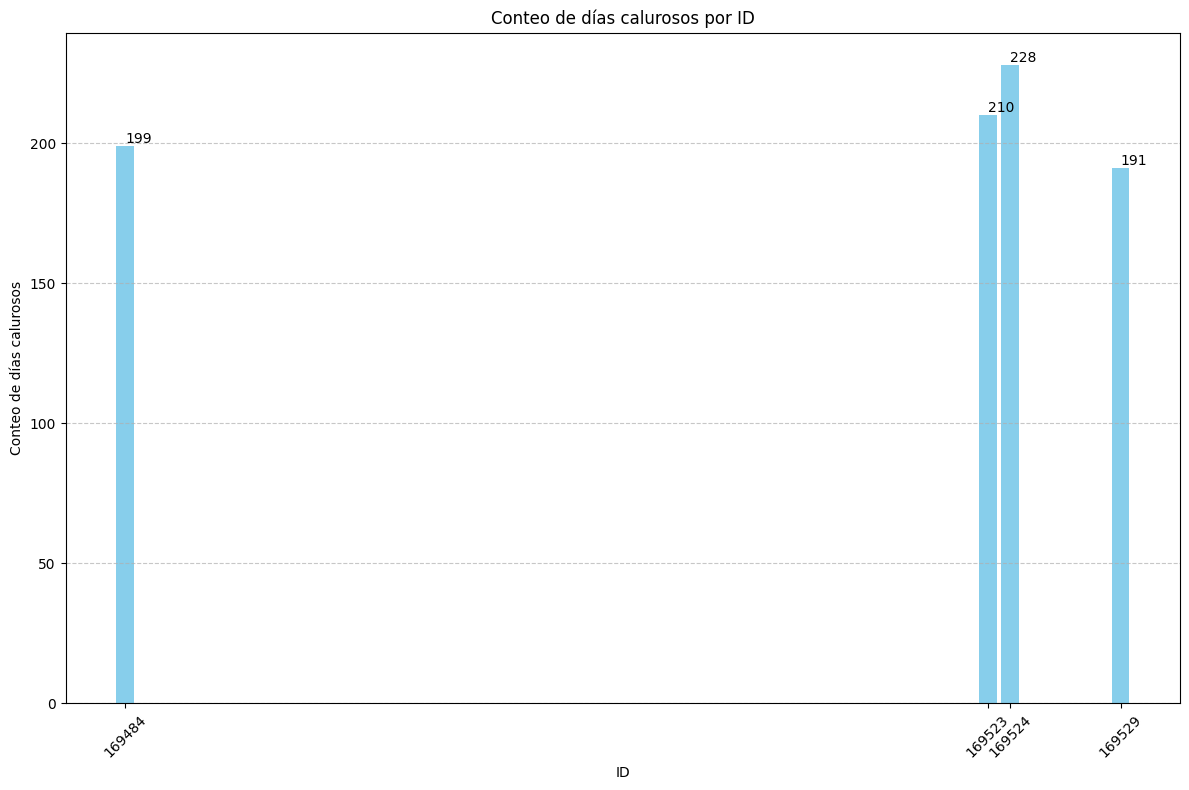

In [32]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Suponiendo que tienes un archivo CSV con tus datos
#ruta_al_archivo = 'ruta_a_tu_archivo.csv'  # Reemplaza esto con la ruta a tu archivo

# Cargar los datos en un DataFrame
#df_temps = pd.read_csv(ruta_al_archivo, parse_dates=['Date & Time'])

# Asegurarse de que los datos están cargados correctamente
print(df_temps.head())

# Definir las funciones de selección de fecha y días
def seleccionar_fecha():
    fecha_inicio = input("Ingrese la fecha de inicio en formato YYYY-MM-DD: ")
    try:
        fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")
    except ValueError:
        print("Formato de fecha no válido. Por favor, use el formato YYYY-MM-DD.")
        return seleccionar_fecha()
    return fecha_inicio

def seleccionar_dias():
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")
    if opcion == '1':
        return 150
    elif opcion == '2':
        return 120
    else:
        print("Opción no válida.")
        return seleccionar_dias()

# Definir la función principal de análisis
def analizar_dias_calurosos(df_temps):
    # Crear el nuevo DataFrame filtrando los días calurosos
    dias_calurosos = df_temps[df_temps['hot_days'] == 1]

    # Filtrar el DataFrame para incluir solo los meses de mayo a septiembre
    df_dias_calurosos_filtrado = dias_calurosos.copy()

    # Solicitar la fecha de inicio y el número de días al usuario
    fecha_inicio = seleccionar_fecha()
    num_dias = seleccionar_dias()

    # Filtrar los datos en base a la fecha de inicio y el número de días seleccionados
    fecha_fin = fecha_inicio + pd.DateOffset(days=num_dias)
    df_dias_calurosos_filtrado = df_dias_calurosos_filtrado[(df_dias_calurosos_filtrado['Date & Time'] >= fecha_inicio) & (df_dias_calurosos_filtrado['Date & Time'] < fecha_fin)]

    # Crear una columna de año
    df_dias_calurosos_filtrado['Year'] = df_dias_calurosos_filtrado['Date & Time'].dt.year

    # Agrupar por año e ID (suponiendo que existe una columna 'ID') y contar los días calurosos
    conteo_dias_calurosos = df_dias_calurosos_filtrado.groupby(['Year', 'ID']).size().reset_index(name='Conteo_dias_calurosos')

    # Mostrar el DataFrame resultado
    print("Conteo de días calurosos por año e ID:")
    print(conteo_dias_calurosos)

    # Mostrar información adicional de cada ID
    ids_todos = df_dias_calurosos_filtrado['ID'].unique()

    for id in ids_todos:
        datos_id = df_dias_calurosos_filtrado[df_dias_calurosos_filtrado['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            fecha_inicio_estacion = datos_id['Date & Time'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date & Time'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    # Guardar el DataFrame filtrado en un archivo CSV
    #df_dias_calurosos_filtrado.to_csv('df_dias_calurosos_filtrado.csv', index=False, sep=';')

    # Generar gráfico de barras mejorado
    plt.figure(figsize=(12, 8))
    bars = plt.bar(conteo_dias_calurosos['ID'], conteo_dias_calurosos['Conteo_dias_calurosos'], color='skyblue')

    # Etiquetas en las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', fontsize=10)

    plt.xlabel('ID')
    plt.ylabel('Conteo de días calurosos')
    plt.title('Conteo de días calurosos por ID')
    plt.xticks(conteo_dias_calurosos['ID'], fontsize=10, rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ejecutar la función de análisis
analizar_dias_calurosos(df_temps)


estamos usando los valores de hora

In [6]:
df_data_stations_day_hot.head()

,Date & Time,ID,Alta velocidad del viento - km/h,BarÃ³metro - mb,Bulbo HÃºmedo - Â°C,DÃ­as-grado de calentamiento,DÃ­as-grado de enfriamiento,ET - mm,EnergÃ­a solar - Ly,Hum - %,...,THSW Ã­ndice - Â°C,THW Index - Â°C,Tasa de lluvia - mm/h,Temp - Â°C,Temp. Baja - Â°C,Tempalta,Velocidad del viento - km/h,Viento Corriente - km,Viento FrÃ­o - Â°C,Ãndice de calor - Â°C
0,1/01/2024 00:00,169484,4.8,1025.0,14.9,0.037,0.0,0.00,0.0,77.0,...,16.7,17.5,0.0,17.4,17.4,17.7,1.6,1.61,17.4,17.5
1,1/01/2024 00:00,169523,3.2,972.9,16.2,0.012,0.0,0.00,0.0,84.0,...,17.2,18.4,0.0,18.1,17.8,18.3,0.0,0.00,18.1,18.4
2,1/01/2024 00:00,169524,3.2,1023.6,15.0,0.021,0.0,0.00,0.0,75.0,...,16.7,17.8,0.0,17.8,17.7,17.9,0.0,0.00,17.8,17.8
3,1/01/2024 00:00,169529,8.0,946.3,14.4,0.030,0.0,0.03,0.0,73.0,...,16.7,17.5,0.0,17.6,17.4,17.8,3.2,3.22,17.6,17.5
4,1/01/2024 01:00,169484,4.8,1024.6,15.1,0.044,0.0,0.00,0.0,80.0,...,16.1,17.4,0.0,17.3,17.0,17.6,1.6,1.61,17.3,17.4


ya saca el average por día

In [1]:
import pandas as pd
from datetime import datetime

# Cargar los datos en un DataFrame
df_data_stations_day_hot = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/datos_crudos_all_station_6jun2024.csv', header=0, delimiter=';', encoding='latin-1')

# Filtrar el DataFrame para conservar solo las columnas necesarias
df_temps = df_data_stations_day_hot[['Date & Time', 'ID','Tempalta']].copy()

# Convertir 'Date & Time' a formato datetime
df_temps['Date & Time'] = pd.to_datetime(df_temps['Date & Time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'Date' para agrupar por día
df_temps['Date'] = df_temps['Date & Time'].dt.date

# Calcular el promedio de 'Tempalta' por día y ID
df_daily_avg = df_temps.groupby(['Date', 'ID'])['Tempalta'].mean().reset_index()

# Crear la nueva columna 'hot_days'
df_daily_avg['hot_days'] = df_daily_avg['Tempalta'].apply(lambda x: 1 if x >= 20 else 0)

# Mostrar el DataFrame resultado
print(df_daily_avg)
df_temps2 = df_daily_avg

           Date      ID   Tempalta  hot_days
0    2023-11-14  169484  23.108333         1
1    2023-11-14  169523  24.225000         1
2    2023-11-14  169524        NaN         0
3    2023-11-14  169529        NaN         0
4    2023-11-15  169484  22.008333         1
..          ...     ...        ...       ...
895  2024-05-25  169529  26.300000         1
896  2024-05-25  178223  19.733333         0
897  2024-05-26  178223  20.873333         1
898  2024-05-27  178223  16.600000         0
899  2024-05-28  178223  21.200000         1

[900 rows x 4 columns]


In [2]:
# Convertir la columna 'Date' a formato datetime
df_temps2['Date'] = pd.to_datetime(df_temps2['Date'], format='%d/%m/%Y')

In [3]:
print(df_temps2.info())
#df_temps2.to_csv('C:/Users/stzor/Desktop/Junio/ICDF/df_temps2_5jul2024.csv', index=False, sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      900 non-null    datetime64[ns]
 1   ID        900 non-null    int64         
 2   Tempalta  875 non-null    float64       
 3   hot_days  900 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 28.3 KB
None


        Date      ID   Tempalta  hot_days
0 2023-11-14  169484  23.108333         1
1 2023-11-14  169523  24.225000         1
2 2023-11-14  169524        NaN         0
3 2023-11-14  169529        NaN         0
4 2023-11-15  169484  22.008333         1
Seleccione el número de días:
1. 150 días
2. 120 días
Conteo de días calurosos por año e ID:
   Year      ID  Conteo_dias_calurosos
0  2024  169484                     51
1  2024  169523                     51
2  2024  169524                     51
3  2024  169529                     51
4  2024  178223                     31
Para el ID 169484: Fecha de inicio: 2024-04-05, Fecha de fin: 2024-05-25, Total registros encontrados: 51
Para el ID 169523: Fecha de inicio: 2024-04-05, Fecha de fin: 2024-05-25, Total registros encontrados: 51
Para el ID 169524: Fecha de inicio: 2024-04-05, Fecha de fin: 2024-05-25, Total registros encontrados: 51
Para el ID 169529: Fecha de inicio: 2024-04-05, Fecha de fin: 2024-05-25, Total registros encontrados: 

C:\Users\stzor\AppData\Local\Temp\ipykernel_17420\1337138184.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dias_calurosos_filtrados['Year'] = dias_calurosos_filtrados['Date'].dt.year


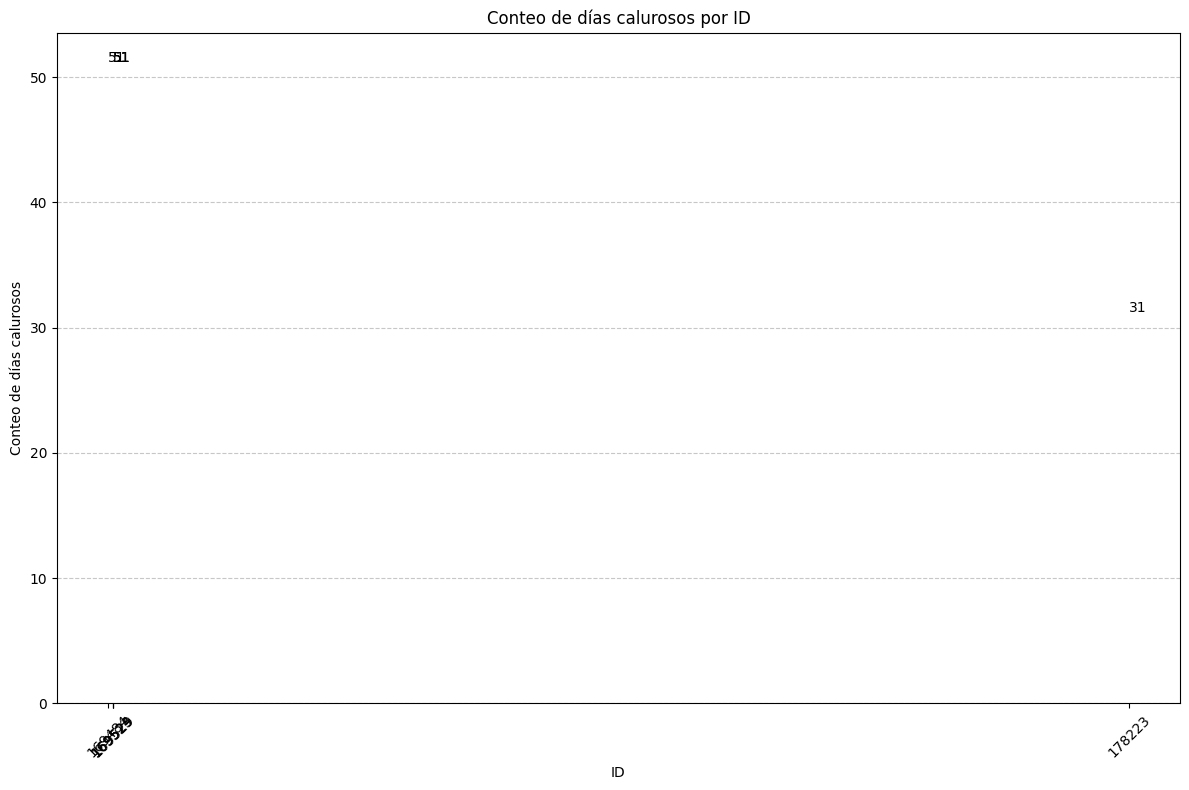

In [33]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Suponiendo que tienes un archivo CSV con tus datos
# ruta_al_archivo = 'ruta_a_tu_archivo.csv'  # Reemplaza esto con la ruta a tu archivo

# Cargar los datos en un DataFrame
# df_temps = pd.read_csv(ruta_al_archivo, parse_dates=['Date & Time'])

# Asegurarse de que los datos están cargados correctamente
print(df_temps2.head())

# Definir las funciones de selección de fecha y días
def seleccionar_fecha():
    while True:
        fecha_inicio = input("Ingrese la fecha de inicio en formato YYYY-MM-DD: ")
        try:
            fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")
            return fecha_inicio
        except ValueError:
            print("Formato de fecha no válido. Por favor, use el formato YYYY-MM-DD.")

def seleccionar_dias():
    while True:
        print("Seleccione el número de días:")
        print("1. 150 días")
        print("2. 120 días")
        opcion = input("Ingrese el número de la opción (1 o 2): ")
        if opcion == '1':
            return 150
        elif opcion == '2':
            return 120
        else:
            print("Opción no válida.")

# Definir la función principal de análisis
def analizar_dias_calurosos(df_temps2):
    # Crear el nuevo DataFrame filtrando los días calurosos
    dias_calurosos = df_temps2[df_temps2['hot_days'] == 1]

    # Solicitar la fecha de inicio y el número de días al usuario
    fecha_inicio = seleccionar_fecha()
    num_dias = seleccionar_dias()

    # Filtrar los datos en base a la fecha de inicio y el número de días seleccionados
    fecha_fin = fecha_inicio + pd.DateOffset(days=num_dias)
    dias_calurosos_filtrados = dias_calurosos[(dias_calurosos['Date'] >= fecha_inicio) & (dias_calurosos['Date'] < fecha_fin)]

    # Crear una columna de año
    dias_calurosos_filtrados['Year'] = dias_calurosos_filtrados['Date'].dt.year

    # Agrupar por año e ID (suponiendo que existe una columna 'ID') y contar los días calurosos
    conteo_dias_calurosos = dias_calurosos_filtrados.groupby(['Year', 'ID']).size().reset_index(name='Conteo_dias_calurosos')

    # Mostrar el DataFrame resultado
    print("Conteo de días calurosos por año e ID:")
    print(conteo_dias_calurosos)

    # Mostrar información adicional de cada ID
    ids_todos = dias_calurosos_filtrados['ID'].unique()

    for id in ids_todos:
        datos_id = dias_calurosos_filtrados[dias_calurosos_filtrados['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            fecha_inicio_estacion = datos_id['Date'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    # Guardar el DataFrame filtrado en un archivo CSV
    #dias_calurosos_filtrados.to_csv('df_dias_calurosos_filtrado.csv', index=False, sep=';')

    # Generar gráfico de barras mejorado
    plt.figure(figsize=(12, 8))
    bars = plt.bar(conteo_dias_calurosos['ID'], conteo_dias_calurosos['Conteo_dias_calurosos'], color='skyblue')

    # Etiquetas en las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', fontsize=10)

    plt.xlabel('ID')
    plt.ylabel('Conteo de días calurosos')
    plt.title('Conteo de días calurosos por ID')
    plt.xticks(conteo_dias_calurosos['ID'], fontsize=10, rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ejecutar la función de análisis
analizar_dias_calurosos(df_temps2)




In [43]:
conteo_dias_calurosos.info()
#conteo_dias_calurosos = conteo_dias_calurosos.drop(columns=['Year'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Year                   5 non-null      int32
 1   ID                     5 non-null      int64
 2   Conteo_dias_calurosos  5 non-null      int64
dtypes: int32(1), int64(2)
memory usage: 232.0 bytes


        Date      ID   Tempalta  hot_days
0 2023-11-14  169484  23.108333         1
1 2023-11-14  169523  24.225000         1
2 2023-11-14  169524        NaN         0
3 2023-11-14  169529        NaN         0
4 2023-11-15  169484  22.008333         1
Seleccione el número de días:
1. 150 días
2. 120 días


C:\Users\stzor\AppData\Local\Temp\ipykernel_17420\3375970680.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dias_calurosos_filtrados['Year'] = dias_calurosos_filtrados['Date'].dt.year


Conteo de días calurosos por año e ID:
   Year      ID  Conteo_dias_calurosos
0  2024  169484                    107
1  2024  169523                    111
2  2024  169524                    110
3  2024  169529                    108
4  2024  178223                     38
Para el ID 169524: Fecha de inicio: 2024-02-01, Fecha de fin: 2024-05-25, Total registros encontrados: 110
Para el ID 169484: Fecha de inicio: 2024-02-02, Fecha de fin: 2024-05-25, Total registros encontrados: 107
Para el ID 169523: Fecha de inicio: 2024-02-02, Fecha de fin: 2024-05-25, Total registros encontrados: 111
Para el ID 169529: Fecha de inicio: 2024-02-02, Fecha de fin: 2024-05-25, Total registros encontrados: 108
Para el ID 178223: Fecha de inicio: 2024-03-16, Fecha de fin: 2024-05-28, Total registros encontrados: 38


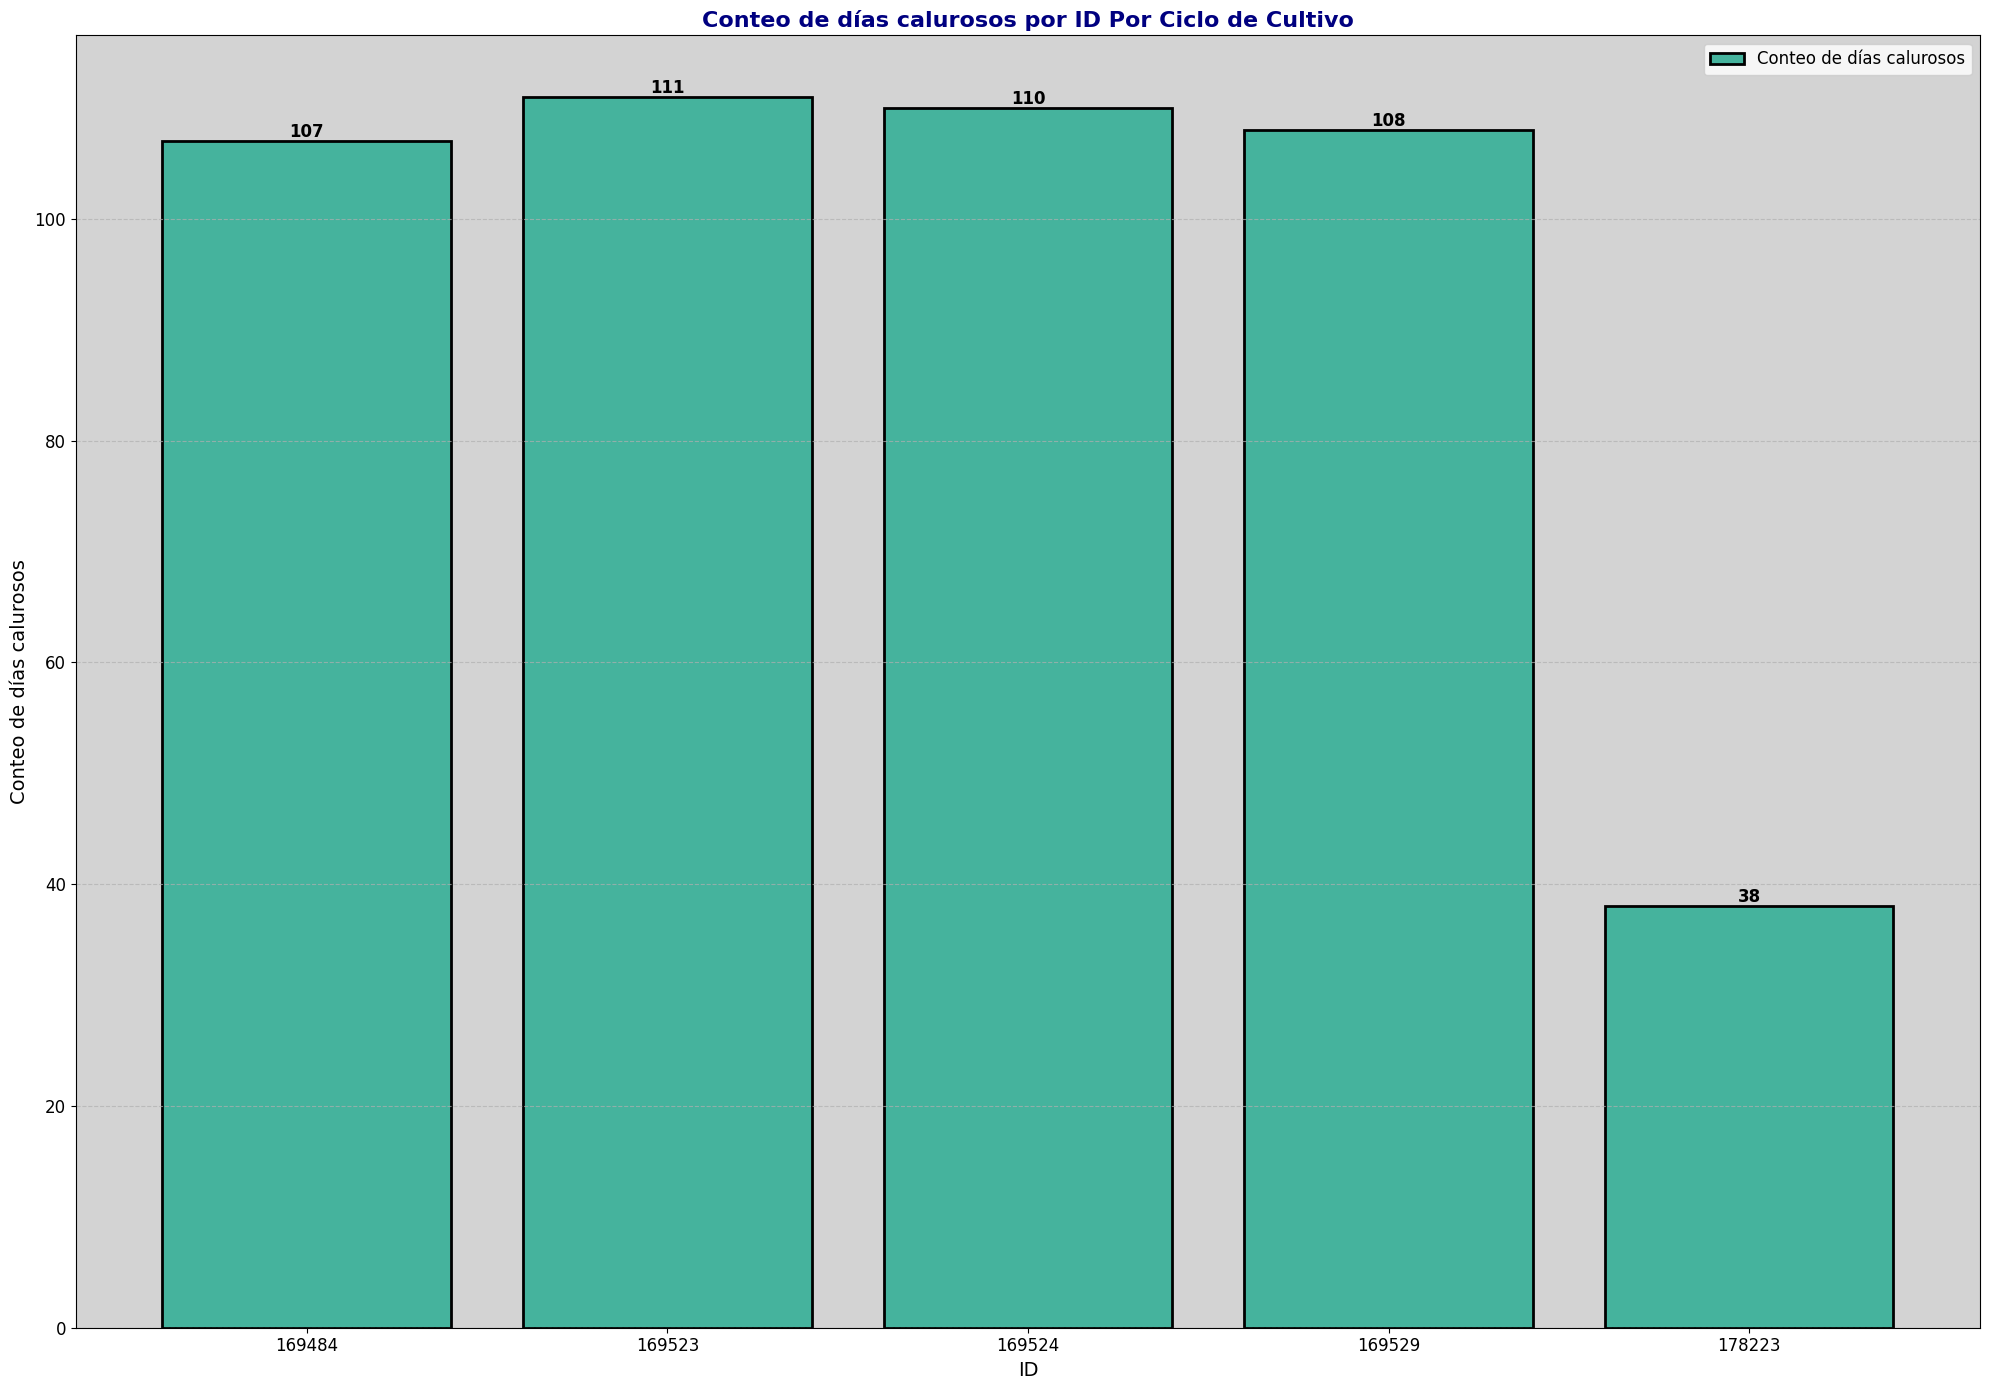

In [45]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Suponiendo que tienes un archivo CSV con tus datos
# ruta_al_archivo = 'ruta_a_tu_archivo.csv'  # Reemplaza esto con la ruta a tu archivo

# Cargar los datos en un DataFrame
# df_temps = pd.read_csv(ruta_al_archivo, parse_dates=['Date & Time'])

# Asegurarse de que los datos están cargados correctamente
print(df_temps2.head())

# Definir las funciones de selección de fecha y días
def seleccionar_fecha():
    while True:
        fecha_inicio = input("Ingrese la fecha de inicio en formato YYYY-MM-DD: ")
        try:
            fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")
            return fecha_inicio
        except ValueError:
            print("Formato de fecha no válido. Por favor, use el formato YYYY-MM-DD.")

def seleccionar_dias():
    while True:
        print("Seleccione el número de días:")
        print("1. 150 días")
        print("2. 120 días")
        opcion = input("Ingrese el número de la opción (1 o 2): ")
        if opcion == '1':
            return 150
        elif opcion == '2':
            return 120
        else:
            print("Opción no válida.")

# Definir la función principal de análisis
def analizar_dias_calurosos(df_temps2):
    # Crear el nuevo DataFrame filtrando los días calurosos
    dias_calurosos = df_temps2[df_temps2['hot_days'] == 1]

    # Solicitar la fecha de inicio y el número de días al usuario
    fecha_inicio = seleccionar_fecha()
    num_dias = seleccionar_dias()

    # Filtrar los datos en base a la fecha de inicio y el número de días seleccionados
    fecha_fin = fecha_inicio + pd.DateOffset(days=num_dias)
    dias_calurosos_filtrados = dias_calurosos[(dias_calurosos['Date'] >= fecha_inicio) & (dias_calurosos['Date'] < fecha_fin)]

    # Crear una columna de año
    dias_calurosos_filtrados['Year'] = dias_calurosos_filtrados['Date'].dt.year

    # Agrupar por año e ID (suponiendo que existe una columna 'ID') y contar los días calurosos
    conteo_dias_calurosos = dias_calurosos_filtrados.groupby(['Year', 'ID']).size().reset_index(name='Conteo_dias_calurosos')

    # Mostrar el DataFrame resultado
    print("Conteo de días calurosos por año e ID:")
    print(conteo_dias_calurosos)

    # Mostrar información adicional de cada ID
    ids_todos = dias_calurosos_filtrados['ID'].unique()

    for id in ids_todos:
        datos_id = dias_calurosos_filtrados[dias_calurosos_filtrados['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            fecha_inicio_estacion = datos_id['Date'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    # Guardar el DataFrame filtrado en un archivo CSV
    #dias_calurosos_filtrados.to_csv('df_dias_calurosos_filtrado.csv', index=False, sep=';')

    # Ordenar el DataFrame por la columna Count_dias_humedos de mayor a menor
    conteo_dias_calurosos = conteo_dias_calurosos.sort_values(by='Conteo_dias_calurosos', ascending=False)

    # Crear gráfica de barras con un estilo más atractivo
    plt.figure(figsize=(20, 14))
    bars = plt.bar(conteo_dias_calurosos.index, conteo_dias_calurosos['Conteo_dias_calurosos'], color='#45B39D', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

    # Añadir título y etiquetas a los ejes
    plt.title('Conteo de días calurosos por ID Por Ciclo de Cultivo', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('ID', fontsize=14)
    plt.ylabel('Conteo de días calurosos', fontsize=14)

    # Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
                 ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

    # Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
    plt.xticks(conteo_dias_calurosos.index, conteo_dias_calurosos['ID'], fontsize=12)  # Rotar etiquetas si son muchas y se solapan
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

    # Personalizar el fondo y la cuadrícula de la gráfica
    plt.gca().set_facecolor('lightgrey')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir una leyenda y personalizarla
    plt.legend(['Conteo de días calurosos'], loc='upper right', fontsize=12)

    # Mostrar gráfica
    plt.show()

# Ejecutar la función de análisis
analizar_dias_calurosos(df_temps2)

#Días Calurosos Por Mes Por Estación

In [7]:
# Cargar los datos en un DataFrame
dia_caluroso = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/df_temps2_5jul2024.csv', header=0, delimiter=';', encoding='latin-1')

In [8]:
dia_caluroso.info()
dia_caluroso.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      900 non-null    object 
 1   ID        900 non-null    int64  
 2   Tempalta  875 non-null    float64
 3   hot_days  900 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.3+ KB


,Date,ID,Tempalta,hot_days
0,2023-11-14,169484,23.108333,1
1,2023-11-14,169523,24.225000,1
2,2023-11-14,169524,NaN,0
3,2023-11-14,169529,NaN,0
4,2023-11-15,169484,22.008333,1


**lleva doble verificación con año**

Seleccione el año:
1. 2023
2. 2024
Seleccione el mes:
1. Enero
2. Febrero
3. Marzo
4. Abril
5. Mayo
6. Junio
7. Julio
8. Agosto
9. Septiembre
10. Octubre
11. Noviembre
12. Diciembre
   Year  Mes      ID  Count_dia_caluroso_por_mes
0  2024    3  169484                          31
1  2024    3  169523                          31
2  2024    3  169524                          31
3  2024    3  169529                          31
4  2024    3  178223                           6


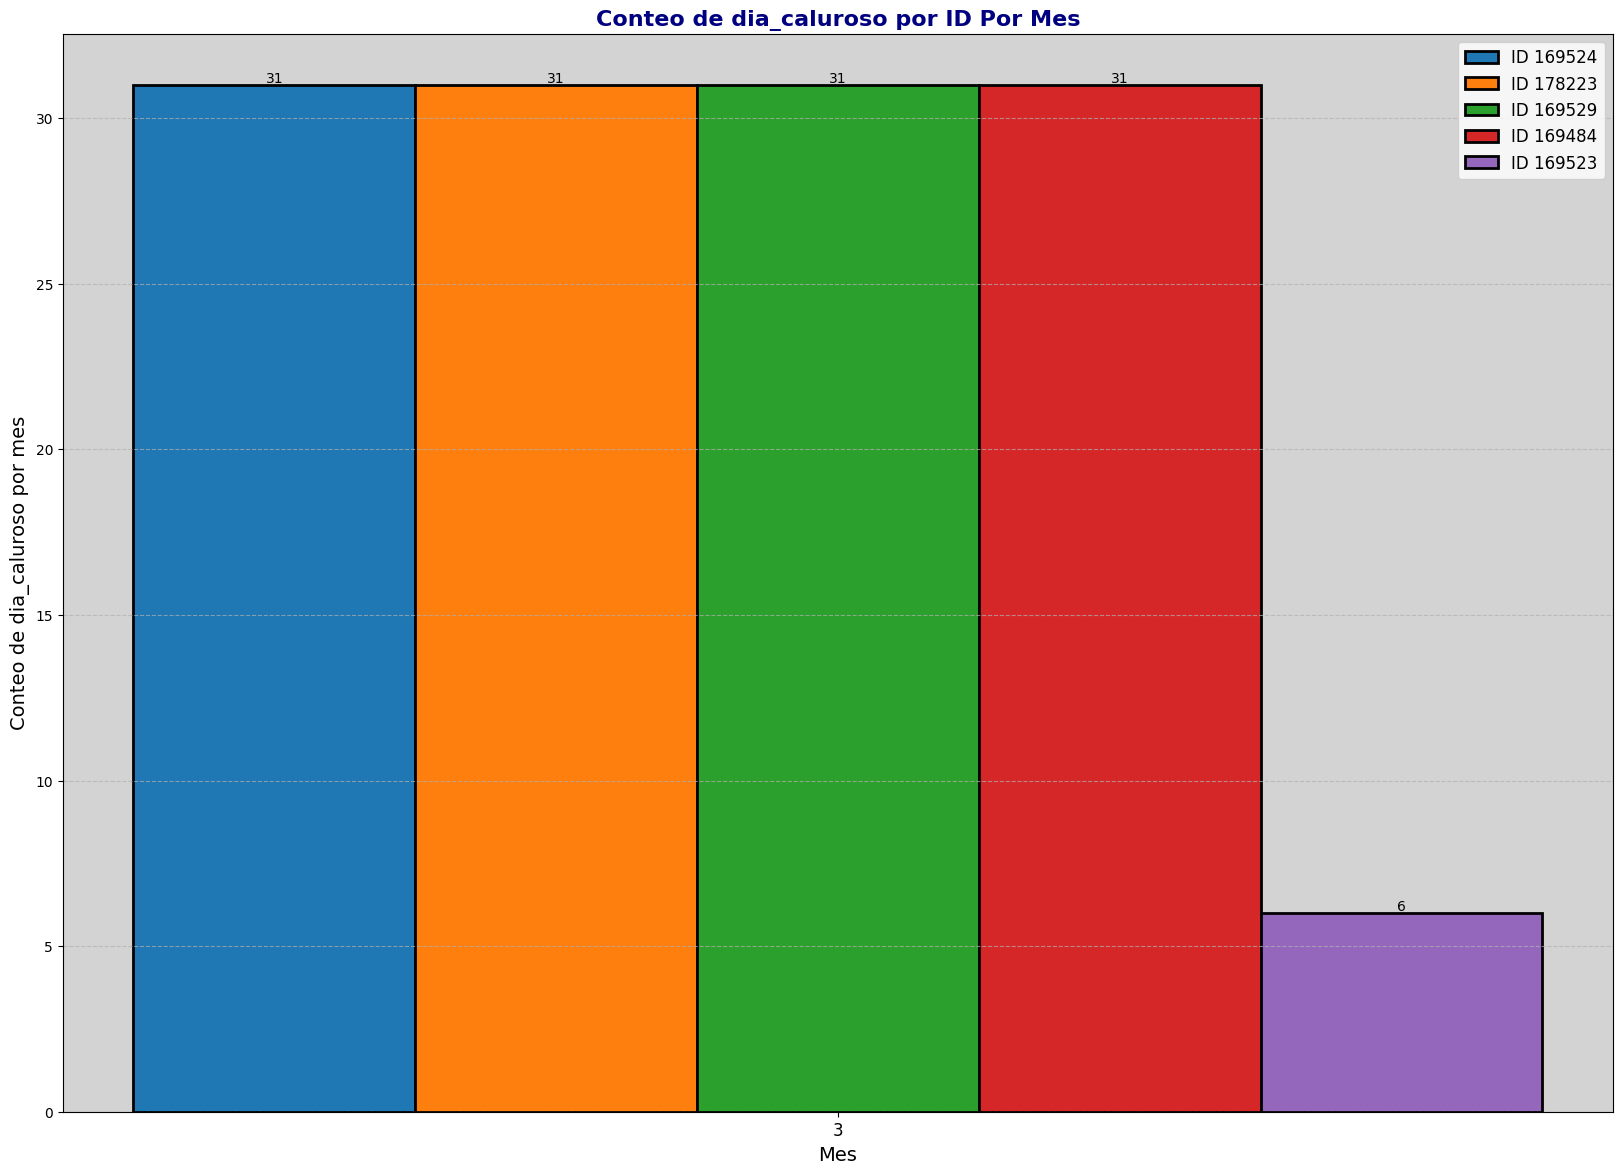

In [14]:
# Asegurarse de que 'Date' es de tipo datetime
dia_caluroso['Date'] = pd.to_datetime(dia_caluroso['Date'])

# Crear columnas de año y mes
dia_caluroso['Year'] = dia_caluroso['Date'].dt.year
dia_caluroso['Mes'] = dia_caluroso['Date'].dt.month

def filtrar_por_mes():
    global conteo_dia_caluroso_por_mes_filtrado

    # Mostrar opciones al usuario para seleccionar el año
    years = dia_caluroso['Year'].unique()
    print("Seleccione el año:")
    for i, year in enumerate(years):
        print(f"{i + 1}. {year}")
    opcion_year = input("Ingrese el número del año: ")

    try:
        year = years[int(opcion_year) - 1]
    except (IndexError, ValueError):
        print("Año no válido.")
        return

    # Mostrar opciones al usuario para seleccionar el mes
    print("Seleccione el mes:")
    print("1. Enero")
    print("2. Febrero")
    print("3. Marzo")
    print("4. Abril")
    print("5. Mayo")
    print("6. Junio")
    print("7. Julio")
    print("8. Agosto")
    print("9. Septiembre")
    print("10. Octubre")
    print("11. Noviembre")
    print("12. Diciembre")
    opcion_mes = input("Ingrese el número del mes (1-12): ")

    try:
        mes = int(opcion_mes)
        if mes < 1 or mes > 12:
            raise ValueError
    except ValueError:
        print("Mes no válido. Por favor, ingrese un número entre 1 y 12.")
        return

    # Filtrar el DataFrame para el año y mes seleccionados
    dia_caluroso_filtrado = dia_caluroso[(dia_caluroso['Year'] == year) & (dia_caluroso['Mes'] == mes)]

    # Verificar si hay datos para el mes seleccionado
    if dia_caluroso_filtrado.empty:
        print("No hay datos disponibles para el mes seleccionado.")
        return

    # Agrupar por año, mes e ID y contar los días secos
    conteo_dia_caluroso_por_mes_filtrado = dia_caluroso_filtrado[dia_caluroso_filtrado['hot_days'] == 1].groupby(['Year', 'Mes', 'ID']).size().reset_index(name='Count_dia_caluroso_por_mes')

    # Mostrar el resultado
    print(conteo_dia_caluroso_por_mes_filtrado)

    # Generar la gráfica
    generar_grafica()

def generar_grafica():
    # Obtener una lista única de meses e IDs
    meses = conteo_dia_caluroso_por_mes_filtrado['Mes'].unique()
    IDs = conteo_dia_caluroso_por_mes_filtrado['ID'].unique()
    num_meses = len(meses)
    num_IDs = len(IDs)

    # Ancho de las barras
    bar_width = 0.8 / num_IDs

    # Crear gráfica de barras con un estilo más atractivo
    plt.figure(figsize=(20, 14))

    for i, mes in enumerate(meses):
        # Obtener los datos para el mes actual
        data_mes = conteo_dia_caluroso_por_mes_filtrado[conteo_dia_caluroso_por_mes_filtrado['Mes'] == mes]
        
        for j, ID in enumerate(IDs):
            # Obtener los datos para el ID actual
            data_ID = data_mes[data_mes['ID'] == ID]
            
            # Calcular la posición de la barra en el eje x
            x_position = i + j * bar_width
            
            # Crear la barra para el ID actual
            plt.bar(x_position, data_ID['Count_dia_caluroso_por_mes'], 
                    width=bar_width, color=plt.cm.tab10(j), edgecolor='black', linewidth=2,
                    label=f'ID {ID}' if i == 0 else "")
            
            # Añadir etiquetas de valor en cada barra
            for val in data_ID['Count_dia_caluroso_por_mes']:
                plt.text(x_position, val, f'{val}',
                         ha='center', va='bottom', fontsize=10, color='black')

    # Añadir título y etiquetas a los ejes
    plt.title('Conteo de dia_caluroso por ID Por Mes', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Mes', fontsize=14)
    plt.ylabel('Conteo de dia_caluroso por mes', fontsize=14)

    # Ajustar las etiquetas del eje x
    plt.xticks(np.arange(num_meses) + (0.8 / num_IDs) * (num_IDs - 1) / 2, meses, fontsize=12)

    # Personalizar el fondo y la cuadrícula de la gráfica
    plt.gca().set_facecolor('lightgrey')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir una leyenda y personalizarla
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = list(set(labels))
    plt.legend(handles[:num_IDs], unique_labels[:num_IDs], loc='upper right', fontsize=12)

    # Guardar la gráfica como PNG
    #plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Conteo_de_Días_Secos_por_ID_mes_11jun2024.png', format='png', dpi=300)
    # Mostrar gráfica
    plt.show()

# Ejecutar la función para filtrar por mes
filtrar_por_mes()

**Número de olas de calor por ciclo de cultivo**
Total number of heat waves during the maize production season (Mayo - Septiembre). This index consists of three or more consecutive heat days and each heat wave must be separated from one another by at least one heatless day.


1- Tres o más días consecutivos de calor: Para que se considere una ola de calor, debe haber al menos tres días seguidos con temperaturas altas que cumplen con un umbral específico de calor (generalmente definido en términos de temperatura mínima o máxima).

2- Separación por al menos un día sin calor: Para contar olas de calor separadas, debe haber al menos un día entre ellas que no alcance el umbral de temperatura alta. Es decir, dos olas de calor consecutivas no pueden estar adyacentes; debe haber un día intermedio sin condiciones de calor extremo para que se consideren como dos eventos distintos.

Este índice es importante para la agricultura y el manejo de cultivos porque las olas de calor pueden tener un impacto significativo en el crecimiento y la salud de los cultivos de maíz. Monitorear y entender la frecuencia y la duración de las olas de calor ayuda a los agricultores y planificadores a tomar decisiones informadas sobre riego, protección de cultivos y otras prácticas de manejo agrícola para mitigar los efectos adversos del calor extremo.

In [2]:
# Cargar los datos en un DataFrame
df_ola_calor = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/df_temps2_5jul2024.csv', header=0, delimiter=';', encoding='latin-1')

In [3]:
df_ola_calor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      900 non-null    object 
 1   ID        900 non-null    int64  
 2   Tempalta  875 non-null    float64
 3   hot_days  900 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.3+ KB


Seleccione el número de días:
1. 150 días
2. 120 días
        ID Inicio del rango Fin del rango  Duración  Periodo
0   169484       2023-12-01    2023-12-11        11        1
1   169484       2023-12-14    2023-12-17         4        1
2   169484       2023-12-23    2023-12-30         8        1
3   169484       2024-01-01    2024-01-28        28        1
4   169484       2024-02-02    2024-02-05         4        1
5   169484       2024-02-10    2024-02-18         9        1
6   169484       2024-02-22    2024-03-29        37        1
7   169523       2023-12-01    2023-12-17        17        1
8   169523       2023-12-23    2023-12-30         8        1
9   169523       2024-01-01    2024-01-29        29        1
10  169523       2024-02-02    2024-02-06         5        1
11  169523       2024-02-09    2024-02-20        12        1
12  169523       2024-02-22    2024-03-29        37        1
13  169524       2023-12-01    2023-12-11        11        1
14  169524       2023-12-13    

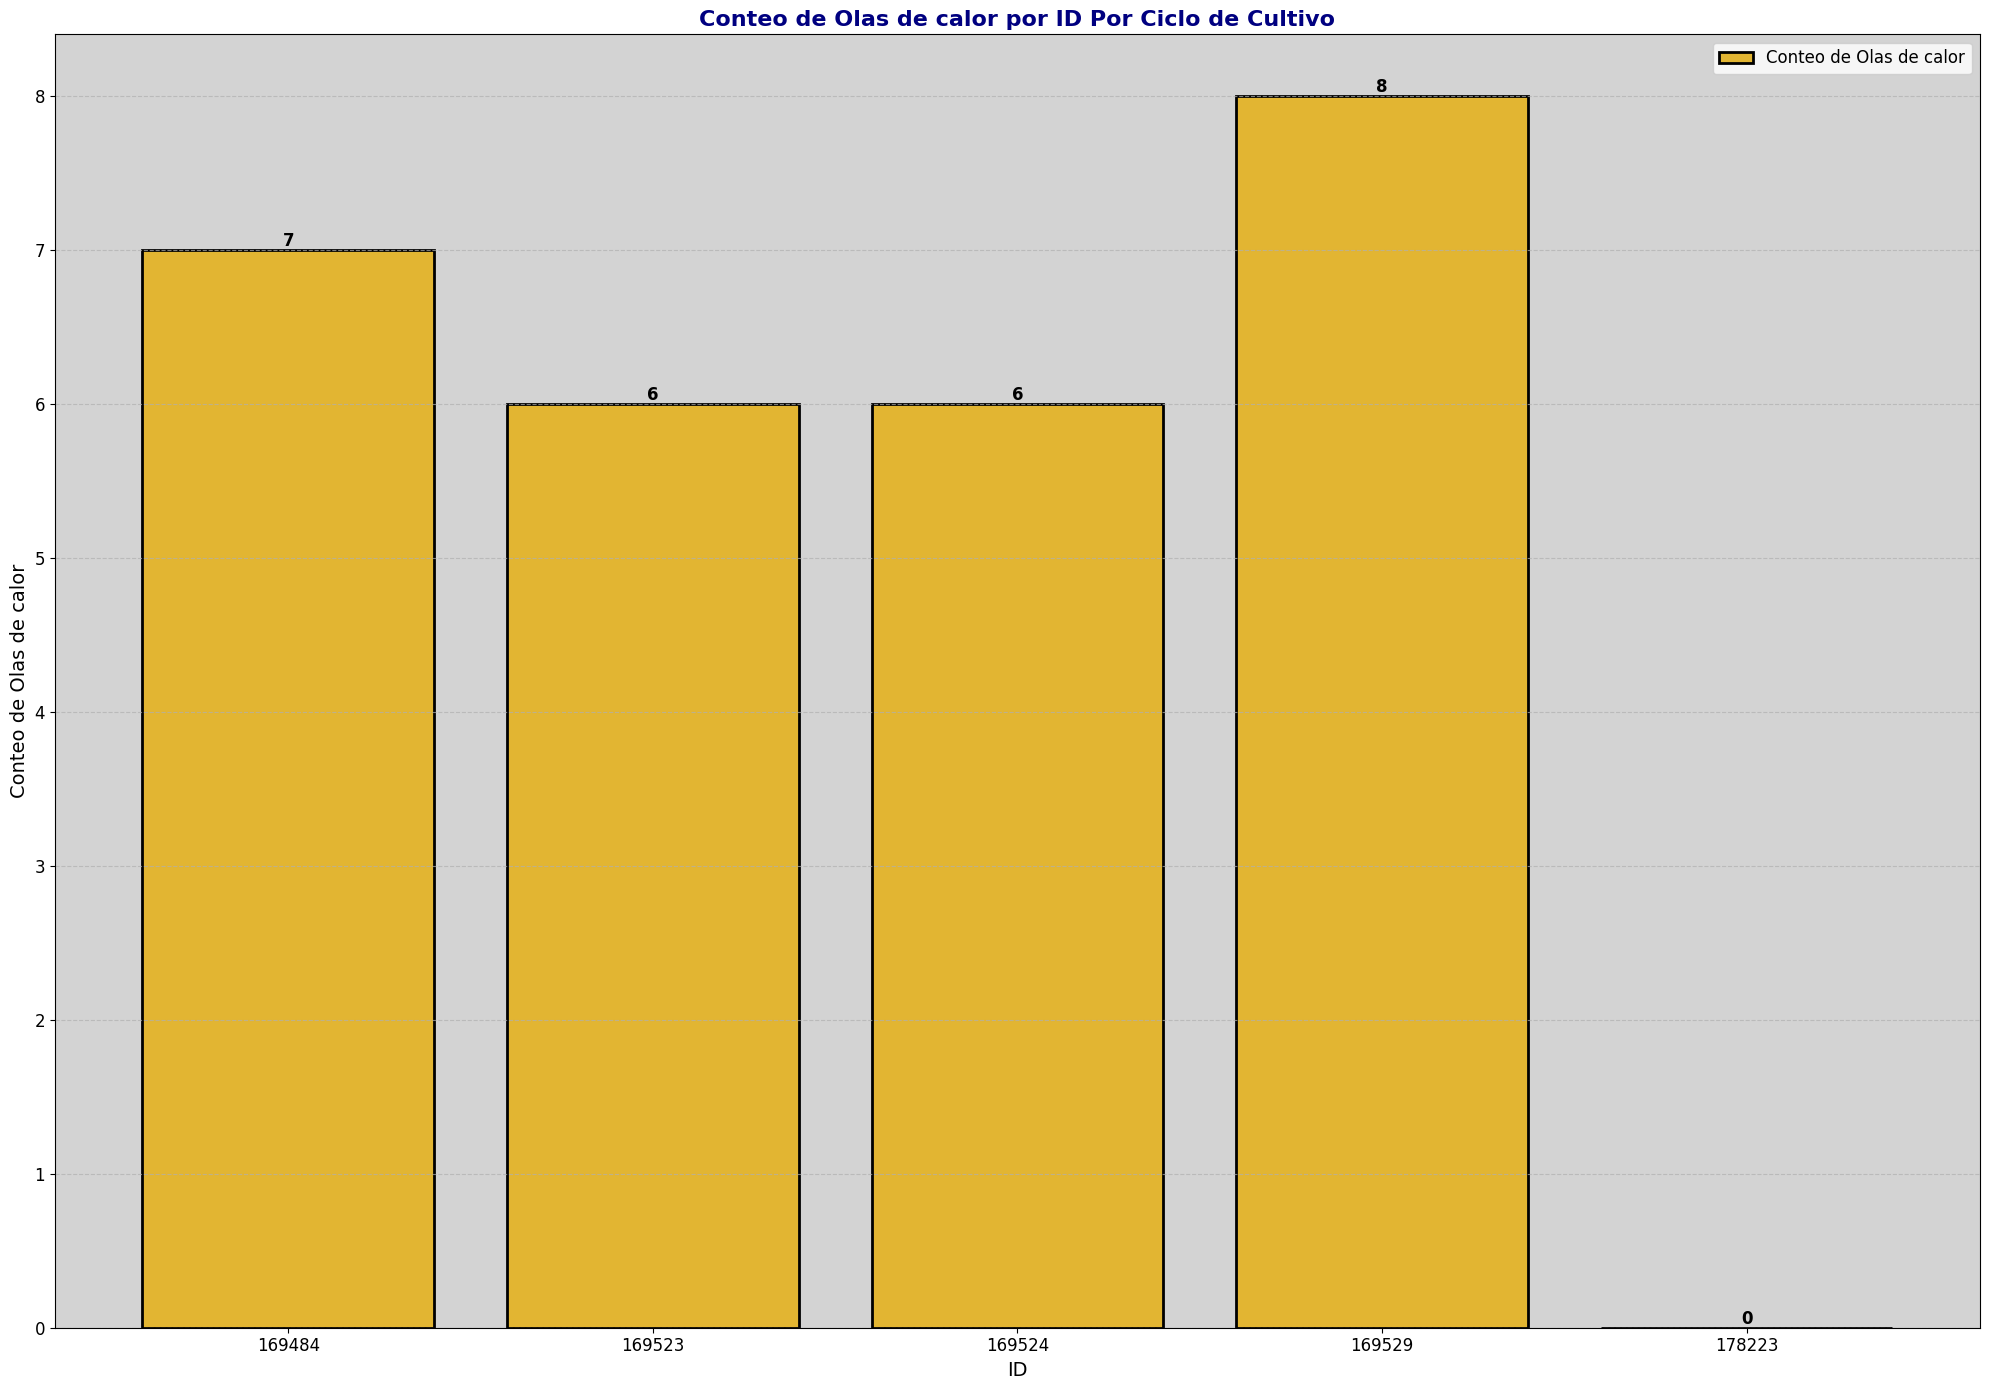

In [5]:
# Asegurar que 'Date' es de tipo datetime
df_ola_calor['Date'] = pd.to_datetime(df_ola_calor['Date'])

# Crear el DataFrame df_ola_calor_cultivo
df_ola_calor_cultivo = df_ola_calor.copy()

def filtrar_por_fecha():
    global df_ola_calor_cultivo

    # Pedir al usuario que ingrese una fecha de inicio
    fecha_str = input("Ingrese una fecha de inicio (formato YYYY-MM-DD): ")
    try:
        fecha_inicio = datetime.strptime(fecha_str, '%Y-%m-%d')
    except ValueError:
        print("Fecha no válida.")
        return

    # Mostrar opciones al usuario
    print("Seleccione el número de días:")
    print("1. 150 días")
    print("2. 120 días")
    opcion = input("Ingrese el número de la opción (1 o 2): ")

    if opcion == '1':
        num_dias = 150
    elif opcion == '2':
        num_dias = 120
    else:
        print("Opción no válida.")
        return

    # Calcular la fecha de fin
    fecha_fin = fecha_inicio + timedelta(days=num_dias - 1)

    # Filtrar el DataFrame según las fechas seleccionadas
    df_filtrado_mes = df_ola_calor_cultivo[(df_ola_calor_cultivo['Date'] >= fecha_inicio) &
                                   (df_ola_calor_cultivo['Date'] <= fecha_fin)]

    if df_filtrado_mes.empty:
        print("No hay datos disponibles para la fecha seleccionada.")
        return

    # Ordenar el DataFrame por 'ID' y 'Date'
    df_filtrado_mes = df_filtrado_mes.sort_values(by=['ID', 'Date'])

    # Inicializar listas para guardar los resultados
    ids = []
    inicio_rango = []
    fin_rango = []
    duracion = []
    periodos = []

    # Inicializar variables
    dias_sin_lluvia = 0
    inicio_sin_lluvia = None
    prev_id = None

    # Iterar sobre las filas del DataFrame
    for index, row in df_filtrado_mes.iterrows():
        current_id = row['ID']
        df_ola_calor = row['hot_days']
        
        if current_id != prev_id:
            # Guardar el rango de días sin lluvia para el ID anterior
            if prev_id is not None:
                ids.append(prev_id)
                inicio_rango.append(inicio_sin_lluvia)
                fin_rango.append(prev_fecha)
                duracion.append(dias_sin_lluvia)
                periodos.append(1 if dias_sin_lluvia >= 3 else 0)
            
            # Reiniciar variables al cambiar de ID
            dias_sin_lluvia = 0
            inicio_sin_lluvia = None
        
        if df_ola_calor == 1:
            if inicio_sin_lluvia is None:
                inicio_sin_lluvia = row['Date']
            dias_sin_lluvia += 1
            prev_fecha = row['Date']
        else:
            if inicio_sin_lluvia is not None:
                # Guardar el rango de días sin lluvia cuando se encuentra un día con lluvia
                ids.append(prev_id)
                inicio_rango.append(inicio_sin_lluvia)
                fin_rango.append(prev_fecha)
                duracion.append(dias_sin_lluvia)
                periodos.append(1 if dias_sin_lluvia >= 3 else 0)
                # Reiniciar variables para el nuevo período de días sin lluvia
                dias_sin_lluvia = 0
                inicio_sin_lluvia = None
        
        prev_id = current_id

    # Agregar el rango de días sin lluvia para el último ID
    if prev_id is not None and inicio_sin_lluvia is not None:
        ids.append(prev_id)
        inicio_rango.append(inicio_sin_lluvia)
        fin_rango.append(prev_fecha)
        duracion.append(dias_sin_lluvia)
        periodos.append(1 if dias_sin_lluvia >= 3 else 0)

    # Convertir las listas a un DataFrame
    resultado_ola_calor_cultivo = pd.DataFrame({
        'ID': ids,
        'Inicio del rango': inicio_rango,
        'Fin del rango': fin_rango,
        'Duración': duracion,
        'Periodo': periodos
    })

    # Convertir el ID a int64
    resultado_ola_calor_cultivo['ID'] = resultado_ola_calor_cultivo['ID'].astype('int64')

    # Mostrar el DataFrame resultado
    print(resultado_ola_calor_cultivo)
    #resultado_ola_calor_cultivo.to_csv('C:/Users/stzor/Desktop/Junio/ICDF/para_graficaduracionpromedioresultado_ola_calor_cultivo.csv', index=False, sep=';')
    # Crear el DataFrame Cantidad_ola_calor_cultivo
    cantidad_ola_calor_cultivo = resultado_ola_calor_cultivo.groupby('ID')['Periodo'].sum().reset_index()
    cantidad_ola_calor_cultivo.rename(columns={'Periodo': 'No. de Olas de Calor'}, inplace=True)

    # Mostrar el DataFrame Cantidad_periodos_secos
    print(cantidad_ola_calor_cultivo)

    # Mostrar información adicional de cada ID
    ids_todos = df_filtrado_mes['ID'].unique()

    for id in ids_todos:
        datos_id = df_filtrado_mes[df_filtrado_mes['ID'] == id]
        if datos_id.empty:
            print(f"No tiene datos en esa fecha para el ID {id}. Seleccione otra fecha.")
        else:
            fecha_inicio_estacion = datos_id['Date'].min().strftime('%Y-%m-%d')
            fecha_fin_estacion = datos_id['Date'].max().strftime('%Y-%m-%d')
            total_registros = datos_id.shape[0]
            print(f"Para el ID {id}: Fecha de inicio: {fecha_inicio_estacion}, Fecha de fin: {fecha_fin_estacion}, Total registros encontrados: {total_registros}")

    return resultado_ola_calor_cultivo, cantidad_ola_calor_cultivo

# Ejecutar la función para filtrar por fecha y obtener los DataFrames resultado
resultado_ola_calor_cultivo, cantidad_ola_calor_cultivo = filtrar_por_fecha()

resultado_ola_calor_cultivo.to_csv('C:/Users/stzor/Desktop/Junio/ICDF/resultado_ola_calor_cultivo_7jul2024.csv', index=False, sep=';')

# Ordenar el DataFrame por la columna 'No. de Olas de Calor' de mayor a menor
cantidad_ola_calor_cultivo = cantidad_ola_calor_cultivo.sort_values(by='No. de Olas de Calor', ascending=False)

# Crear gráfica de barras con el color E2B532 y bordes negros
plt.figure(figsize=(20, 14))
bars = plt.bar(cantidad_ola_calor_cultivo.index, cantidad_ola_calor_cultivo['No. de Olas de Calor'], 
               color='#E2B532', edgecolor='black', linewidth=2)

# Añadir título y etiquetas a los ejes
plt.title('Conteo de Olas de calor por ID Por Ciclo de Cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Conteo de Olas de calor', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(cantidad_ola_calor_cultivo.index, cantidad_ola_calor_cultivo['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Conteo de Olas de calor'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/resultado_df_ola_calor_cultivo_27jun2024.png', format='png', dpi=300)

# Mostrar gráfica
plt.show()

Olas de Calor Por mes Por estación

In [4]:
df_ola_calor_mes = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/df_temps2_5jul2024.csv', header=0, delimiter=';', encoding='latin-1')

In [5]:
df_ola_calor_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      900 non-null    object 
 1   ID        900 non-null    int64  
 2   Tempalta  875 non-null    float64
 3   hot_days  900 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.3+ KB


In [6]:
# Convertir la columna 'Date' a tipo datetime
df_ola_calor_mes['Date'] = pd.to_datetime(df_ola_calor_mes['Date'])

# Extraer el año y el mes de la columna 'Date'
df_ola_calor_mes['Year'] = df_ola_calor_mes['Date'].dt.year
df_ola_calor_mes['Mes'] = df_ola_calor_mes['Date'].dt.month

print(df_ola_calor_mes)

          Date      ID   Tempalta  hot_days  Year  Mes
0   2023-11-14  169484  23.108333         1  2023   11
1   2023-11-14  169523  24.225000         1  2023   11
2   2023-11-14  169524        NaN         0  2023   11
3   2023-11-14  169529        NaN         0  2023   11
4   2023-11-15  169484  22.008333         1  2023   11
..         ...     ...        ...       ...   ...  ...
895 2024-05-25  169529  26.300000         1  2024    5
896 2024-05-25  178223  19.733333         0  2024    5
897 2024-05-26  178223  20.873333         1  2024    5
898 2024-05-27  178223  16.600000         0  2024    5
899 2024-05-28  178223  21.200000         1  2024    5

[900 rows x 6 columns]


Meses disponibles:
11
12
1
2
3
4
5
       ID  Year  Mes  Cantidad de Olas de Calor
0  169484  2024    3                          1
1  169523  2024    3                          1
2  169524  2024    3                          1
3  169529  2024    3                          1


C:\Users\stzor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\stzor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


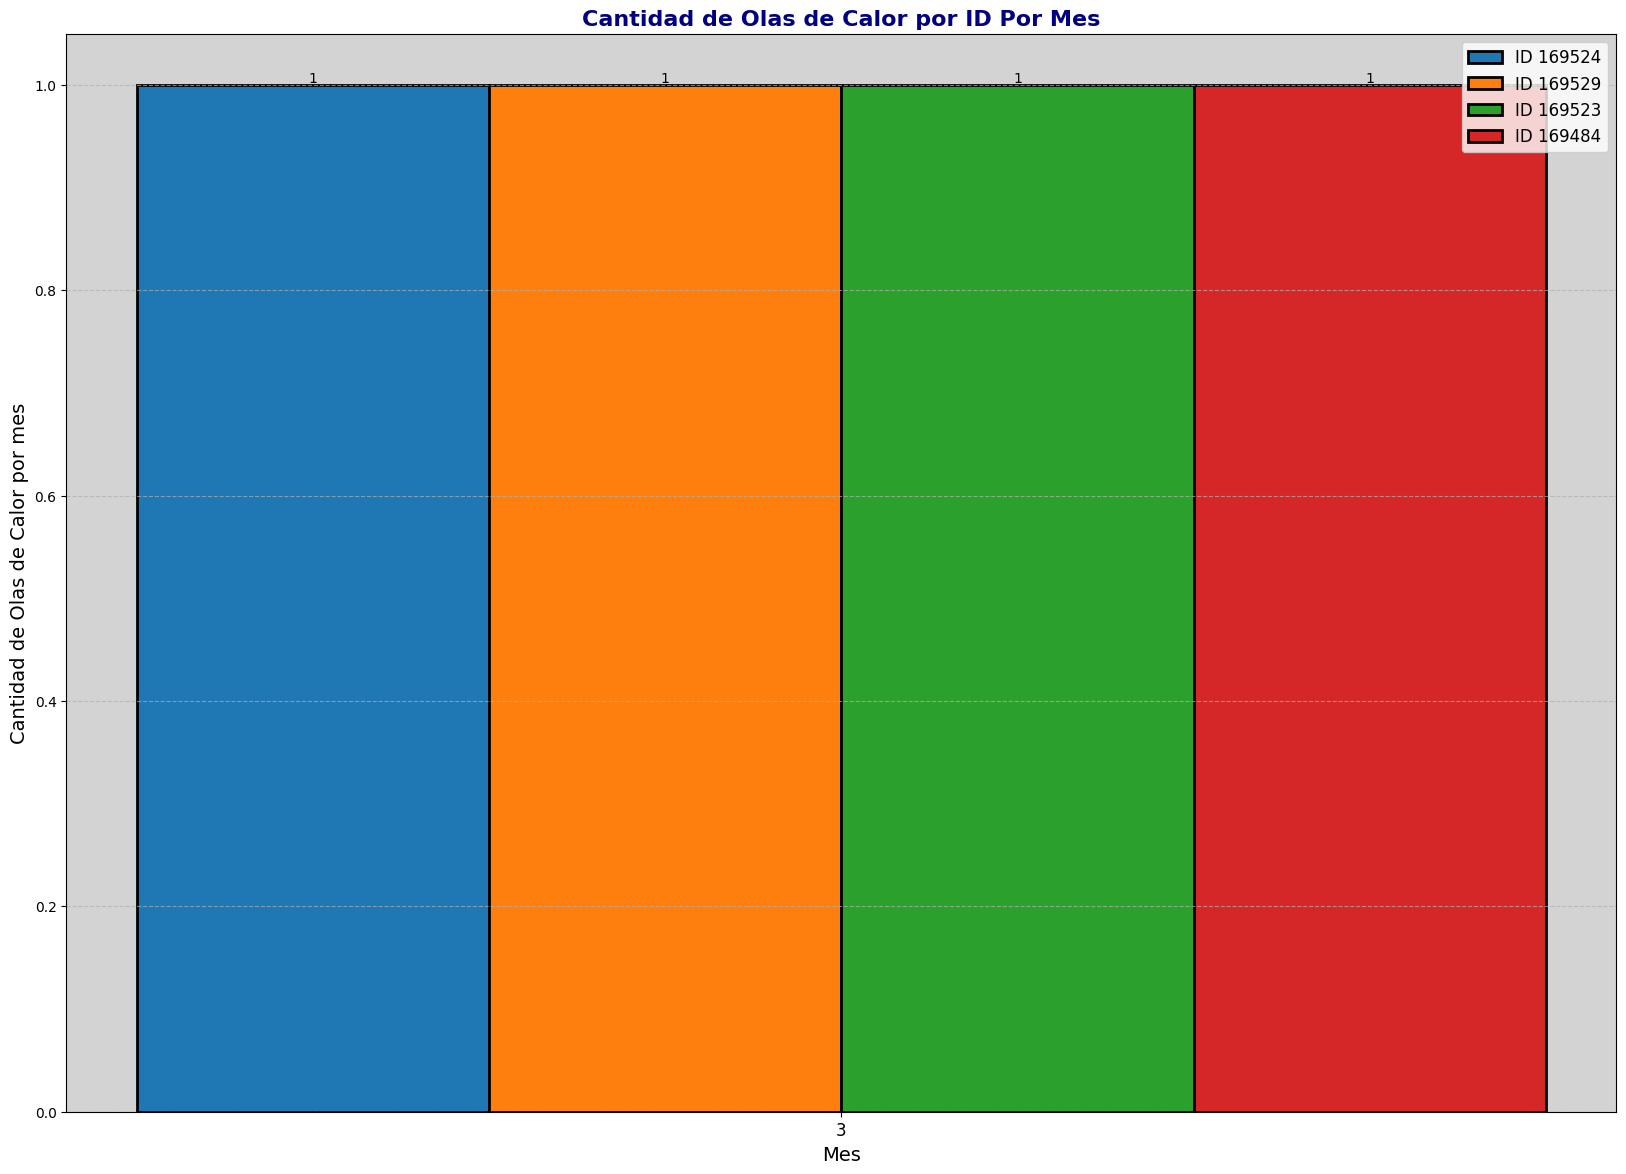

In [7]:
# Verificar que el DataFrame contiene las columnas necesarias
required_columns = ['ID', 'Year', 'Mes', 'Date', 'hot_days']
for col in required_columns:
    if col not in df_ola_calor_mes.columns:
        raise ValueError(f"Falta la columna necesaria: {col}")

'''ver si es necesario que pida el año'''
# Consultar al usuario el año y el mes
año = int(input("Ingrese el año: "))

# Mostrar lista de meses disponibles
meses_disponibles = df_ola_calor_mes['Mes'].unique()
print("Meses disponibles:")
for mes in meses_disponibles:
    print(mes)

mes = int(input("Ingrese el mes (1-12): "))

# Filtrar el DataFrame df_ola_calor_mes según el año y el mes seleccionados
df_orden_mes = df_ola_calor_mes[(df_ola_calor_mes['Year'] == año) & (df_ola_calor_mes['Mes'] == mes)]
df_orden_mes = df_orden_mes.sort_values(by=['ID', 'Year', 'Mes', 'Date'])

# Inicializar un DataFrame para guardar los resultados
resultado_df_ola_calor_mes = pd.DataFrame(columns=['ID', 'Year', 'Mes', 'Inicio ola calor', 'Fin ola calor', 'Duración ola calor', 'Dias sin lluvia', 'ola_calor_mes'])

# Inicializar variables
prev_id = None
prev_year = None
prev_mes = None
dias_sin_lluvia = 0
inicio_periodo = None

# Lista temporal para almacenar resultados
resultados_temp = []

# Iterar sobre las filas del DataFrame
for index, row in df_orden_mes.iterrows():
    current_id = row['ID']
    current_year = row['Year']
    current_mes = row['Mes']
    current_date = row['Date']
    
    if (current_id != prev_id or current_year != prev_year or current_mes != prev_mes) and prev_id is not None:
        # Guardar el conteo de periodos secos para el ID, año y mes anterior
        if dias_sin_lluvia >= 3:
            resultados_temp.append({
                'ID': prev_id, 
                'Year': prev_year, 
                'Mes': prev_mes, 
                'Inicio ola calor': inicio_periodo,
                'Fin ola calor': prev_date,
                'Duración ola calor': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'ola_calor_mes': 1
            })
        # Reiniciar el contador de periodos secos y días sin lluvia
        dias_sin_lluvia = 0
        inicio_periodo = None
    
    if row['hot_days'] == 1:
        if dias_sin_lluvia == 0:
            inicio_periodo = current_date
        dias_sin_lluvia += 1
    else:
        if dias_sin_lluvia >= 3:
            resultados_temp.append({
                'ID': current_id, 
                'Year': current_year, 
                'Mes': current_mes, 
                'Inicio ola calor': inicio_periodo,
                'Fin ola calor': current_date - pd.Timedelta(days=1),
                'Duración ola calor': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'ola_calor_mes': 1
            })
        dias_sin_lluvia = 0
        inicio_periodo = None
    
    prev_id = current_id
    prev_year = current_year
    prev_mes = current_mes
    prev_date = current_date

# Agregar el conteo para el último ID, año y mes
if prev_id is not None and dias_sin_lluvia >= 3:
    resultados_temp.append({
        'ID': prev_id, 
        'Year': prev_year, 
        'Mes': prev_mes, 
        'Inicio ola calor': inicio_periodo,
        'Fin ola calor': prev_date,
        'Duración ola calor': dias_sin_lluvia,
        'Dias sin lluvia': dias_sin_lluvia,
        'ola_calor_mes': 1
    })

# Crear el DataFrame final con los resultados
resultado_ola_calor_mes = pd.DataFrame(resultados_temp)

# Convertir el ID a int64
resultado_ola_calor_mes['ID'] = resultado_ola_calor_mes['ID'].astype('int64')

# Añadir la columna 'ola_calor_mes' para todos los registros donde 'Dias sin lluvia' es menor a 5
for index, row in df_orden_mes.iterrows():
    if row['hot_days'] == 1:
        dias_sin_lluvia += 1
    else:
        if dias_sin_lluvia < 3:
            resultados_temp.append({
                'ID': row['ID'], 
                'Year': row['Year'], 
                'Mes': row['Mes'], 
                'Inicio ola calor': inicio_periodo,
                'Fin ola calor': row['Date'] - pd.Timedelta(days=1),
                'Duración ola calor': dias_sin_lluvia,
                'Dias sin lluvia': dias_sin_lluvia,
                'ola_calor_mes': 0
            })

# Agrupar por ID, Year y Mes y sumar la columna ola_calor_mes
cantidad_ola_calor_mes = resultado_ola_calor_mes.groupby(['ID', 'Year', 'Mes']).agg({'ola_calor_mes': 'sum'}).reset_index()


resultado_ola_calor_mes.to_csv('C:/Users/stzor/Desktop/Junio/ICDF/resultado_ola_calor_mes_7jul2024.csv', index=False, sep=';')

# Renombrar la columna ola_calor_mes a Cantidad de Olas de Calor
cantidad_ola_calor_mes = cantidad_ola_calor_mes.rename(columns={'ola_calor_mes': 'Cantidad de Olas de Calor'})

# Convertir el ID a int64
cantidad_ola_calor_mes['ID'] = cantidad_ola_calor_mes['ID'].astype('int64')

# Mostrar el DataFrame resultado
print(cantidad_ola_calor_mes)

# Crear gráfica de barras con cantidad de Olas de Calor por ID y mes
# Obtener una lista única de meses y IDs
meses = cantidad_ola_calor_mes['Mes'].unique()
IDs = cantidad_ola_calor_mes['ID'].unique()
num_meses = len(meses)
num_IDs = len(IDs)

# Ancho de las barras
bar_width = 0.8 / num_IDs

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))

for i, mes in enumerate(meses):
    # Obtener los datos para el mes actual
    data_mes = cantidad_ola_calor_mes[cantidad_ola_calor_mes['Mes'] == mes]
    
    for j, ID in enumerate(IDs):
        # Obtener los datos para el ID actual
        data_ID = data_mes[data_mes['ID'] == ID]
        
        # Calcular la posición de la barra en el eje x
        x_position = i + j * bar_width
        
        # Crear la barra para el ID actual
        plt.bar(x_position, data_ID['Cantidad de Olas de Calor'], 
                width=bar_width, color=plt.cm.tab10(j), edgecolor='black', linewidth=2,
                label=f'ID {ID}')
        
        # Añadir etiquetas de valor en cada barra
        plt.text(x_position, data_ID['Cantidad de Olas de Calor'], f'{data_ID["Cantidad de Olas de Calor"].values[0]}',
                 ha='center', va='bottom', fontsize=10, color='black')

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de Olas de Calor por ID Por Mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Olas de Calor por mes', fontsize=14)

# Ajustar las etiquetas del eje x
plt.xticks(np.arange(num_meses) + (0.8 / num_IDs) * (num_IDs - 1) / 2, meses, fontsize=12)

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
plt.legend(handles[:num_IDs], unique_labels[:num_IDs], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Conteo_de_periodos_Secos_por_ID_mes_11jun2024_v4.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()

**Duración máxima de las olas de calor**

Maximum duration of heat waves during the maize production campaign (Mayo - Septiembre).

In [9]:
resultado_ola_calor_cultivo = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/resultado_ola_calor_cultivo_7jul2024.csv', header = 0,delimiter=';')

In [10]:
resultado_ola_calor_cultivo.head()

,ID,Inicio del rango,Fin del rango,Duración,Periodo
0,169484,2023-12-01,2023-12-11,11,1
1,169484,2023-12-14,2023-12-17,4,1
2,169484,2023-12-23,2023-12-30,8,1
3,169484,2024-01-01,2024-01-28,28,1
4,169484,2024-02-02,2024-02-05,4,1


Duración Máxima de Olas de Calor por estación:
ID
169484    14.428571
169523    18.000000
169524    15.285714
169529    12.250000
178223     1.200000
Name: Duración, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5 non-null      int64  
 1   Promedio  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes
None


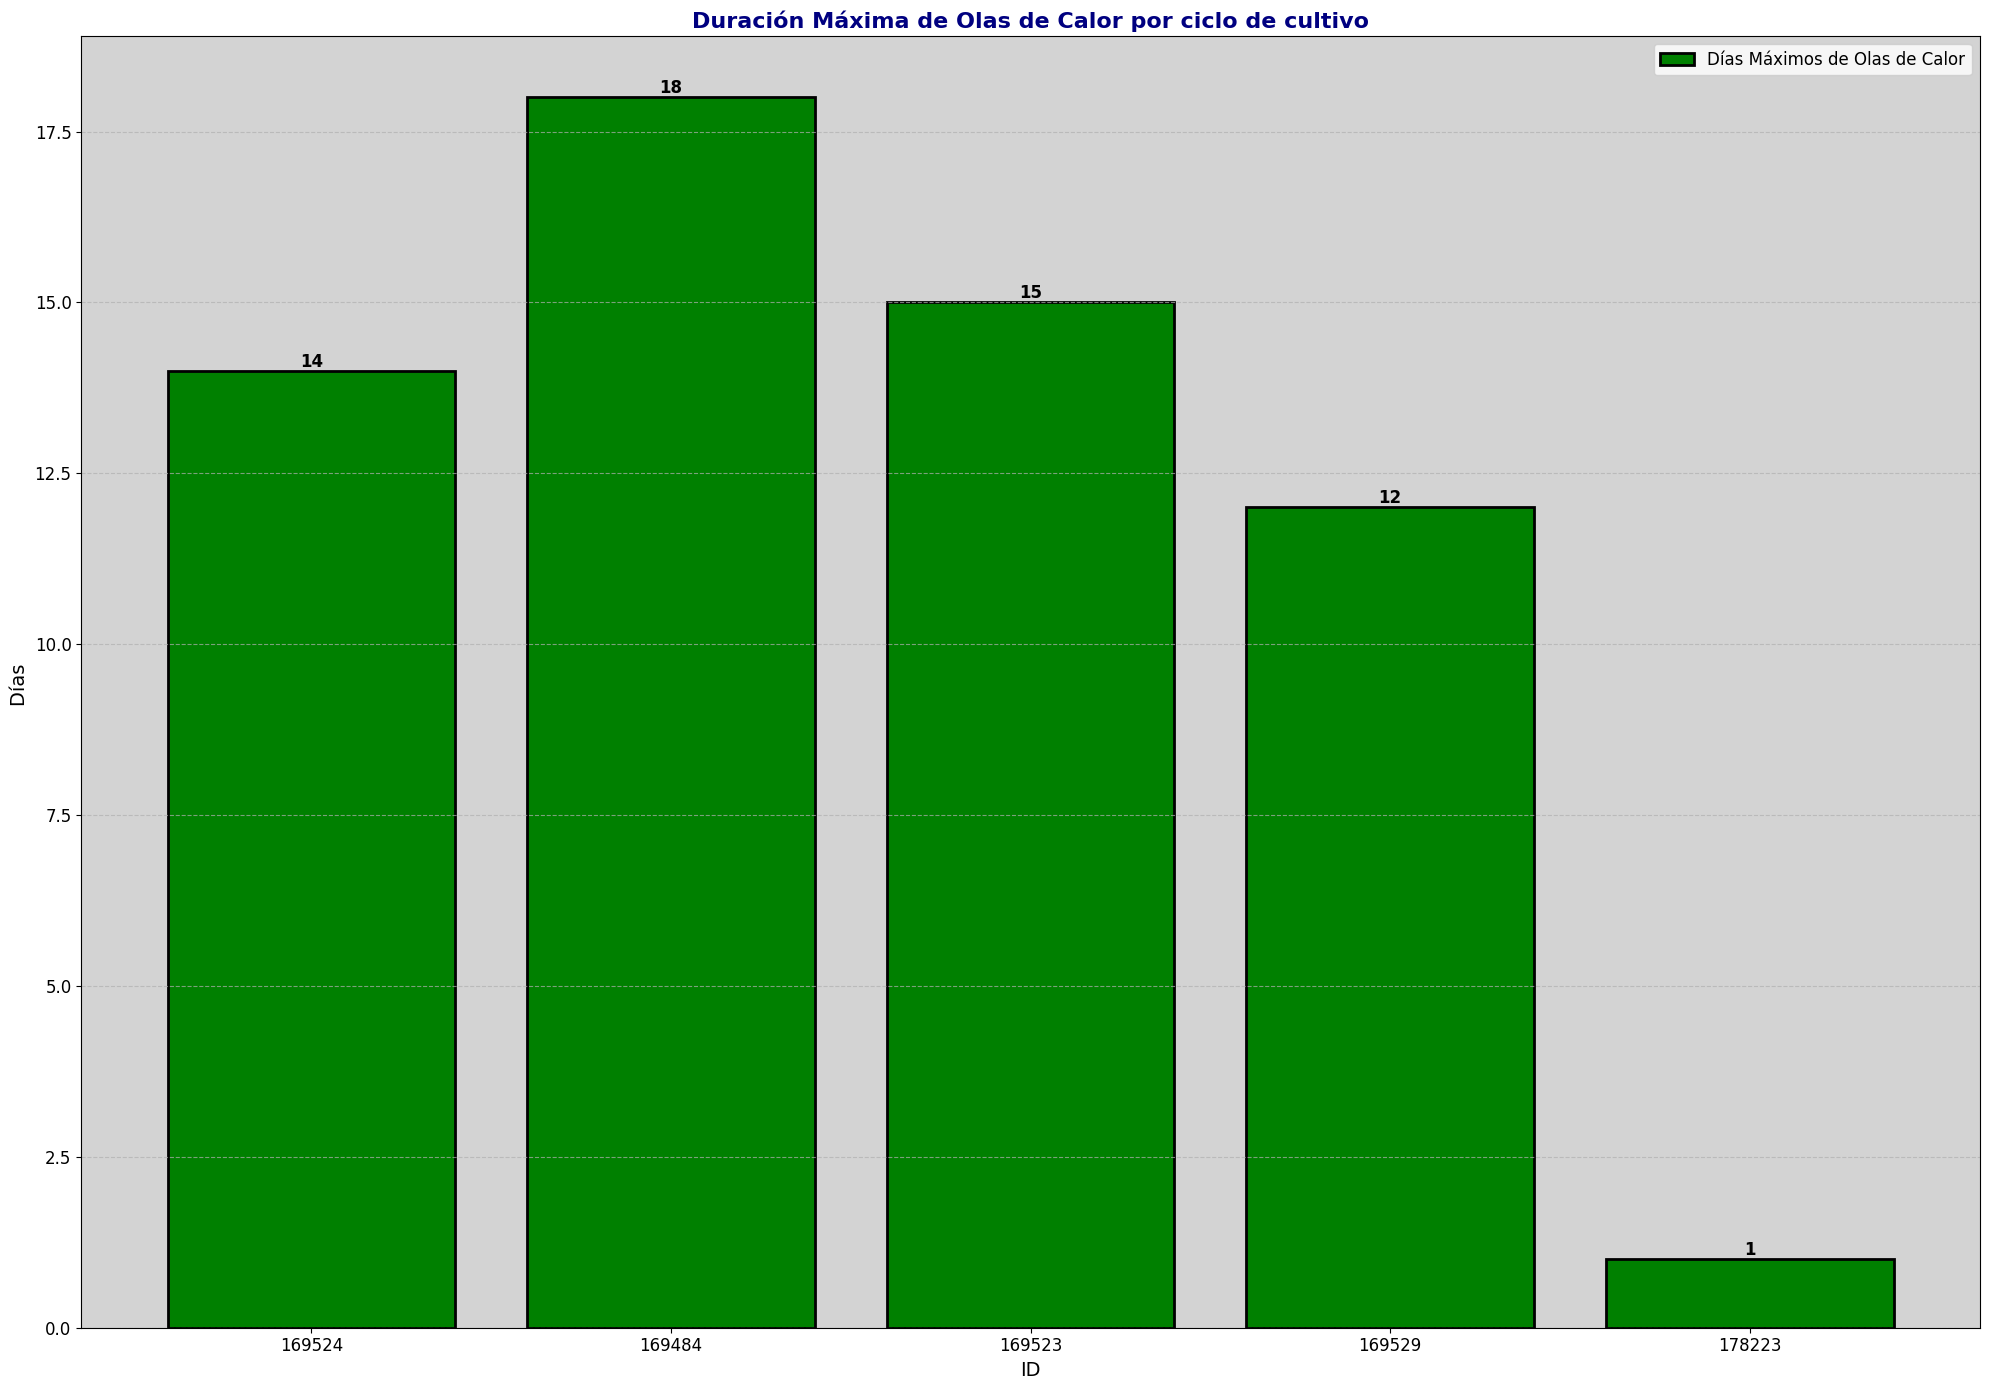

In [11]:
#obtenido de la comprobación de rangos de hot_days de Olas de Calor
'''esta atado al resultado de las olas de calor celda 72
ESTE SCRIPT ES POR CICLO DE CULTIVO
este saca promedio'''
'''la idea de mejora es llamar a traer el csv o la tabla de la DB'''
# Calcular el promedio de duración por estación


promedio_por_estacion = resultado_ola_calor_cultivo.groupby('ID')['Duración'].mean()

# Mostrar el resultado
print("Duración Máxima de Olas de Calor por estación:")
print(promedio_por_estacion)

# Convertir el Series en DataFrame
df_promedio = promedio_por_estacion.reset_index()
df_promedio.columns = ['ID', 'Promedio']

# Mostrar el DataFrame resultante
print(df_promedio.info())

# Convertir la columna 'Promedio' a números enteros
df_promedio['Promedio'] = df_promedio['Promedio'].astype(int)

# Ordenar el DataFrame por la columna Count_dias_secos de mayor a menor
promedio_por_estacion = df_promedio.sort_values(by='Promedio', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_promedio.index, df_promedio['Promedio'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración Máxima de Olas de Calor por ciclo de cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días ', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(promedio_por_estacion.index, df_promedio['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días Máximos de Olas de Calor'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_promedio_períodos_secos_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()

Duración Máxima de Olas de Calor por estación:
ID
169484    37
169523    37
169524    37
169529    37
178223     2
Name: Duración, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               5 non-null      int64
 1   Duración Máxima  5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
None


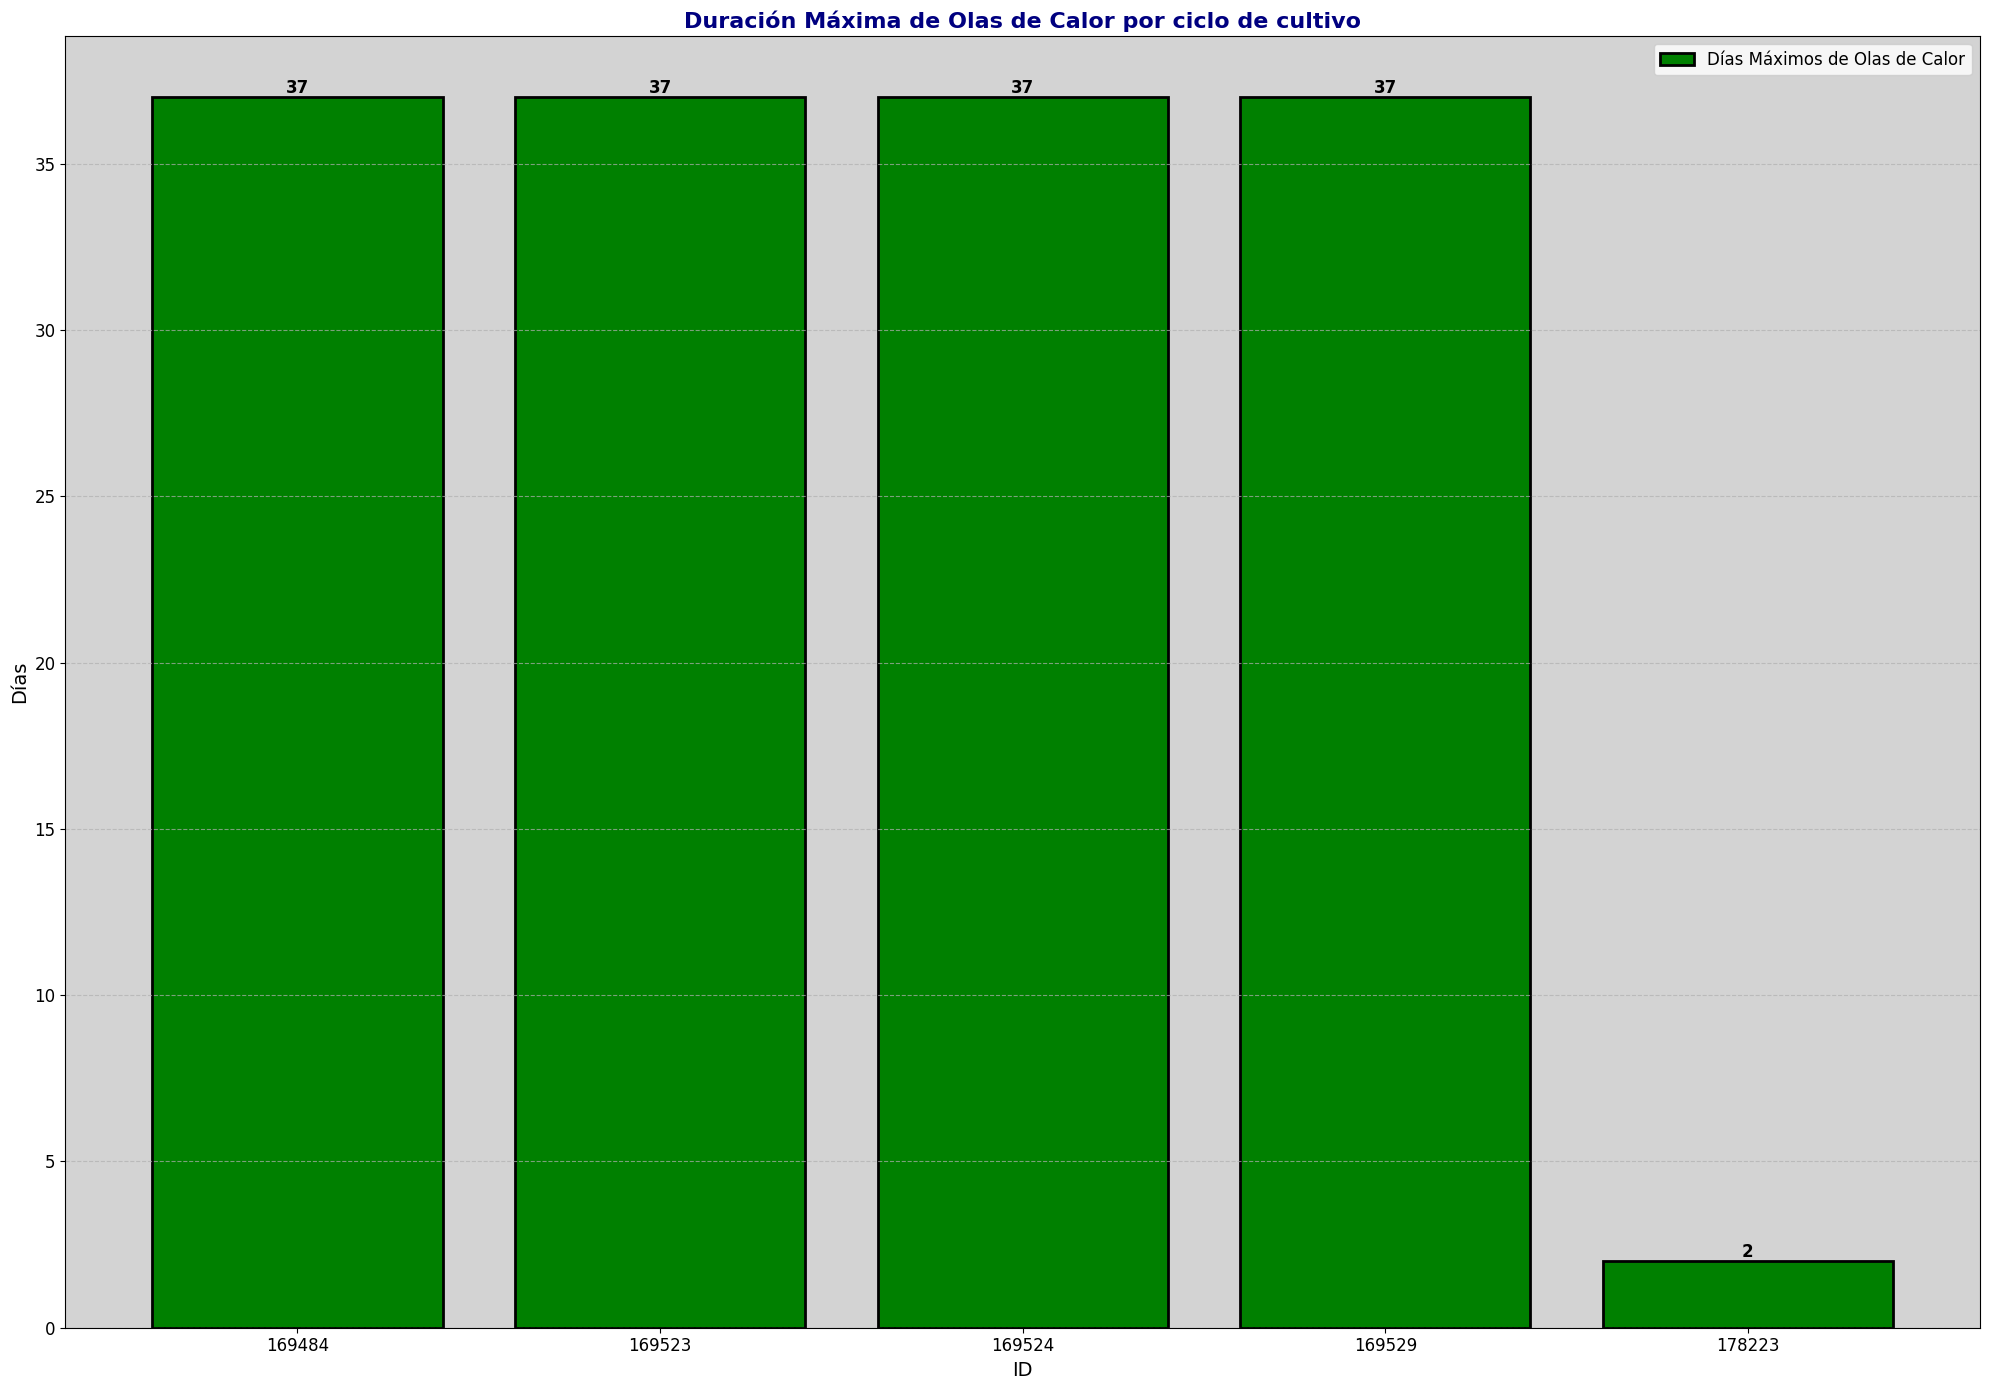

In [13]:
# Cargar los datos en un DataFrame
resultado_ola_calor_cultivo = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/resultado_ola_calor_cultivo_7jul2024.csv', delimiter=';')

# Calcular la duración máxima por estación
maxima_duracion_por_estacion = resultado_ola_calor_cultivo.groupby('ID')['Duración'].max()

# Mostrar el resultado
print("Duración Máxima de Olas de Calor por estación:")
print(maxima_duracion_por_estacion)

# Convertir el Series en DataFrame
df_maxima = maxima_duracion_por_estacion.reset_index()
df_maxima.columns = ['ID', 'Duración Máxima']

# Mostrar el DataFrame resultante
print(df_maxima.info())

# Convertir la columna 'Duración Máxima' a números enteros
df_maxima['Duración Máxima'] = df_maxima['Duración Máxima'].astype(int)

# Ordenar el DataFrame por la columna 'Duración Máxima' de mayor a menor
maxima_duracion_por_estacion = df_maxima.sort_values(by='Duración Máxima', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_maxima.index, df_maxima['Duración Máxima'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración Máxima de Olas de Calor por ciclo de cultivo', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(df_maxima.index, df_maxima['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días Máximos de Olas de Calor'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_maxima_olas_calor_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()


**Duración máxima de ola de calor por mes**

este saca promedio

In [11]:
resultado_ola_calor_mes = pd.read_csv('C:/Users/stzor/Desktop/Junio/ICDF/resultado_ola_calor_mes_7jul2024.csv', header=0, delimiter=';')

In [12]:
resultado_ola_calor_mes.head()

,ID,Year,Mes,Inicio ola calor,Fin ola calor,Duración ola calor,Dias sin lluvia,ola_calor_mes
0,169484,2024,3,2024-03-01,2024-03-31,31,31,1
1,169523,2024,3,2024-03-01,2024-03-31,31,31,1
2,169524,2024,3,2024-03-01,2024-03-31,31,31,1
3,169529,2024,3,2024-03-01,2024-03-31,31,31,1


Promedio de duración por estación:
ID
169484    31.0
169523    31.0
169524    31.0
169529    31.0
Name: Duración ola calor, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        4 non-null      int64  
 1   Promedio  4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 196.0 bytes
None


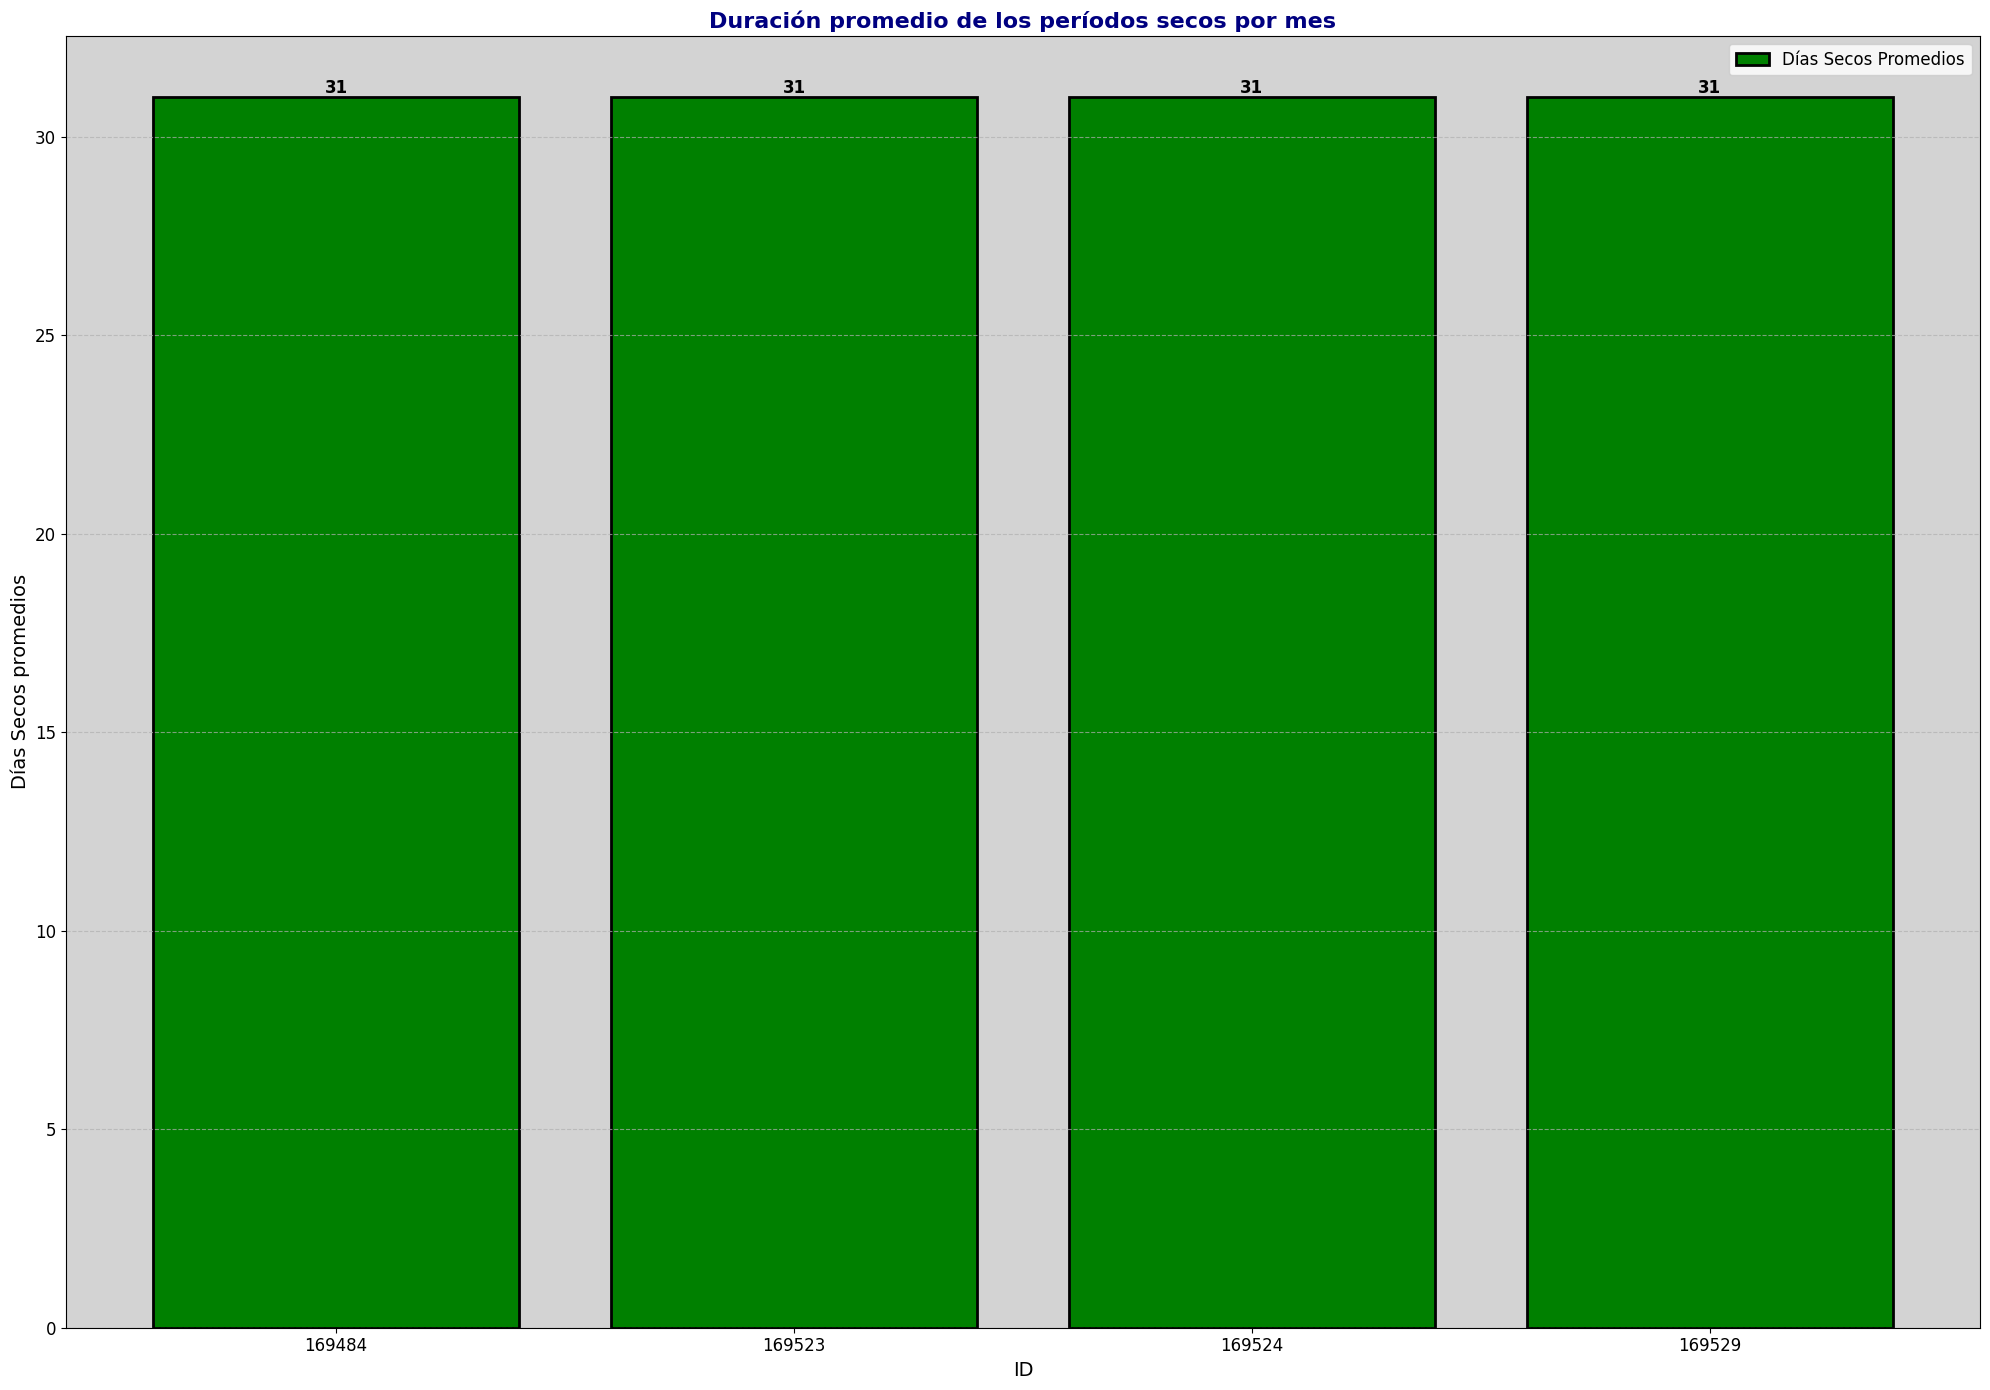

In [13]:
'''esta atado al resultado Sin año seleccionado
ESTE SCRIPT ES POR mes'''
'''la idea de mejora es llamar a traer el csv o la tabla de la DB'''
# Calcular el promedio de duración por estación
promedio_por_estacion = resultado_ola_calor_mes.groupby('ID')['Duración ola calor'].mean()

# Mostrar el resultado
print("Promedio de duración por estación:")
print(promedio_por_estacion)

# Convertir el Series en DataFrame
df_promedio = promedio_por_estacion.reset_index()
df_promedio.columns = ['ID', 'Promedio']

# Mostrar el DataFrame resultante
print(df_promedio.info())

# Convertir la columna 'Promedio' a números enteros
df_promedio['Promedio'] = df_promedio['Promedio'].astype(int)

# Ordenar el DataFrame por la columna Count_dias_secos de mayor a menor
promedio_por_estacion = df_promedio.sort_values(by='Promedio', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_promedio.index, df_promedio['Promedio'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración promedio de los períodos secos por mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días Secos promedios', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(promedio_por_estacion.index, df_promedio['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días Secos Promedios'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
#plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_promedio_períodos_secos_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que 'resultado_ola_calor_mes' es un DataFrame que ya ha sido cargado previamente

# Calcular el máximo de duración por estación
maximo_por_estacion = resultado_ola_calor_mes.groupby('ID')['Duración ola calor'].max()

# Mostrar el resultado
print("Máximo de duración por estación:")
print(maximo_por_estacion)

# Convertir el Series en DataFrame
df_maximo = maximo_por_estacion.reset_index()
df_maximo.columns = ['ID', 'Máximo']

# Mostrar el DataFrame resultante
print(df_maximo.info())

# Convertir la columna 'Máximo' a números enteros
df_maximo['Máximo'] = df_maximo['Máximo'].astype(int)

# Ordenar el DataFrame por la columna Máximo de mayor a menor
maximo_por_estacion = df_maximo.sort_values(by='Máximo', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_maximo.index, df_maximo['Máximo'], color='green', edgecolor='black', linewidth=2)  # Añadir bordes a las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración máxima de los períodos secos por mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días Secos Máximos', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(maximo_por_estacion.index, df_maximo['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días Secos Máximos'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
# plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_maxima_períodos_secos_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()


Máximo de duración por estación:
ID
169484    31
169523    31
169524    31
169529    31
Name: Duración ola calor, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      4 non-null      int64
 1   Máximo  4 non-null      int64
dtypes: int64(2)
memory usage: 196.0 bytes
None


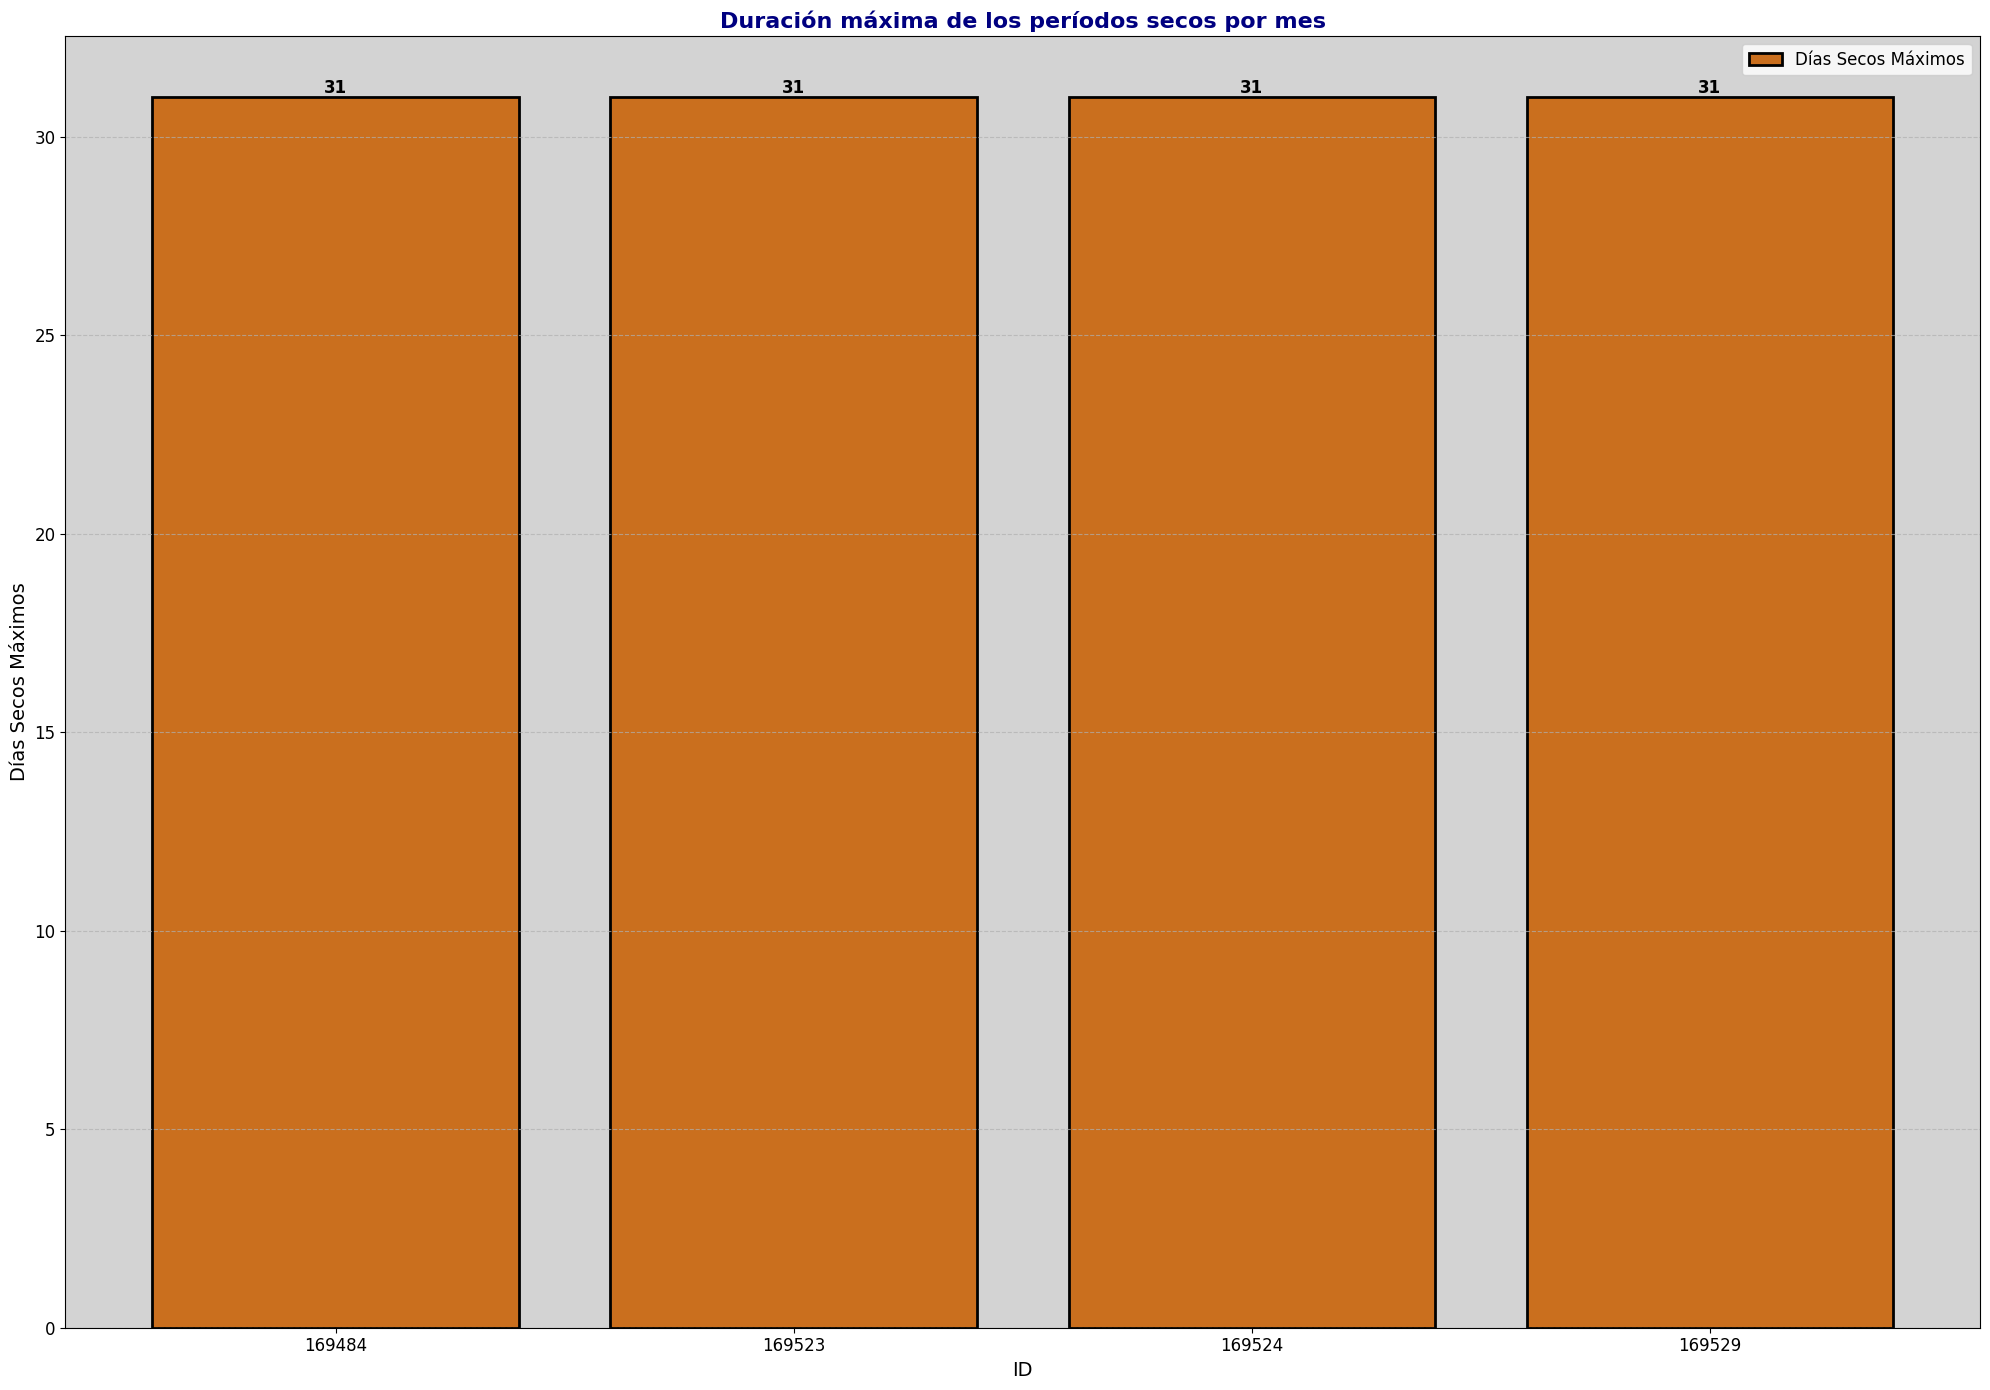

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que 'resultado_ola_calor_mes' es un DataFrame que ya ha sido cargado previamente

# Calcular el máximo de duración por estación
maximo_por_estacion = resultado_ola_calor_mes.groupby('ID')['Duración ola calor'].max()

# Mostrar el resultado
print("Máximo de duración por estación:")
print(maximo_por_estacion)

# Convertir el Series en DataFrame
df_maximo = maximo_por_estacion.reset_index()
df_maximo.columns = ['ID', 'Máximo']

# Mostrar el DataFrame resultante
print(df_maximo.info())

# Convertir la columna 'Máximo' a números enteros
df_maximo['Máximo'] = df_maximo['Máximo'].astype(int)

# Ordenar el DataFrame por la columna Máximo de mayor a menor
maximo_por_estacion = df_maximo.sort_values(by='Máximo', ascending=False)

# Crear gráfica de barras con un estilo más atractivo
plt.figure(figsize=(20, 14))
bars = plt.bar(df_maximo.index, df_maximo['Máximo'], color='#CA6F1E', edgecolor='black', linewidth=2)  # Cambiar el color de las barras

# Añadir título y etiquetas a los ejes
plt.title('Duración máxima de los períodos secos por mes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('ID', fontsize=14)
plt.ylabel('Días Secos Máximos', fontsize=14)

# Añadir etiquetas de valor en cada columna sin decimales y con un estilo mejorado
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',  
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  # Ajustar el estilo del texto

# Ajustar las etiquetas del eje x y mejorar el espaciado entre las barras
plt.xticks(maximo_por_estacion.index, df_maximo['ID'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mejorar el espaciado entre las etiquetas

# Personalizar el fondo y la cuadrícula de la gráfica
plt.gca().set_facecolor('lightgrey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda y personalizarla
plt.legend(['Días Secos Máximos'], loc='upper right', fontsize=12)

# Guardar la gráfica como PNG
# plt.savefig('C:/Users/stzor/Desktop/Junio/ICDF/Duración_maxima_períodos_secos_2jul2024.png', format='png', dpi=300)
# Mostrar gráfica
plt.show()
